<a href="https://colab.research.google.com/github/liassantos/Projetos-Data-Science/blob/main/API_California_Schools/An%C3%A1lise_de_dados.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Caso 1 - Analisando os dados
<h4>Alunos</h4>


1.   José Freitas Alves Neto
2.   Lia Santos Ponce de Leon
3.   Lucas do Vale Pimentel







# **1.** Importando Bibliotecas / Dados

## 1.1 Baixando Bibliotecas

In [ ]:
# Definindo padrão de exibição
options(repr.plot.width=10, repr.plot.height=6, repr.plot.res = 150)
warnings(warn = -1)

In [ ]:
# Instala os pacotes
install.packages(c("googledrive", "tidyr","ggpmisc"))
# Carrega os pacotes
library(googledrive)
library(ggplot2)
library(ggpmisc)
library(dplyr)
library(tidyr)

Installing packages into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependencies ‘gridExtra’, ‘xts’, ‘zoo’, ‘SparseM’, ‘MatrixModels’, ‘mvtnorm’, ‘TH.data’, ‘sandwich’, ‘Rcpp’, ‘ggpp’, ‘confintr’, ‘polynom’, ‘quantreg’, ‘lmodel2’, ‘splus2R’, ‘multcomp’, ‘multcompView’, ‘plyr’


Loading required package: ggpp

Registered S3 methods overwritten by 'ggpp':
  method                  from   
  heightDetails.titleGrob ggplot2
  widthDetails.titleGrob  ggplot2


Attaching package: ‘ggpp’


The following object is masked from ‘package:ggplot2’:

    annotate


Registered S3 method overwritten by 'ggpmisc':
  method                  from   
  as.character.polynomial polynom


Attaching package: ‘dplyr’


The following objects are masked from ‘package:stats’:

    filter, lag


The following objects are masked from ‘package:base’:

    intersect, setdiff, setequal, union




## 1.2 Baixando arquivo

Baixando Dataset

In [ ]:
# Baixa o arquivo do Google Drive a partir da url compartilhada
url <- "https://drive.google.com/file/d/1jkP0SGub5QdyrYotiPi7ueGq8HrCRyQm/view?usp=sharing"
dst <- "/Trabalho/arquivo_tratado.csv"

# Extração do ID
id <- strsplit(x = url, split = "/")
id <- id[[1]][6]
id
# Baixa o arquivo
drive_deauth()
drive_user()
public_file <- drive_get(as_id(id))
dir.create(dirname(dst))
drive_download(public_file, path = dst, overwrite = T)

[1] "1jkP0SGub5QdyrYotiPi7ueGq8HrCRyQm"

ℹ Not logged in as any specific Google user.

File downloaded:

• arquivo_tratado.csv <id: 1jkP0SGub5QdyrYotiPi7ueGq8HrCRyQm>

Saved locally as:

• /Trabalho/arquivo_tratado.csv



In [ ]:
df <- read.csv(file = dst, sep = ",")
head(df, 3)

,id,tipo,meta_r1,meta_r2,meta_rs,pprm,cald,api00,api99,meta_dif,⋯,edu_supi,edu_sup,edu_medi,edu_med,prof_qlt,prof_qle,test_num,edu,dst_nm,cdd_nm
,<dbl>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<int>,<int>,<int>,⋯,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<dbl>,<chr>,<chr>
1,1.611190e+12,Superior,Yes,Yes,Yes,Yes,NA,731,693,38,⋯,6,16,22,38,85,16,1090,3.45,Alameda City Unified,Alameda
2,1.611190e+12,Superior,Yes,No,No,No,NA,622,589,33,⋯,11,20,29,31,90,10,840,3.06,Alameda City Unified,Alameda
3,1.611196e+12,Medio,Yes,Yes,Yes,Yes,NA,622,572,50,⋯,11,31,30,20,80,12,472,2.82,Alameda City Unified,Alameda


In [ ]:
str(df)

'data.frame':	6194 obs. of  27 variables:
 $ id      : num  1.61e+12 1.61e+12 1.61e+12 1.61e+12 1.61e+12 ...
 $ tipo    : chr  "Superior" "Superior" "Medio" "Fundamental" ...
 $ meta_r1 : chr  "Yes" "Yes" "Yes" "Yes" ...
 $ meta_r2 : chr  "Yes" "No" "Yes" "Yes" ...
 $ meta_rs : chr  "Yes" "No" "Yes" "Yes" ...
 $ pprm    : chr  "Yes" "No" "Yes" "Yes" ...
 $ cald    : chr  NA NA NA NA ...
 $ api00   : int  731 622 622 774 811 780 808 739 795 650 ...
 $ api99   : int  693 589 572 732 784 725 765 667 792 580 ...
 $ meta_dif: int  38 33 50 42 27 55 43 72 3 70 ...
 $ refs    : int  14 20 55 35 15 25 22 50 10 71 ...
 $ npi     : int  16 18 25 26 9 18 9 35 10 41 ...
 $ nov     : int  9 13 20 21 11 12 8 18 11 17 ...
 $ ack3    : int  NA NA NA 20 20 20 20 20 NA 20 ...
 $ ac46    : int  NA NA 26 30 29 29 26 31 29 25 ...
 $ dbase   : int  25 27 27 NA NA NA NA NA 29 NA ...
 $ edu_resp: int  91 84 86 96 96 87 90 82 92 91 ...
 $ edu_supi: int  6 11 11 3 3 6 4 11 2 16 ...
 $ edu_sup : int  16 20 31 22

# **2.** Analisando os dados

## 2.1 Visão geral: Nível de Ensino

Tendo em vista que a quantidade de escolas de Ensino Fundamental cadastradas é superior às de Ensino Médio e Ensino Superior, faremos a análise das metas atingidas separada por nível de ensino.

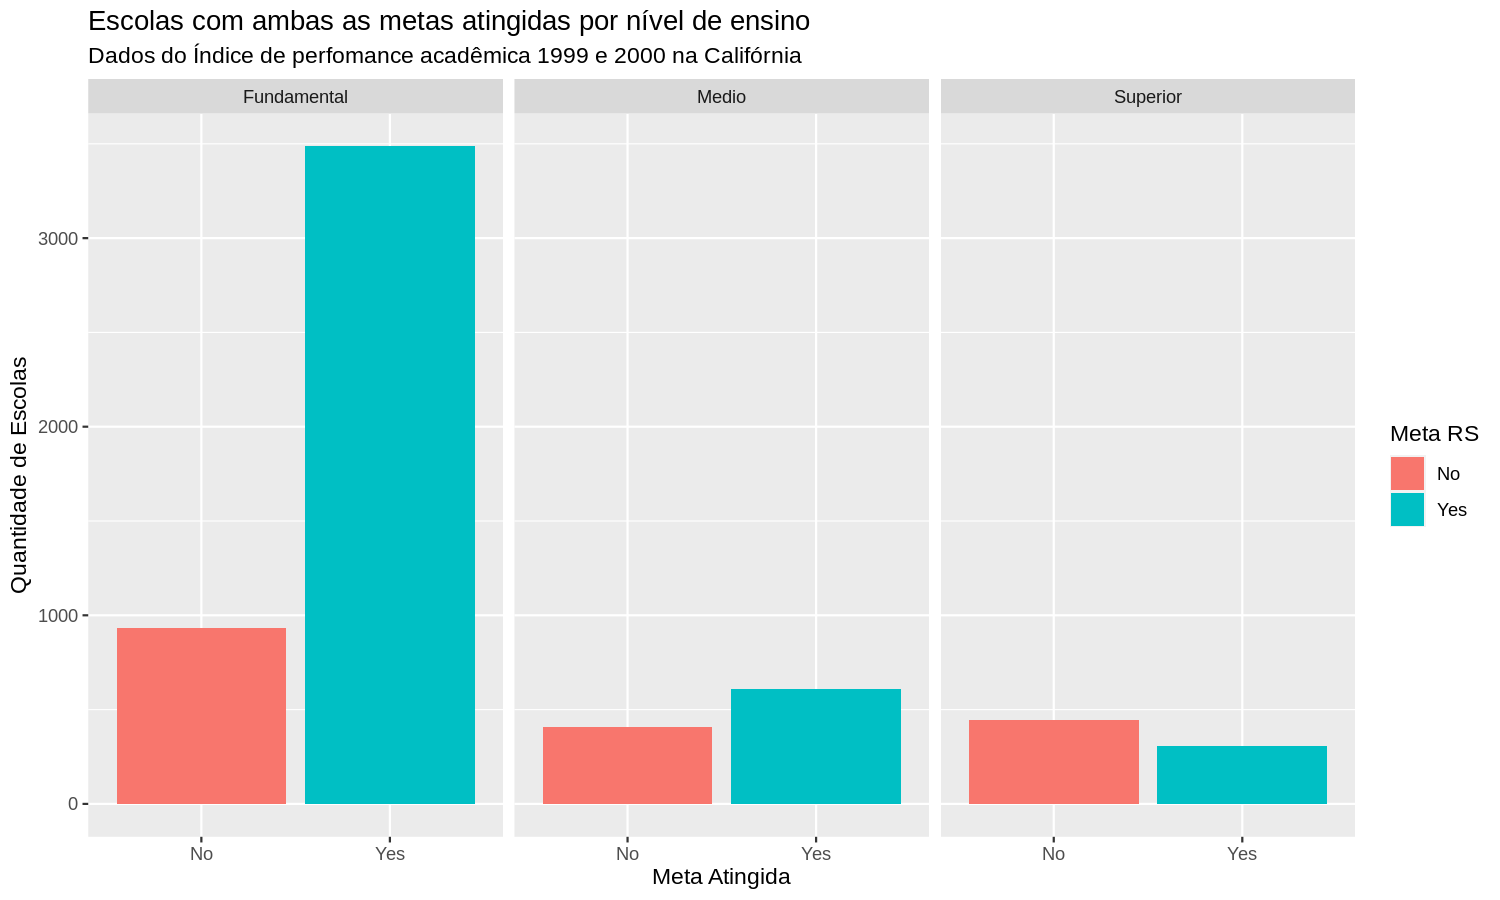

In [ ]:
df %>%
  ggplot(aes(x = meta_rs,fill = meta_rs)) +
  geom_bar(stat="count", position = "dodge") +
  facet_wrap(~tipo) +
  labs(
        title = "Escolas com ambas as metas atingidas por nível de ensino",
        subtitle = "Dados do Índice de perfomance acadêmica 1999 e 2000 na Califórnia",
        x = "Meta Atingida",
        y= "Quantidade de Escolas",
        fill = "Meta RS"
  )

* Nível Fundamental: Aproximadamente 80% das escolas de nível fundamental **atingiu ambas as metas**.  
* Nível Médio: A maioria das escolas **atingiu ambas as metas**.  
* Nível Superior: A maioria das escolas **não atingiu** ambas as metas.

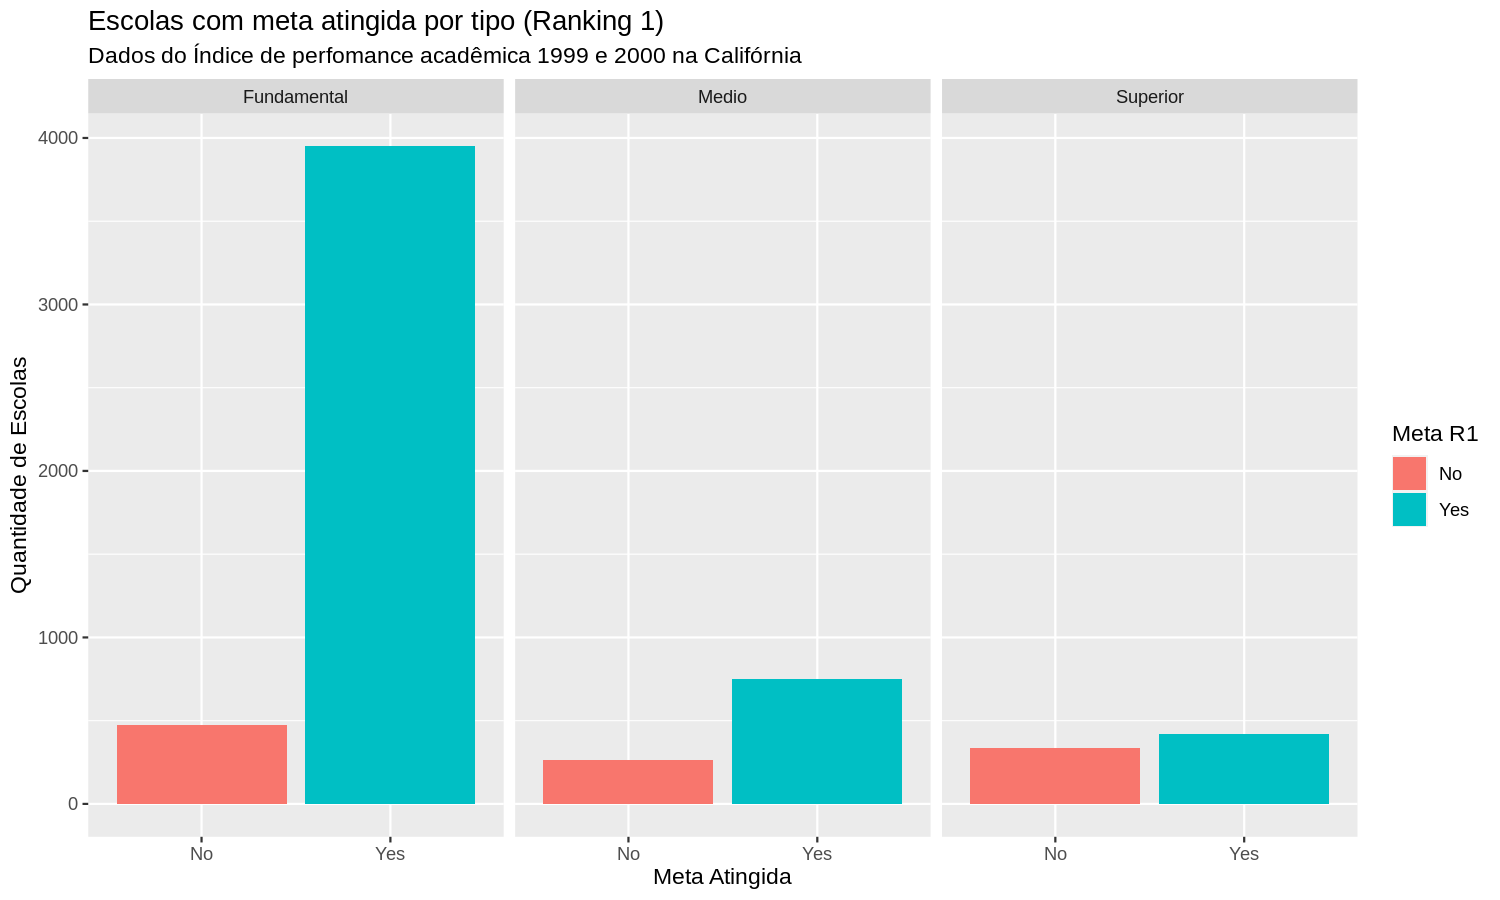

In [ ]:
df %>%
  ggplot(aes(x = meta_r1,fill = meta_r1)) +
  geom_bar(stat="count", position = "dodge") +
  facet_wrap(~tipo) +
  labs(
        title = "Escolas com meta atingida por tipo (Ranking 1)",
        subtitle = "Dados do Índice de perfomance acadêmica 1999 e 2000 na Califórnia",
        x = "Meta Atingida",
        y= "Quantidade de Escolas",
        fill = "Meta R1"
  )

* Nível Fundamental: A maioria das escolas **atingiu a meta do Ranking 1**.  
* Nível Médio: A maioria das escolas **atingiu a meta do Ranking 1**.  
* Nível Superior: A maioria das escolas **atingiu a meta do Ranking 1**.

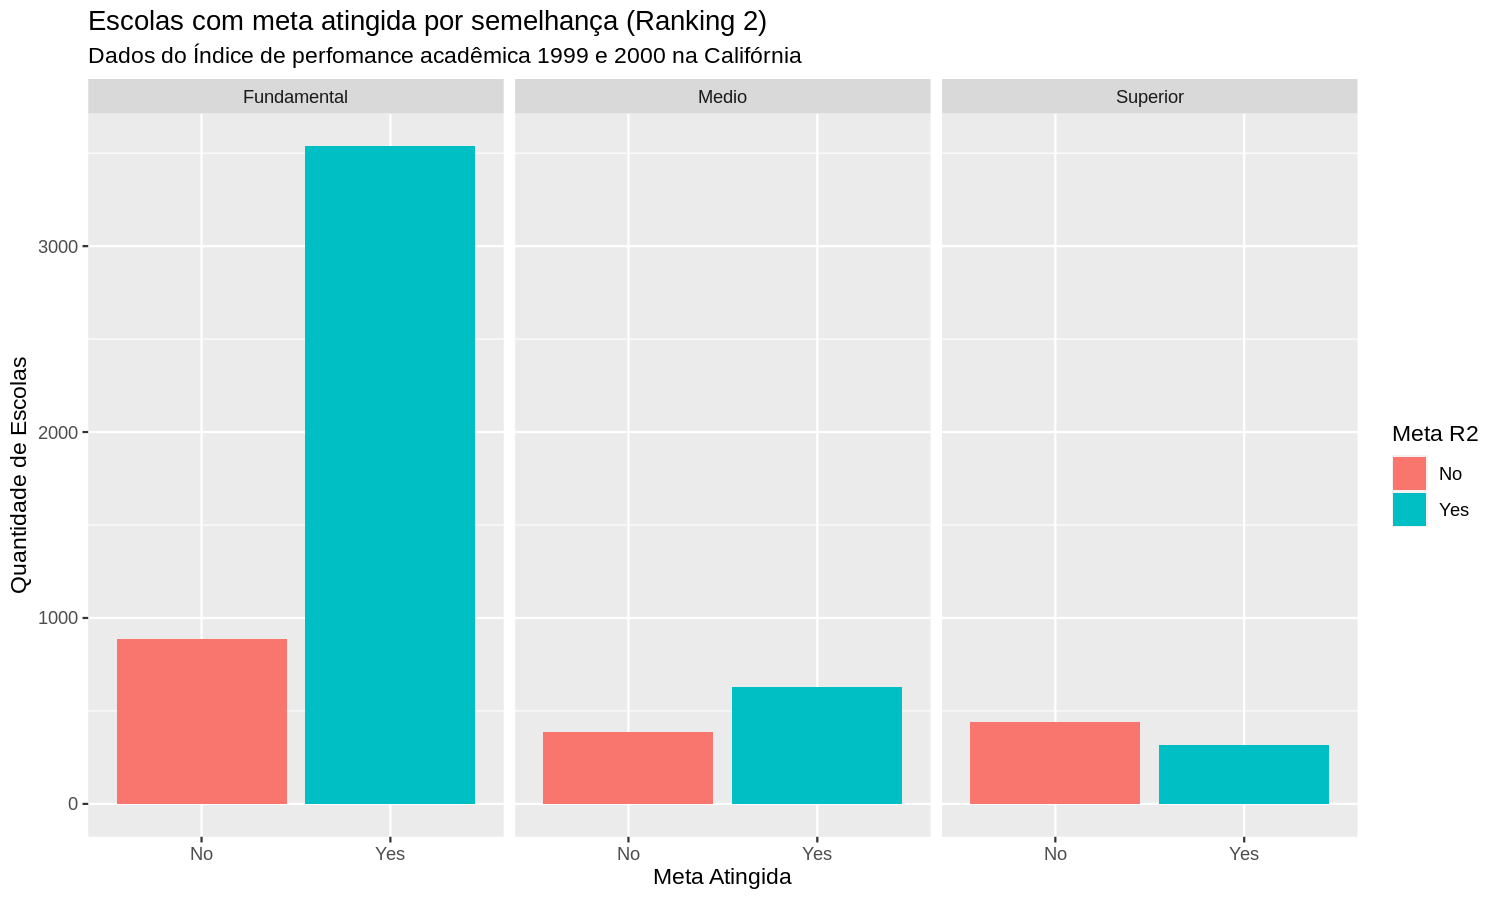

In [ ]:
df %>%
  ggplot(aes(x = meta_r2,fill = meta_r2)) +
  geom_bar(stat="count", position = "dodge") +
  facet_wrap(~tipo) +
  labs(
        title = "Escolas com meta atingida por semelhança (Ranking 2)",
        subtitle = "Dados do Índice de perfomance acadêmica 1999 e 2000 na Califórnia",
        x = "Meta Atingida",
        y= "Quantidade de Escolas",
        fill = "Meta R2"
  )

* Nível Fundamental: A maioria das escolas **atingiu a meta do Ranking 2**.  
* Nível Médio: A maioria das escolas **atingiu a meta do Ranking 2**.  
* Nível Superior: A maioria das escolas **não atingiu** a meta do Ranking 2.

<h3>Conclusão da seção</h3>


---


Notas, com uma análise um pouco mais abrangente, que as escolas de nível fundamental têm um desempenho melhor, dado que a proporção de instituições de ensino que não atingiram a meta é maior em nível superior,porém vemos que a distância da proporção vai diminuindo quanto maior for o nível de escolaridade de cada instituição.

Lembrando que lado a lado, os níveis não podem ser diretamente comparados, dado que não estão em proporção, e sim em valores.


---



## 2.2 Escolaridade dos Pais

Vamos ter uma análise inicial para conhecer o dados referente a escolaridade dos pais.

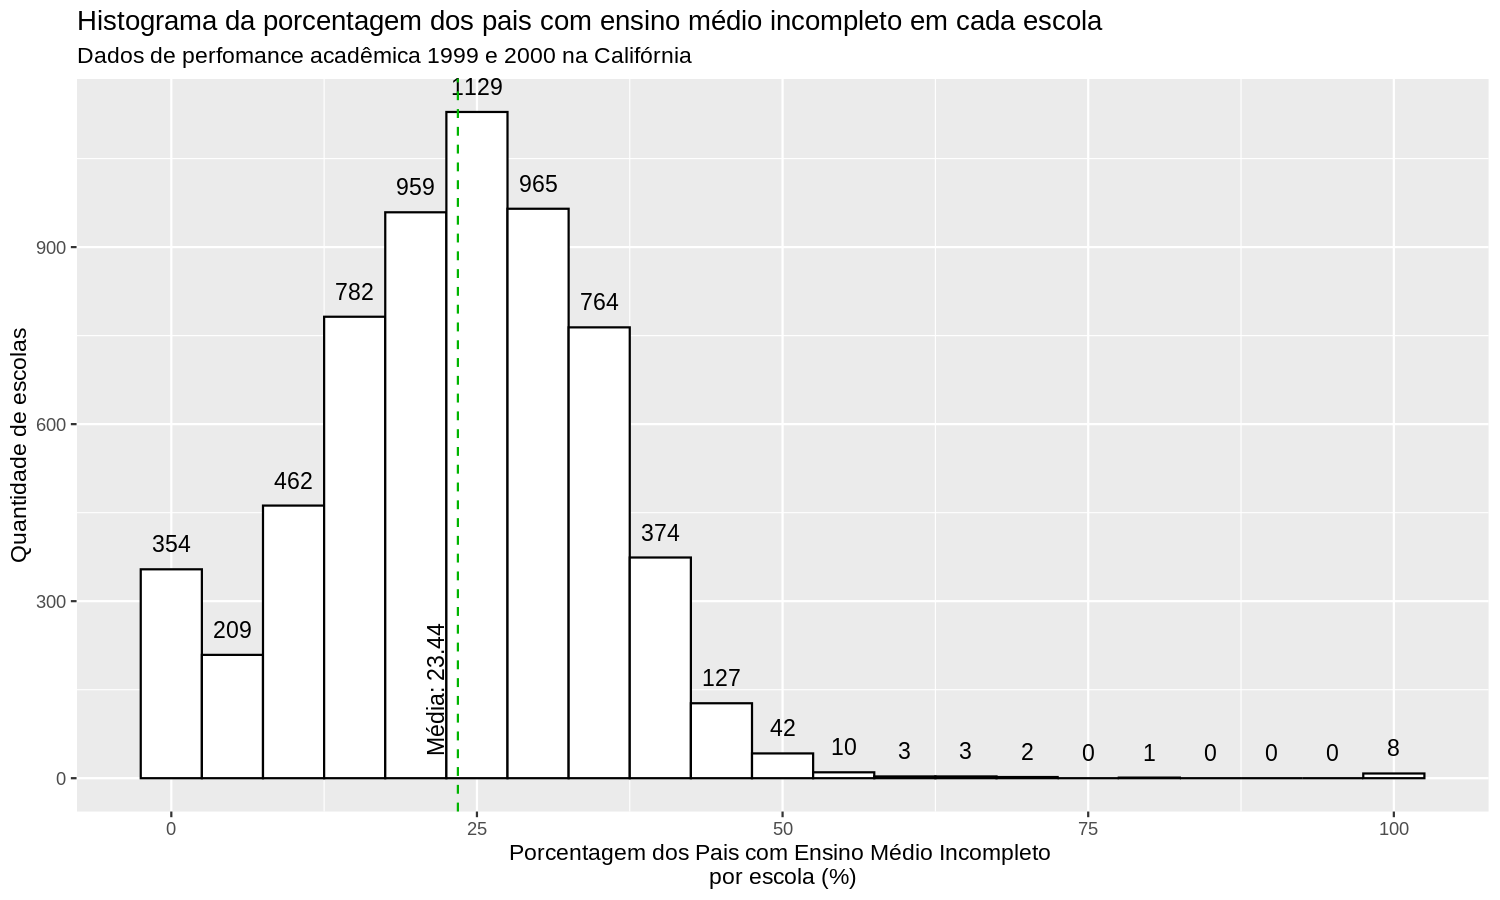

In [ ]:
media_medi <- mean(df$edu_medi)

df %>%
ggplot(aes(x = edu_medi)) +

geom_histogram(binwidth = 5, color="black", fill="white") +

stat_bin(
        binwidth = 5,
        geom = "text",
        aes(label = after_stat(count)),
        vjust = -1
) +

geom_vline(xintercept = media_medi, color ="#00B400", linetype = "dashed") +


labs(
      title = "Histograma da porcentagem dos pais com ensino médio incompleto em cada escola",
      subtitle = "Dados de perfomance acadêmica 1999 e 2000 na Califórnia",
      x = 'Porcentagem dos Pais com Ensino Médio Incompleto \npor escola (%)',
      y = "Quantidade de escolas"

) +

annotate(
          "text",
          x = media_medi - 1.8,
          y=150,
          label="Média: 23.44",
          angle=90
)

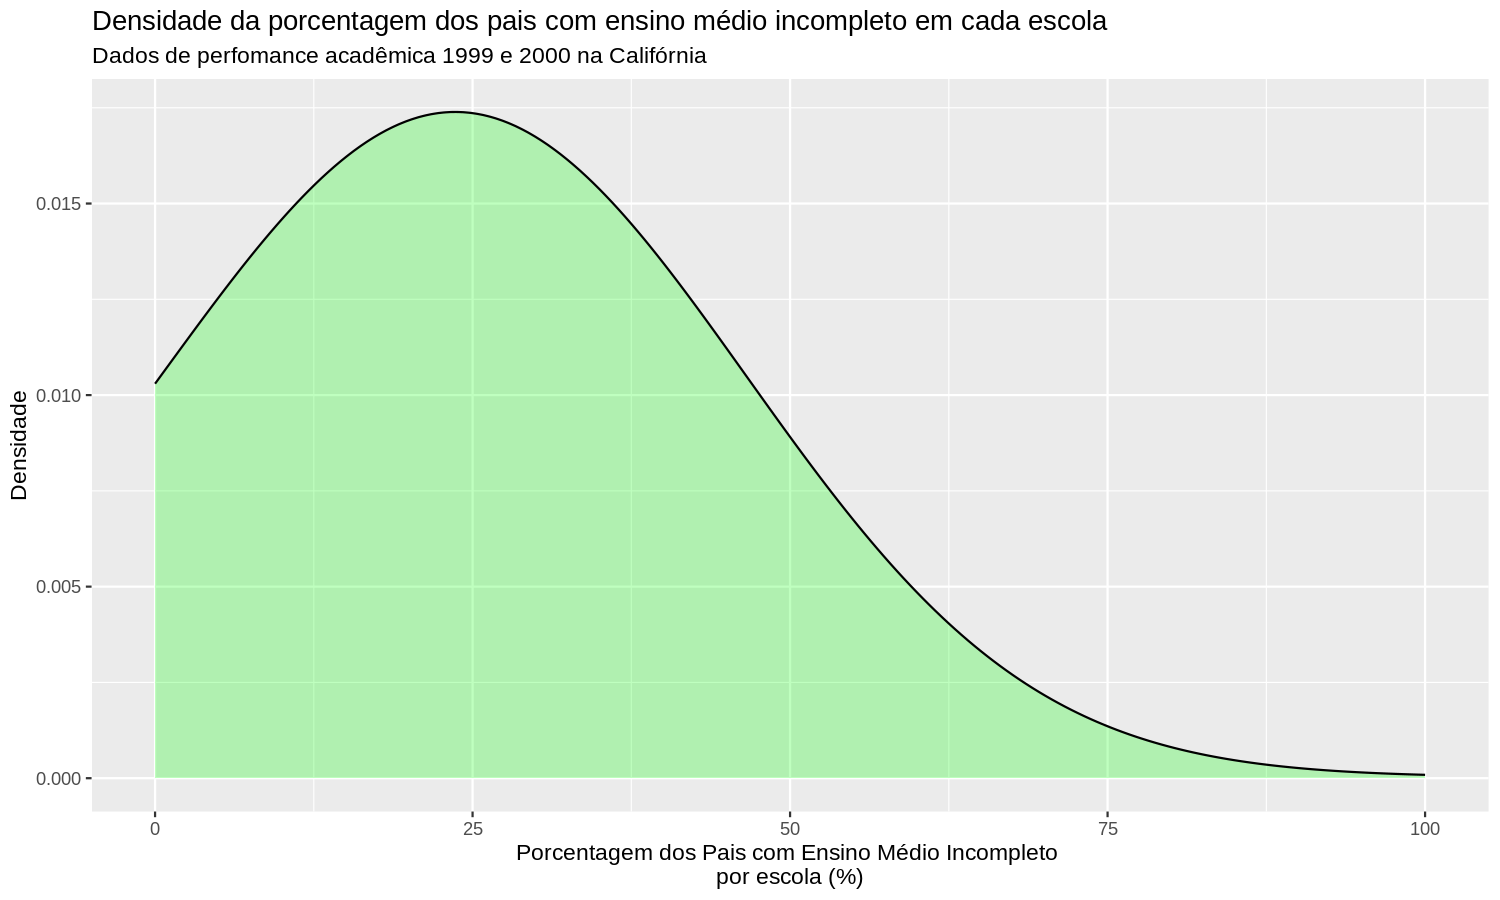

In [ ]:
df %>%
  ggplot(aes(x = edu_medi)) +
  geom_density(bw=20, kernel = "gaussian", alpha = .25, fill = "green") +
  labs(
        title = "Densidade da porcentagem dos pais com ensino médio incompleto em cada escola",
        subtitle = "Dados de perfomance acadêmica 1999 e 2000 na Califórnia",
        x = 'Porcentagem dos Pais com Ensino Médio Incompleto \npor escola (%)',
        y = "Densidade"
  )

A porcentagem média de  pais com ensino médio incompleto por escola é 23.44%.  
Portanto, somente 1/4 de cada escola é composta de alunos socioeconomicamente desfavorecidos nessa categoria.

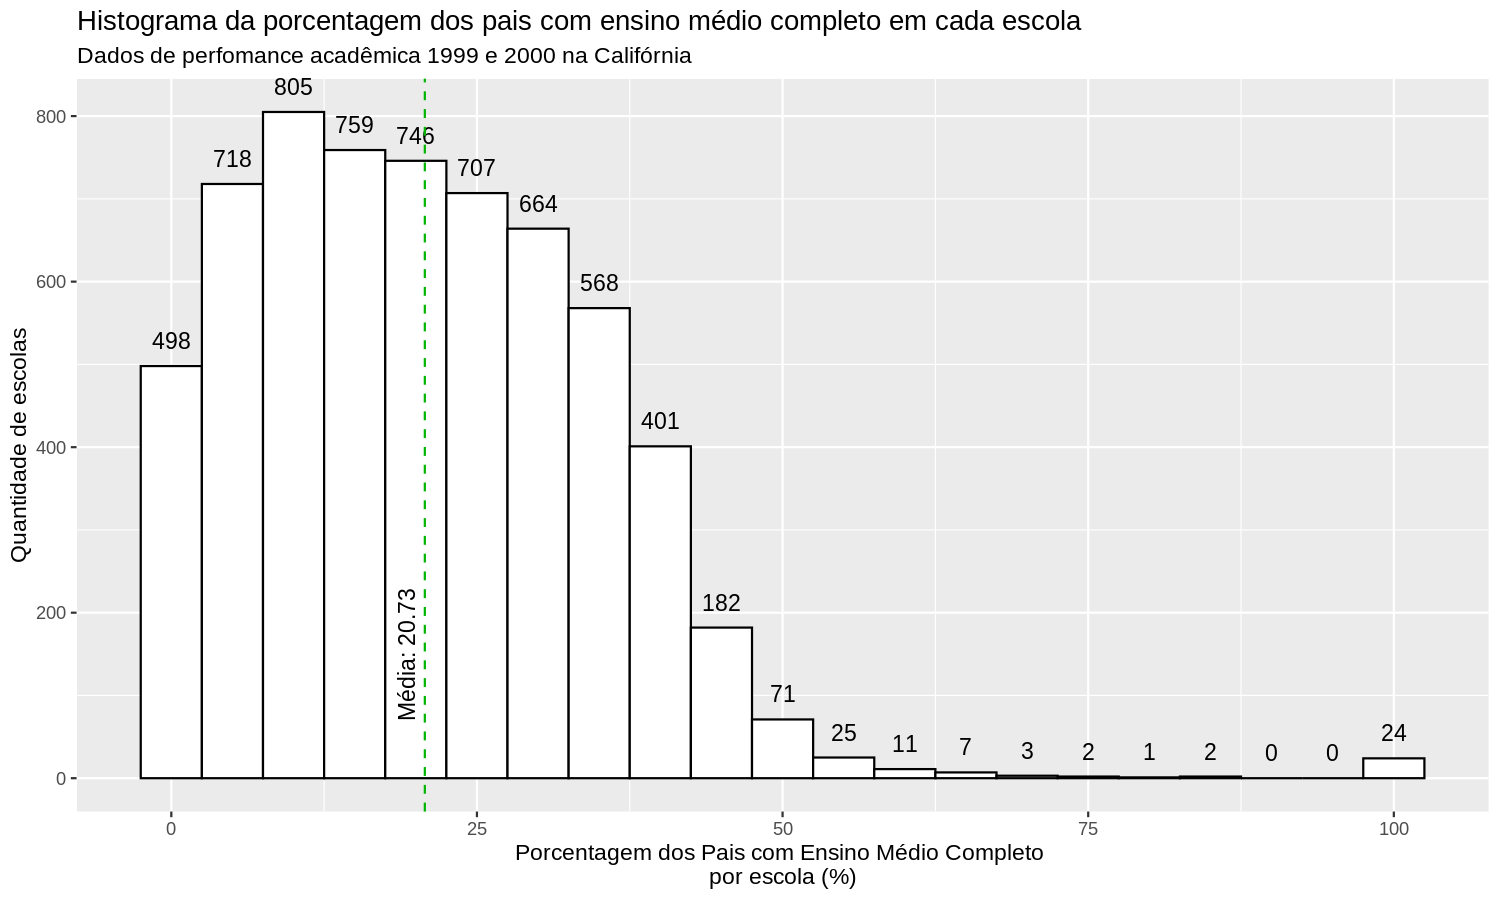

In [ ]:
media_med <- mean(df$edu_med)

df %>%
  ggplot(aes(x = edu_med)) +
  geom_histogram(binwidth = 5, color="black", fill="white") +
  stat_bin(
          binwidth = 5,
          geom = "text",
          aes(label = after_stat(count)),
          vjust = -1
  ) +
  geom_vline(xintercept = media_med, color ="#00B400", linetype = "dashed") +
  labs(
        title = "Histograma da porcentagem dos pais com ensino médio completo em cada escola",
        subtitle = "Dados de perfomance acadêmica 1999 e 2000 na Califórnia",
        x = 'Porcentagem dos Pais com Ensino Médio Completo \npor escola (%)',
        y = "Quantidade de escolas"

  ) +
  annotate(
            "text",
            x = media_med - 1.5,
            y=150,
            label="Média: 20.73",
            angle=90
  )

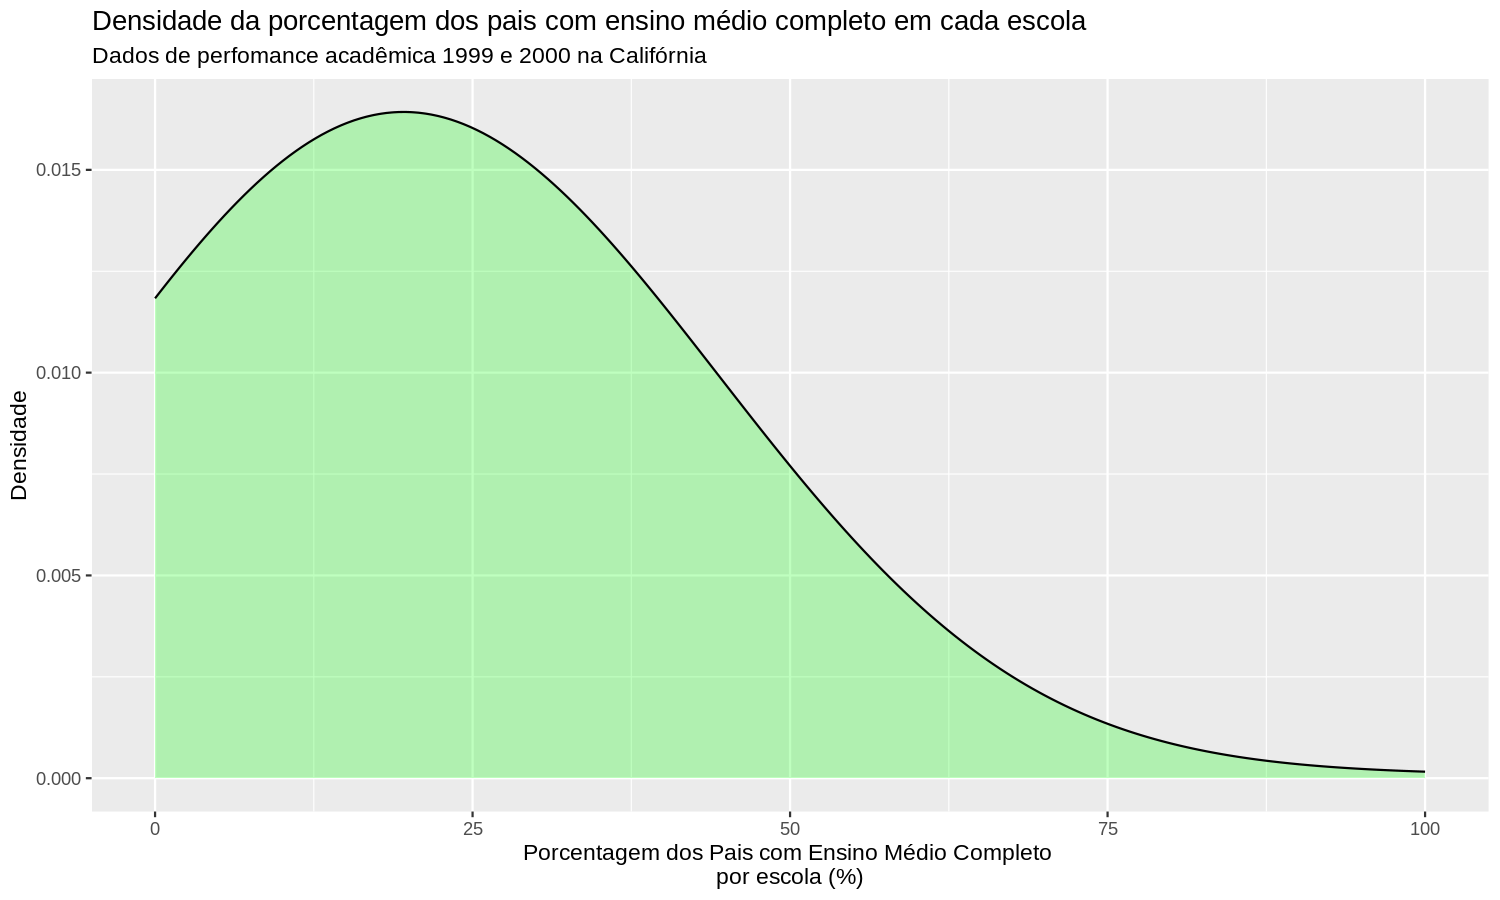

In [ ]:
df %>%
ggplot(aes(x = edu_med)) +
geom_density(bw=20, kernel = "gaussian", alpha = .25, fill = "green") +
labs(
      title = "Densidade da porcentagem dos pais com ensino médio completo em cada escola",
      subtitle = "Dados de perfomance acadêmica 1999 e 2000 na Califórnia",
      x = 'Porcentagem dos Pais com Ensino Médio Completo \npor escola (%)',
      y = "Densidade"
)

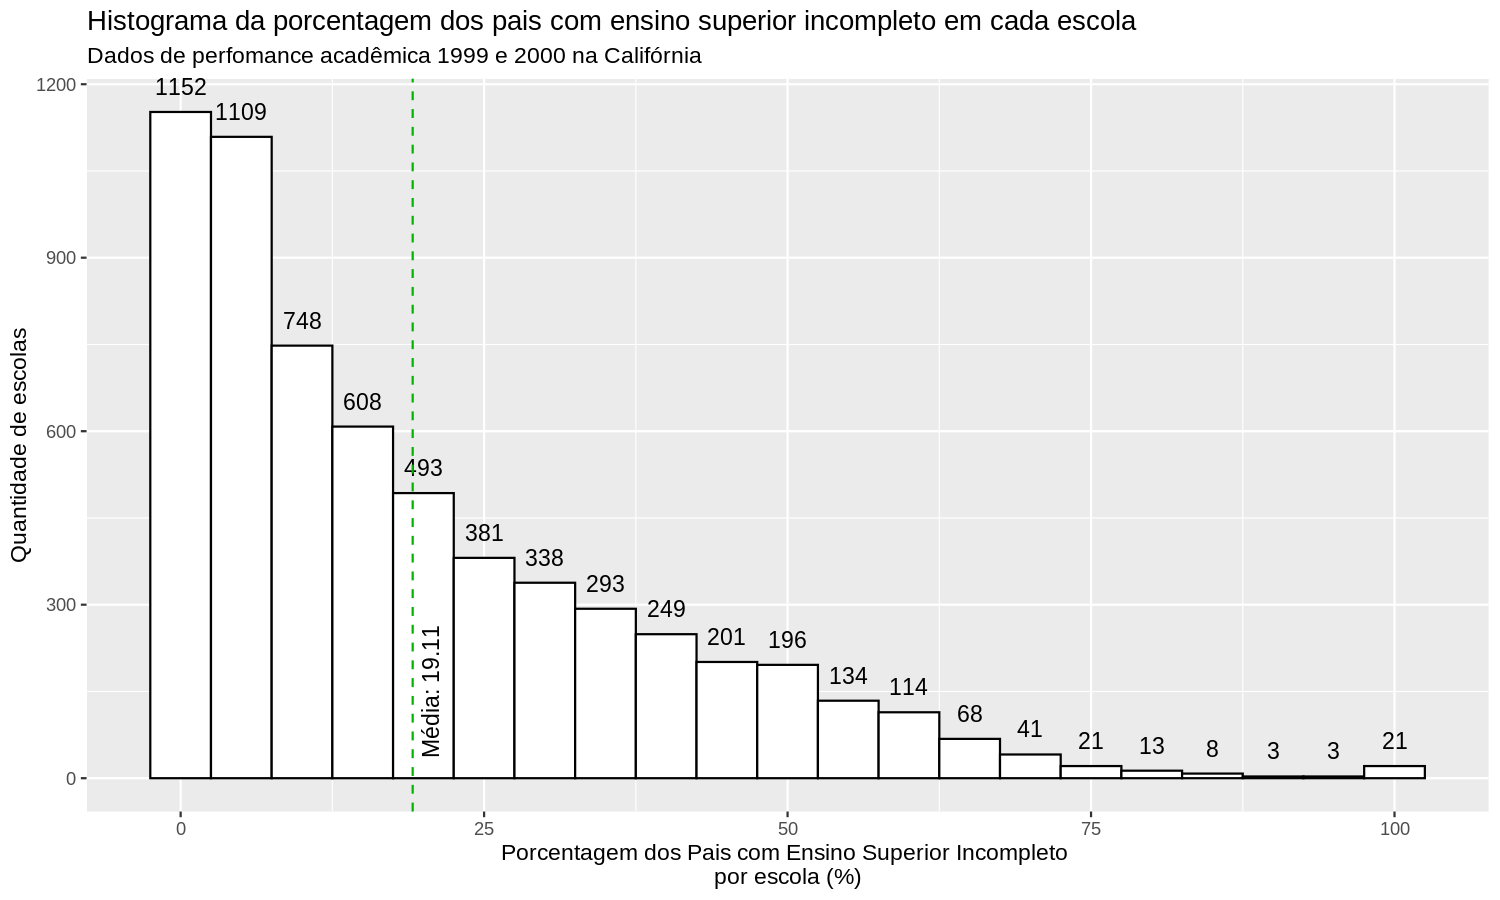

In [ ]:
media_supi <- mean(df$edu_supi)

df %>%
  ggplot(aes(x = edu_supi)) +
  geom_histogram(binwidth = 5, color="black", fill="white") +
  stat_bin(
          binwidth = 5,
          geom = "text",
          aes(label = after_stat(count)),
          vjust = -1
  ) +
  geom_vline(xintercept = media_supi, color ="#00B400", linetype = "dashed") +
  labs(
        title = "Histograma da porcentagem dos pais com ensino superior incompleto em cada escola",
        subtitle = "Dados de perfomance acadêmica 1999 e 2000 na Califórnia",
        x = 'Porcentagem dos Pais com Ensino Superior Incompleto \npor escola (%)',
        y = "Quantidade de escolas"

  ) +
  annotate(
            "text",
            x = media_supi + 1.5,
            y=150,
            label="Média: 19.11",
            angle=90
  )

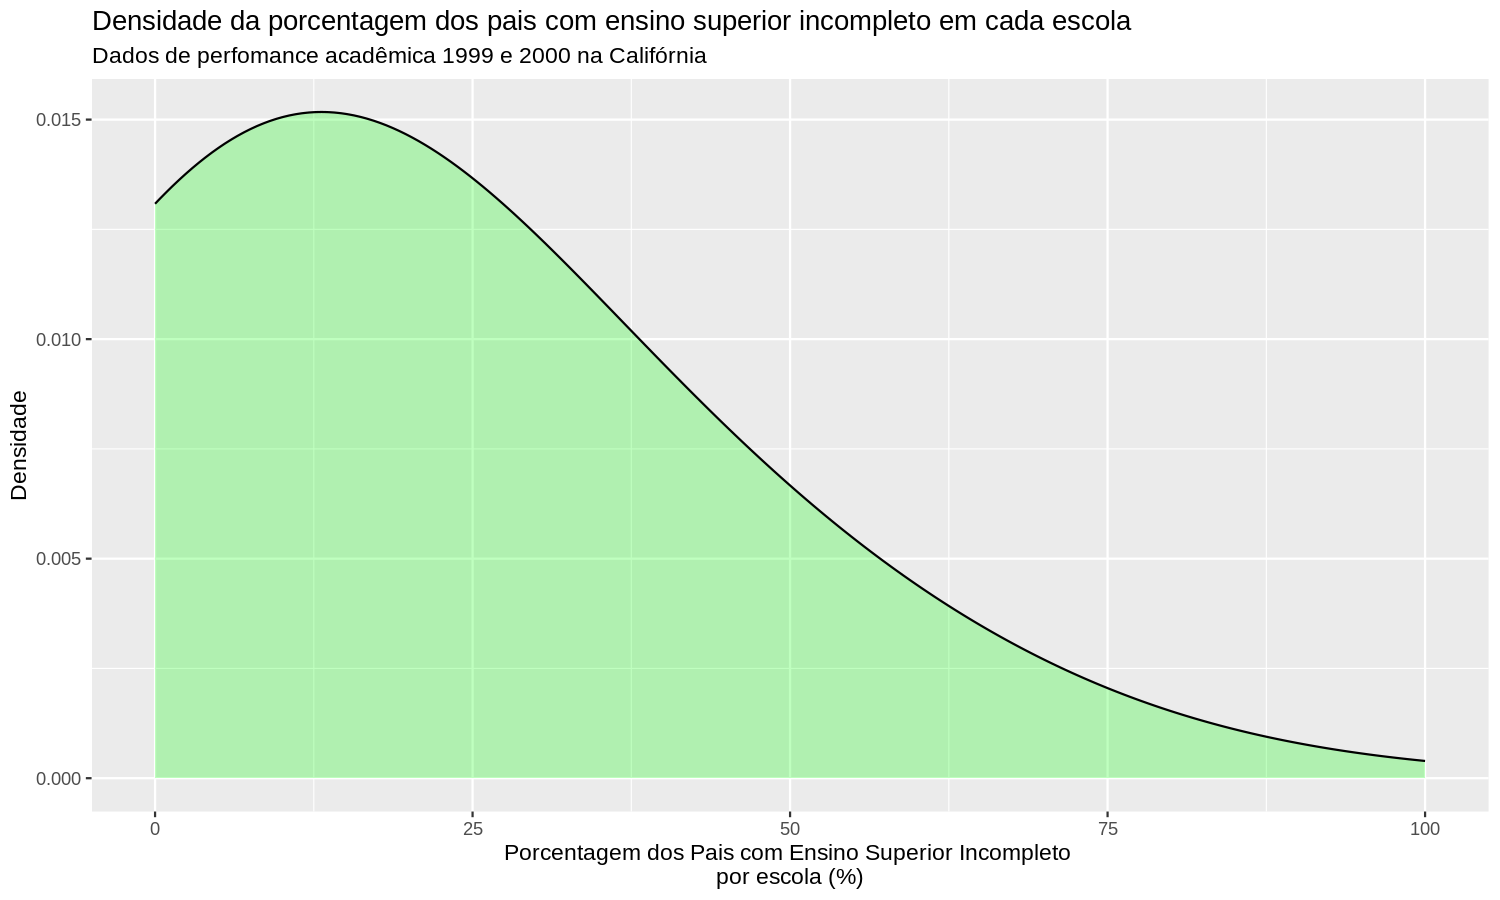

In [ ]:
df %>%
ggplot(aes(x = edu_supi)) +

geom_density(bw=20, kernel = "gaussian", alpha = .25, fill = "green") +

labs(
      title = "Densidade da porcentagem dos pais com ensino superior incompleto em cada escola",
      subtitle = "Dados de perfomance acadêmica 1999 e 2000 na Califórnia",
      x = 'Porcentagem dos Pais com Ensino Superior Incompleto \npor escola (%)',
      y = "Densidade"
)

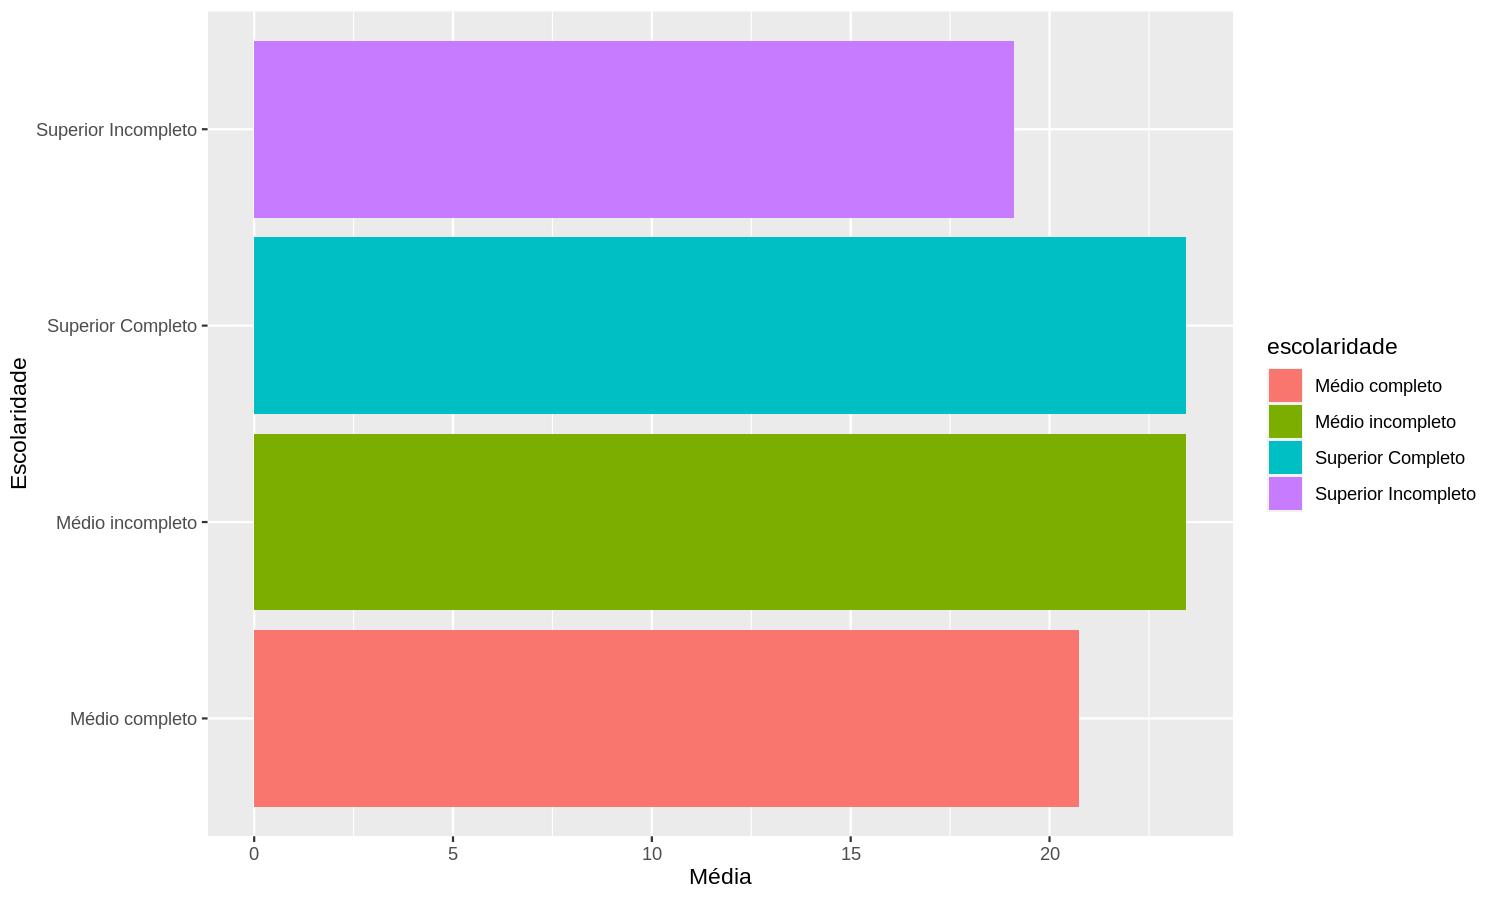

In [ ]:
#Criando dados das médias de escolaridade dos pais
#####################################################
media_medi <- mean(df$edu_medi)
media_med <- mean(df$edu_med)
media_supi <- mean(df$edu_supi)
media_sup <- mean(df$edu_sup)

dados_medias_pais <- data.frame(
  escolaridade = c("médio incompleto", "médio completo", "superior incompleto", "superior completo"),
  media = c(media_medi, media_med, media_supi, media_sup)
)

###################################################
media_medi <- mean(df$edu_medi)
media_med <- mean(df$edu_med)
media_supi <- mean(df$edu_supi)
media_sup <- mean(df$edu_sup)

dados_medias_pais <- data.frame(
  escolaridade = c("Médio incompleto", "Médio completo", "Superior Incompleto", "Superior Completo"),
  media = c(media_medi, media_med, media_supi, media_sup)
)

#Plotando gráfico de barras das médias de escolaridade dos pais
dados_medias_pais %>%
  ggplot(aes(x = media, y = escolaridade, fill = escolaridade)) +
  geom_bar(stat="identity") +
  labs(
  y = "Escolaridade",
  x = "Média"
  )

In [ ]:
#Criando dataframe filtrado por metas

df_no_metars <-  dplyr::filter(df, meta_rs == "No")
df_yes_metars <-  dplyr::filter(df, meta_rs == "Yes")
df_no_metar1 <- dplyr::filter(df, meta_r1 == "No")
df_yes_metar1 <-  dplyr::filter(df, meta_r1 == "Yes")
df_no_metar2 <- dplyr::filter(df, meta_r2 == "No")
df_yes_metar2 <-  dplyr::filter(df, meta_r2 == "Yes")

#função para criar dados das médias de escolaridade dos pais
#####################################################
cria_df_meta_pais <- function(df_no, df_yes){
  media_medi_no <- mean(df_no$edu_medi)
  media_medi_yes <- mean(df_yes$edu_medi)

  media_med_no <- mean(df_no$edu_med)
  media_med_yes <- mean(df_yes$edu_med)

  media_supi_no <- mean(df_no$edu_supi)
  media_supi_yes <- mean(df_yes$edu_supi)

  media_sup_no <- mean(df_no$edu_sup)
  media_sup_yes <- mean(df_yes$edu_sup)


  dados <- data.frame(
    escolaridade = c("médio incompleto", "médio incompleto",
    "médio completo", "médio completo",
    "superior incompleto", "superior incompleto",
    "superior completo", "superior completo"
    ),
    media = c(media_medi_no, media_medi_yes,
    media_med_no, media_med_yes,
    media_supi_no, media_supi_yes,
    media_sup_no, media_sup_yes
    ),
    meta = c("no", "yes", "no", "yes", "no", "yes", "no", "yes"
    )
  )

  return(dados)

}


Criamos uma função para facilitar a análise de dados referente a escolaridade dos pais filtrando pelas metas.

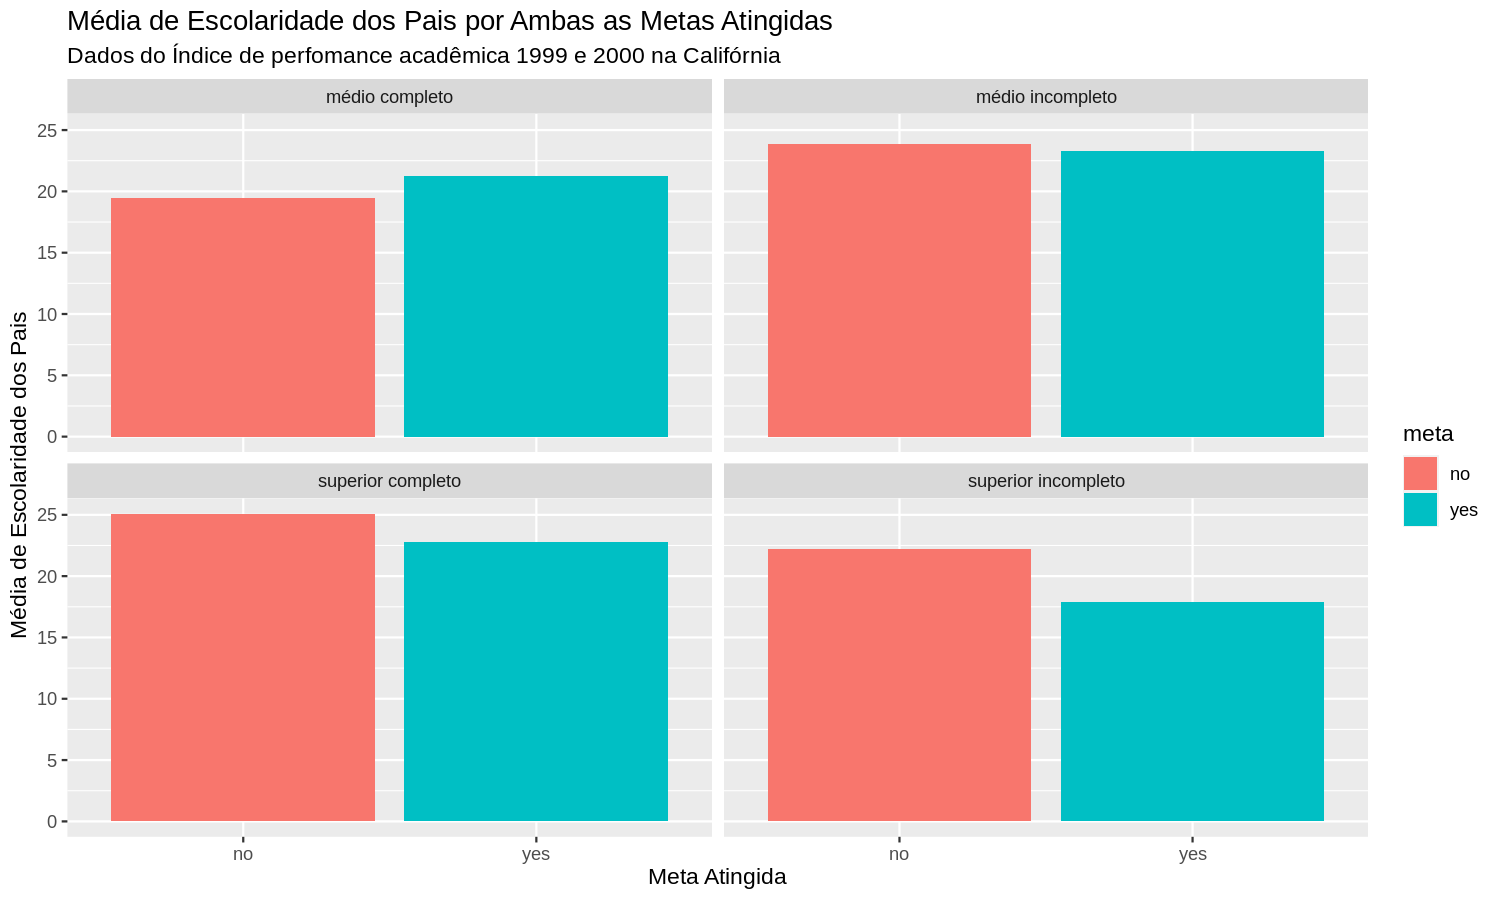

In [ ]:
#Criando dados da META RS
df_meta_pais_rs <- cria_df_meta_pais(df_no_metars, df_yes_metars)

#Plotando gráfico de barras das médias de escolaridade dos pais
df_meta_pais_rs %>%
  ggplot(aes(x = meta, y = media, fill = meta)) +
  geom_bar(stat="identity", position = "dodge") +
  facet_wrap(~escolaridade) +
  labs(
        title = "Média de Escolaridade dos Pais por Ambas as Metas Atingidas",
        subtitle = "Dados do Índice de perfomance acadêmica 1999 e 2000 na Califórnia",
        x = "Meta Atingida",
        y= "Média de Escolaridade dos Pais"
  )

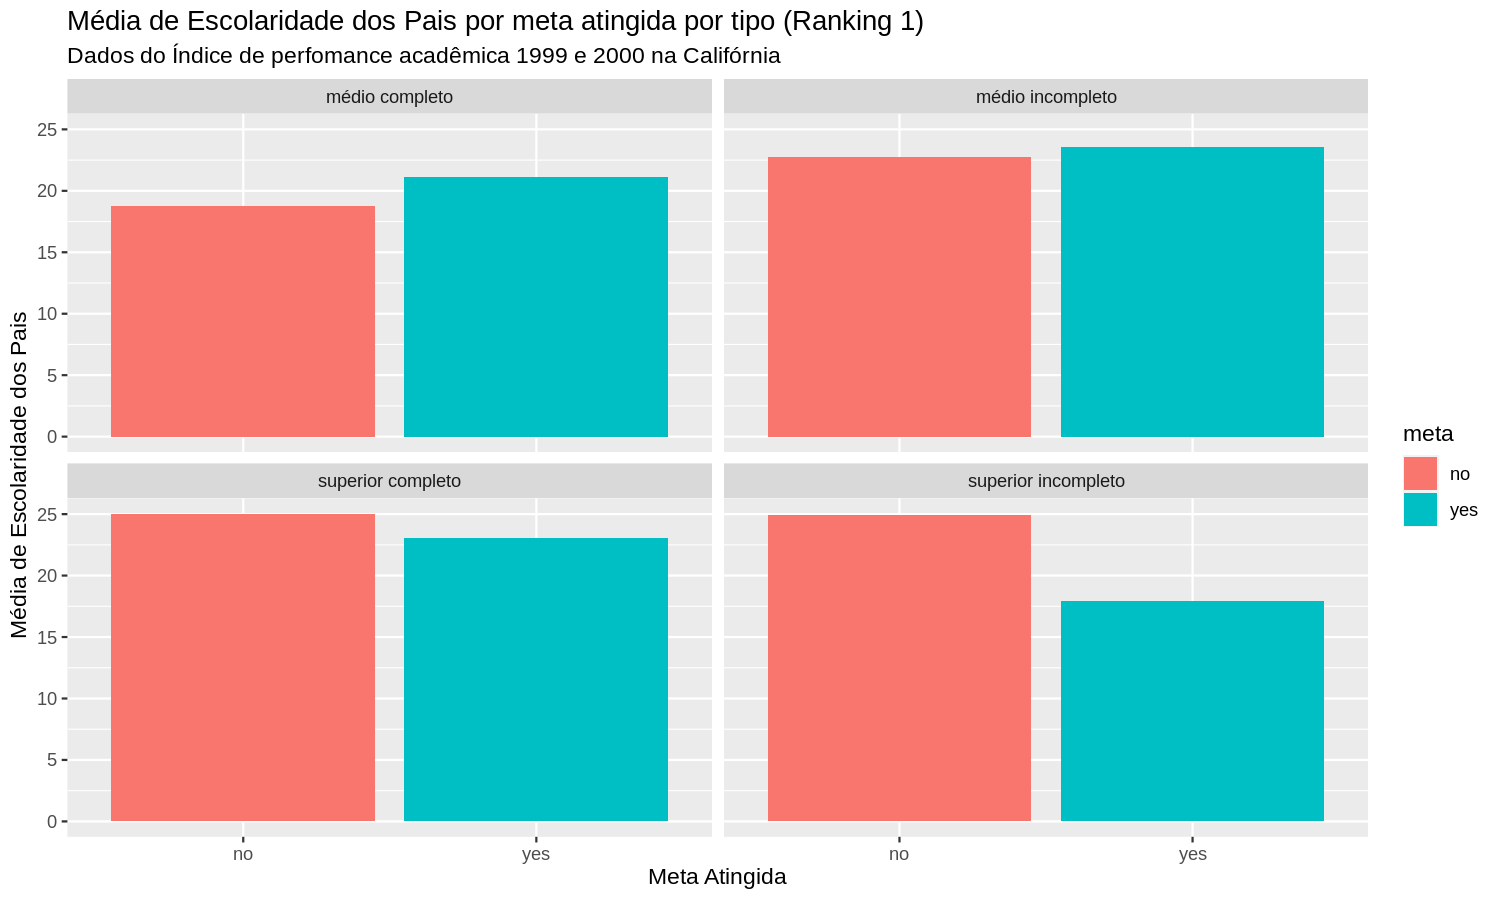

In [ ]:
#Criando dados da META R1
df_meta_pais_r1 <- cria_df_meta_pais(df_no_metar1, df_yes_metar1)

#plotando gráfico de barras das médias de escolaridade dos pais
df_meta_pais_r1 %>%
  ggplot(aes(x = meta, y = media, fill = meta)) +
  geom_bar(stat="identity", position = "dodge") +
  facet_wrap(~escolaridade) +
  labs(
        title = "Média de Escolaridade dos Pais por meta atingida por tipo (Ranking 1)",
        subtitle = "Dados do Índice de perfomance acadêmica 1999 e 2000 na Califórnia",
        x = "Meta Atingida",
        y= "Média de Escolaridade dos Pais"
  )

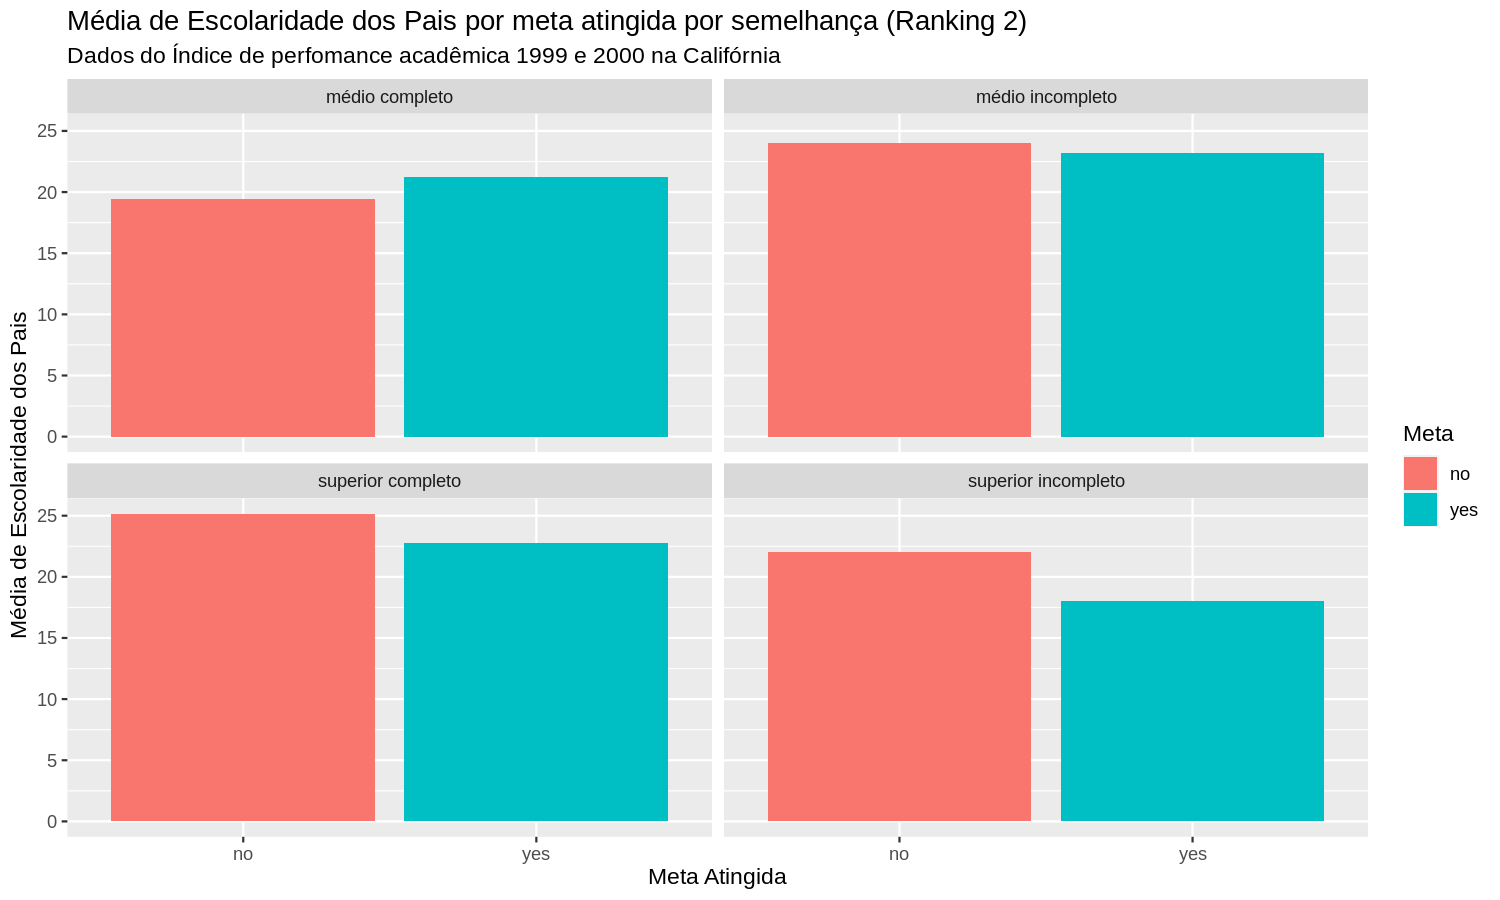

In [ ]:
#Criando dados da META R2
df_meta_pais_r2 <- cria_df_meta_pais(df_no_metar2, df_yes_metar2)

#plotando gráfico de barras das médias de escolaridade dos pais
df_meta_pais_r2 %>%
  ggplot(aes(x = meta, y = media, fill = meta)) +
  geom_bar(stat="identity", position = "dodge") +
  facet_wrap(~escolaridade) +
  labs(
        title = "Média de Escolaridade dos Pais por meta atingida por semelhança (Ranking 2)",
        subtitle = "Dados do Índice de perfomance acadêmica 1999 e 2000 na Califórnia",
        x = "Meta Atingida",
        y= "Média de Escolaridade dos Pais",
        fill = "Meta"
  )

Analisando a média de escolaridade dos pais, observamos que as escolas que atingiram a meta do Ranking 2 tem uma composição maior de pais com ensino médio completo, comp

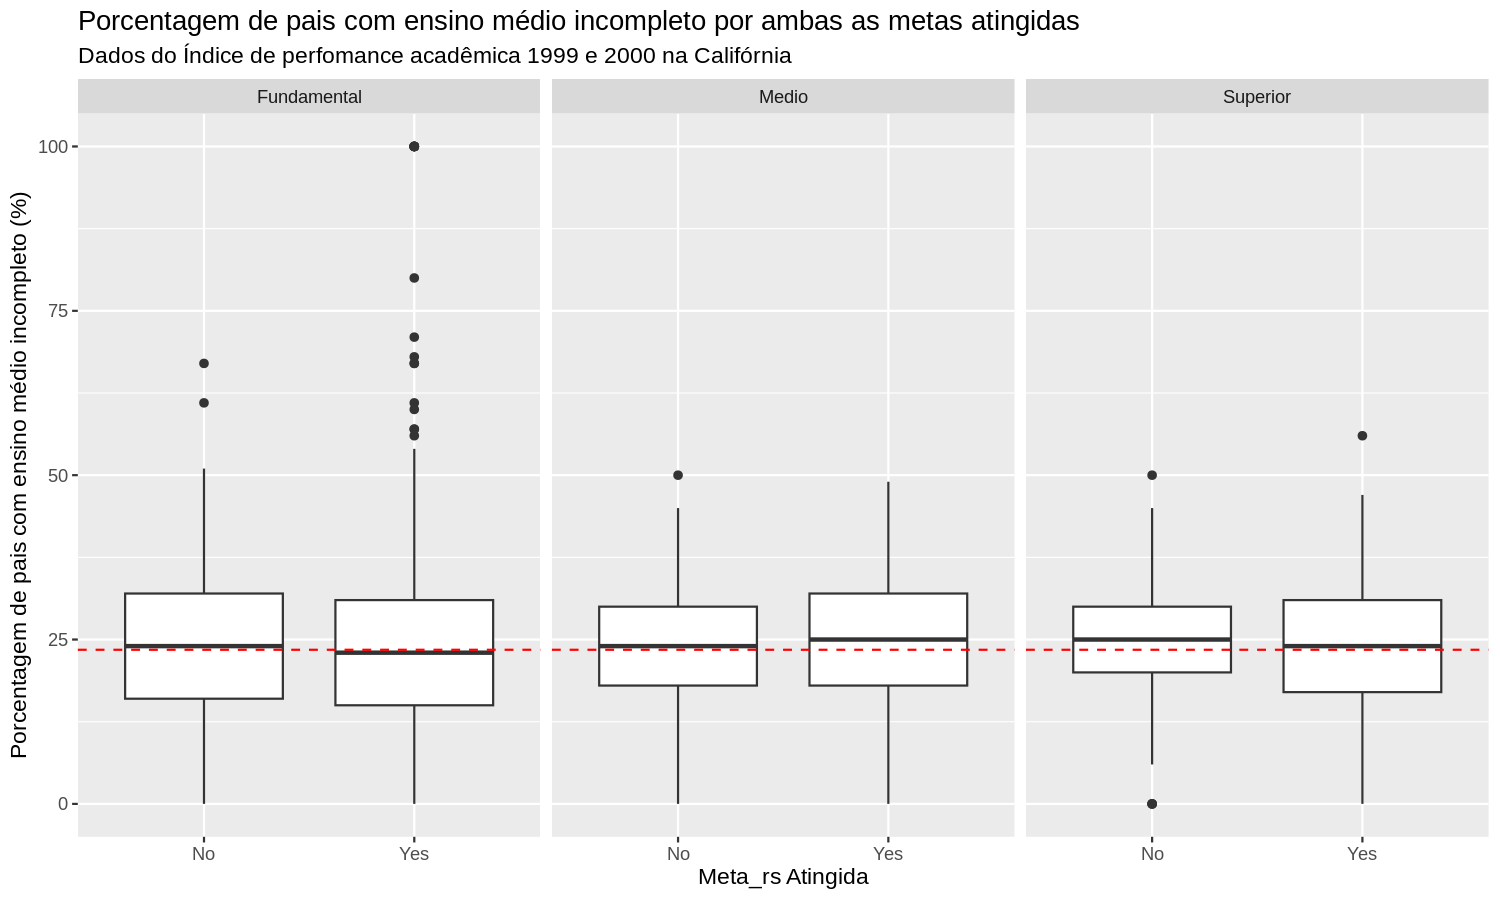

In [ ]:
ggplot(data = df, aes(x = meta_rs, y = edu_medi)) +
    geom_boxplot() +
    geom_hline(yintercept = media_medi, color = "red", linetype = "dashed") +
    facet_wrap(~tipo) +
    labs(
        title = "Porcentagem de pais com ensino médio incompleto por ambas as metas atingidas",
        subtitle = "Dados do Índice de perfomance acadêmica 1999 e 2000 na Califórnia",
        x = "Meta_rs Atingida",
        y = "Porcentagem de pais com ensino médio incompleto (%)"
    )

Não existe diferença considerável nas escolas que atingiram ambas as metas com relação aos pais que possuem Ensino Médio Incompleto.

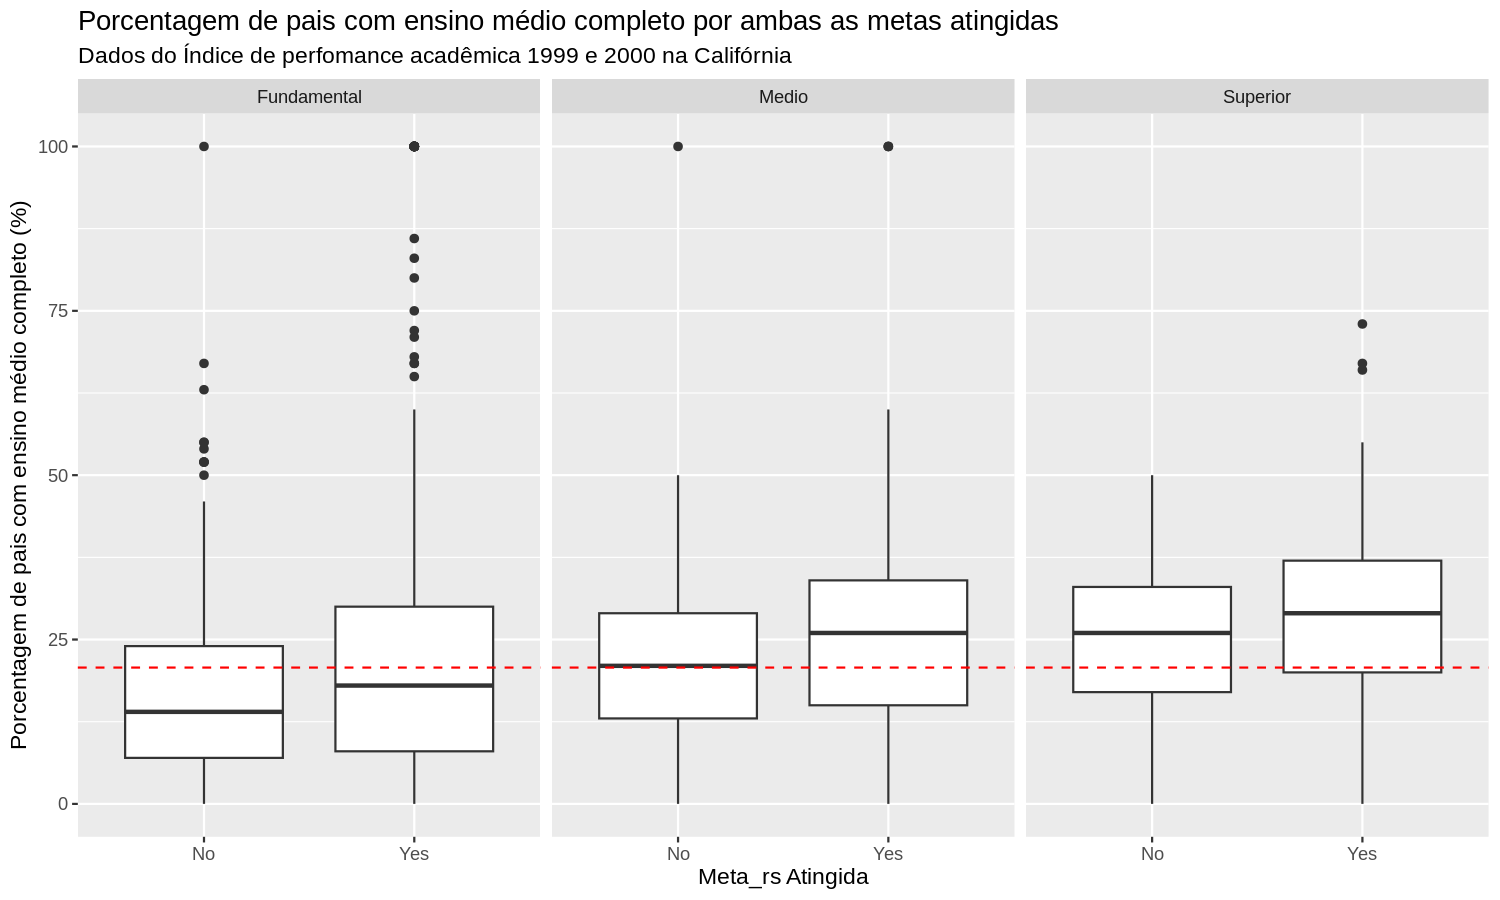

In [ ]:
ggplot(data = df, aes(x = meta_rs, y = edu_med)) +
    geom_boxplot() +
    geom_hline(yintercept = media_med, color = "red", linetype = "dashed") +
    facet_wrap(~tipo) +
    labs(
        title = "Porcentagem de pais com ensino médio completo por ambas as metas atingidas",
        subtitle = "Dados do Índice de perfomance acadêmica 1999 e 2000 na Califórnia",
        x = "Meta_rs Atingida",
        y = "Porcentagem de pais com ensino médio completo (%)"
    )

A maioria das escolas que atingiram ambas as metas, são compostas por uma porcentagem maior de pais que possuem ensino médio completo, comparado às escolas que não atingiram ambas as metas.

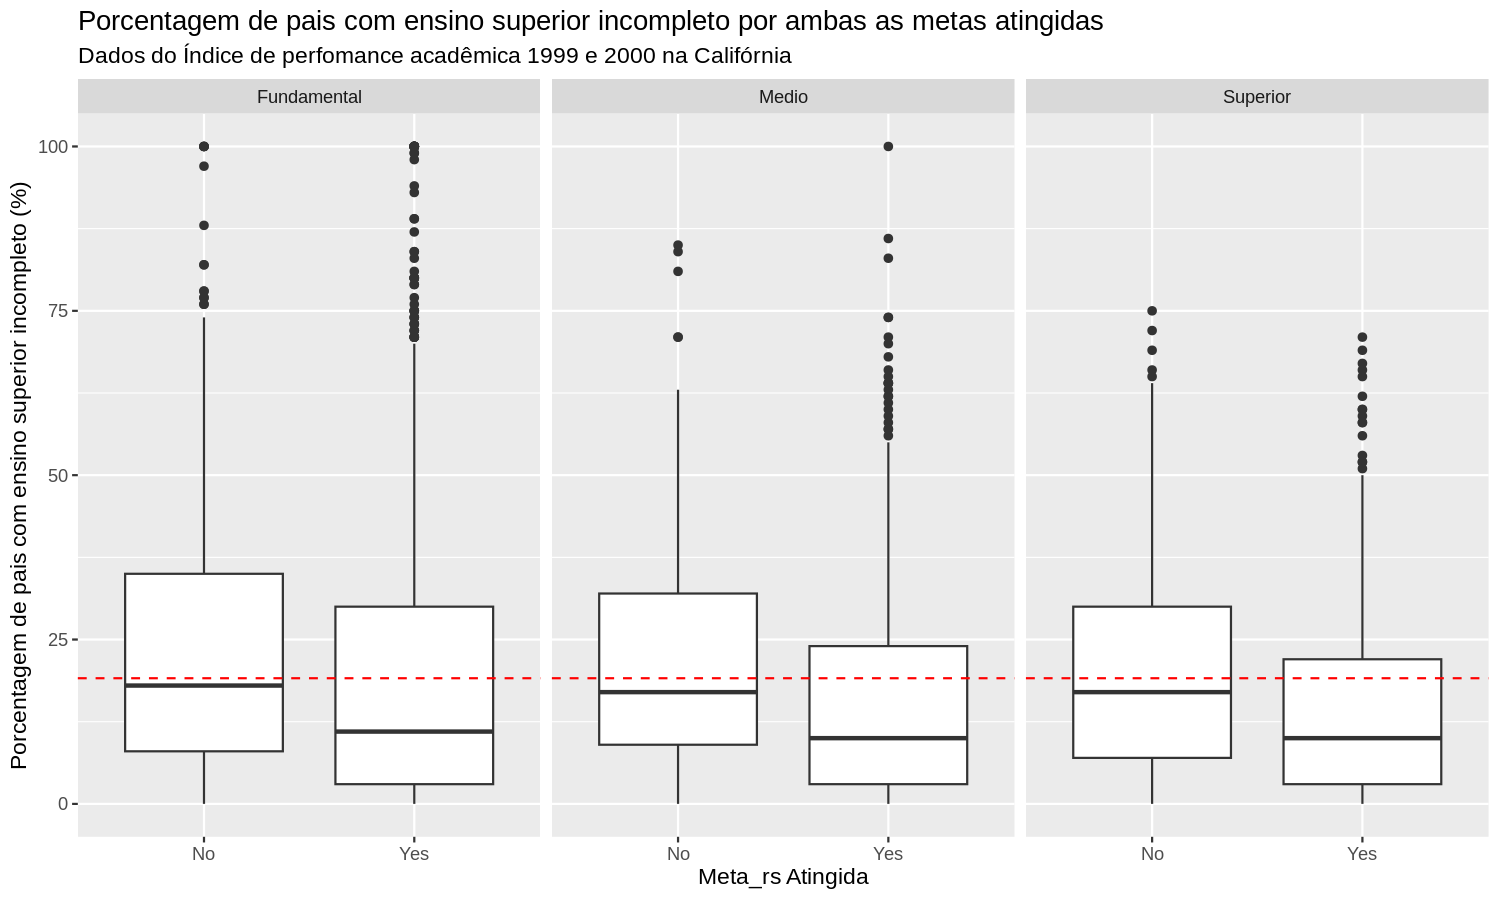

In [ ]:
ggplot(data = df, aes(x = meta_rs, y = edu_supi)) +
    geom_boxplot() +
    geom_hline(yintercept = media_supi, color = "red", linetype = "dashed") +
    facet_wrap(~tipo) +
    labs(
        title = "Porcentagem de pais com ensino superior incompleto por ambas as metas atingidas",
        subtitle = "Dados do Índice de perfomance acadêmica 1999 e 2000 na Califórnia",
        x = "Meta_rs Atingida",
        y = "Porcentagem de pais com ensino superior incompleto (%)"
    )

A maioria das escolas que atingiram ambas as metas, são compostas por uma porcentagem menor de pais que possuem ensino superior incompleto, comparado às escolas que não atingiram a meta.

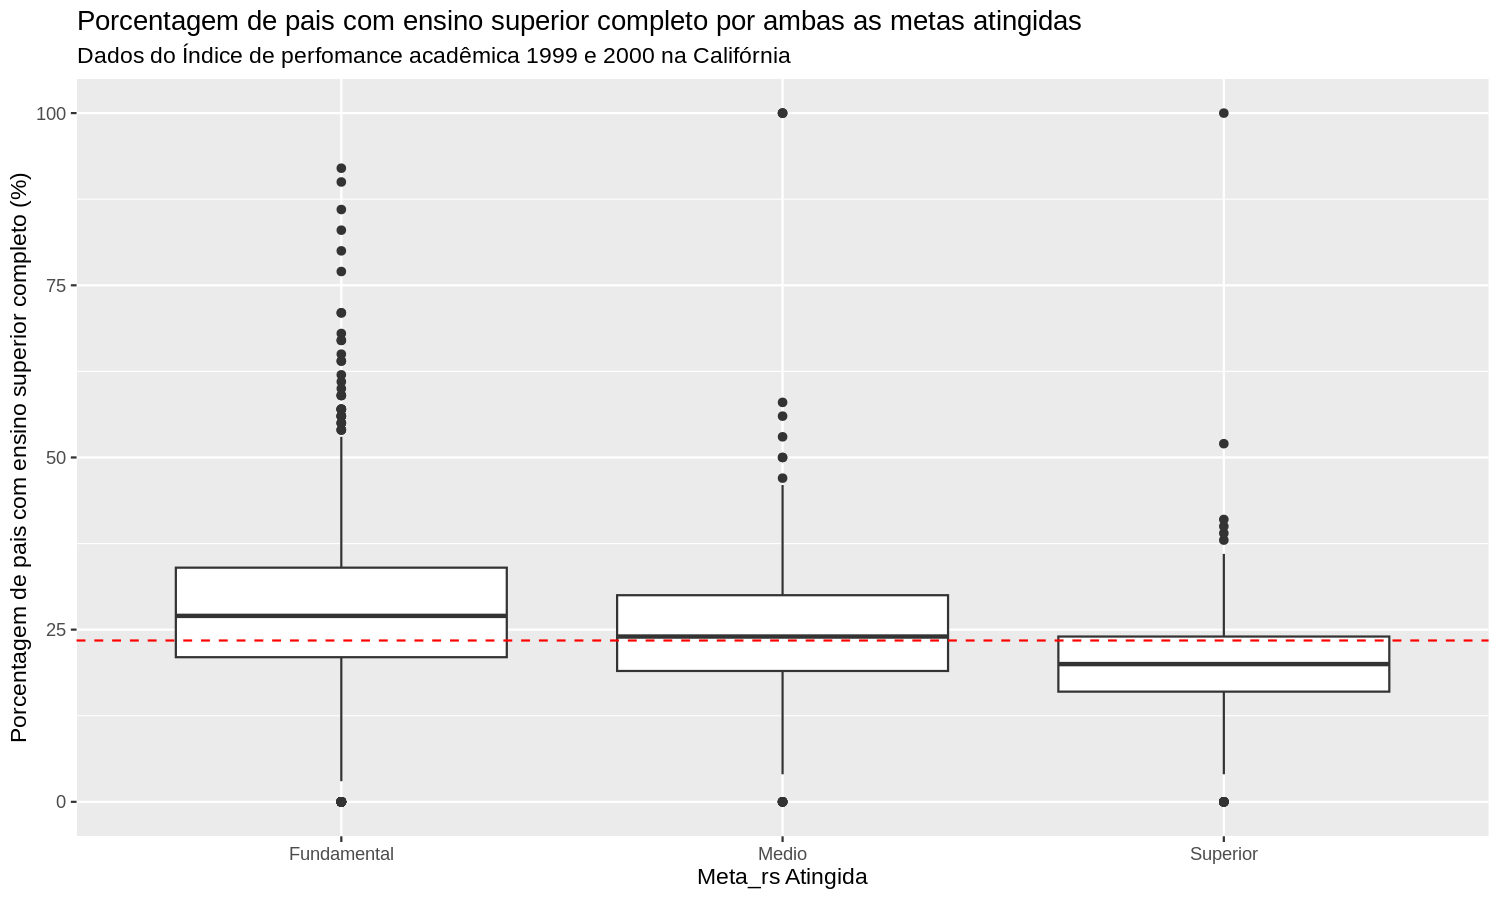

In [ ]:
  df %>%
    filter(meta_rs == "No") %>%
      ggplot(aes(x = tipo, y = edu_sup)) +
      geom_boxplot() +
      geom_hline(yintercept = media_sup, color = "red", linetype = "dashed")  +
      labs(
          title = "Porcentagem de pais com ensino superior completo por ambas as metas atingidas",
          subtitle = "Dados do Índice de perfomance acadêmica 1999 e 2000 na Califórnia",
          x = "Meta_rs Atingida",
          y = "Porcentagem de pais com ensino superior completo (%)"
      )

Em escolas que não atingiram a meta, notamos de início que quando os pais não possuem nível supe

Warning message:
“Use of `df$edu` is discouraged.
ℹ Use `edu` instead.”
`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.
Warning message:
“Removed 178 rows containing non-finite values (`stat_bin()`).”


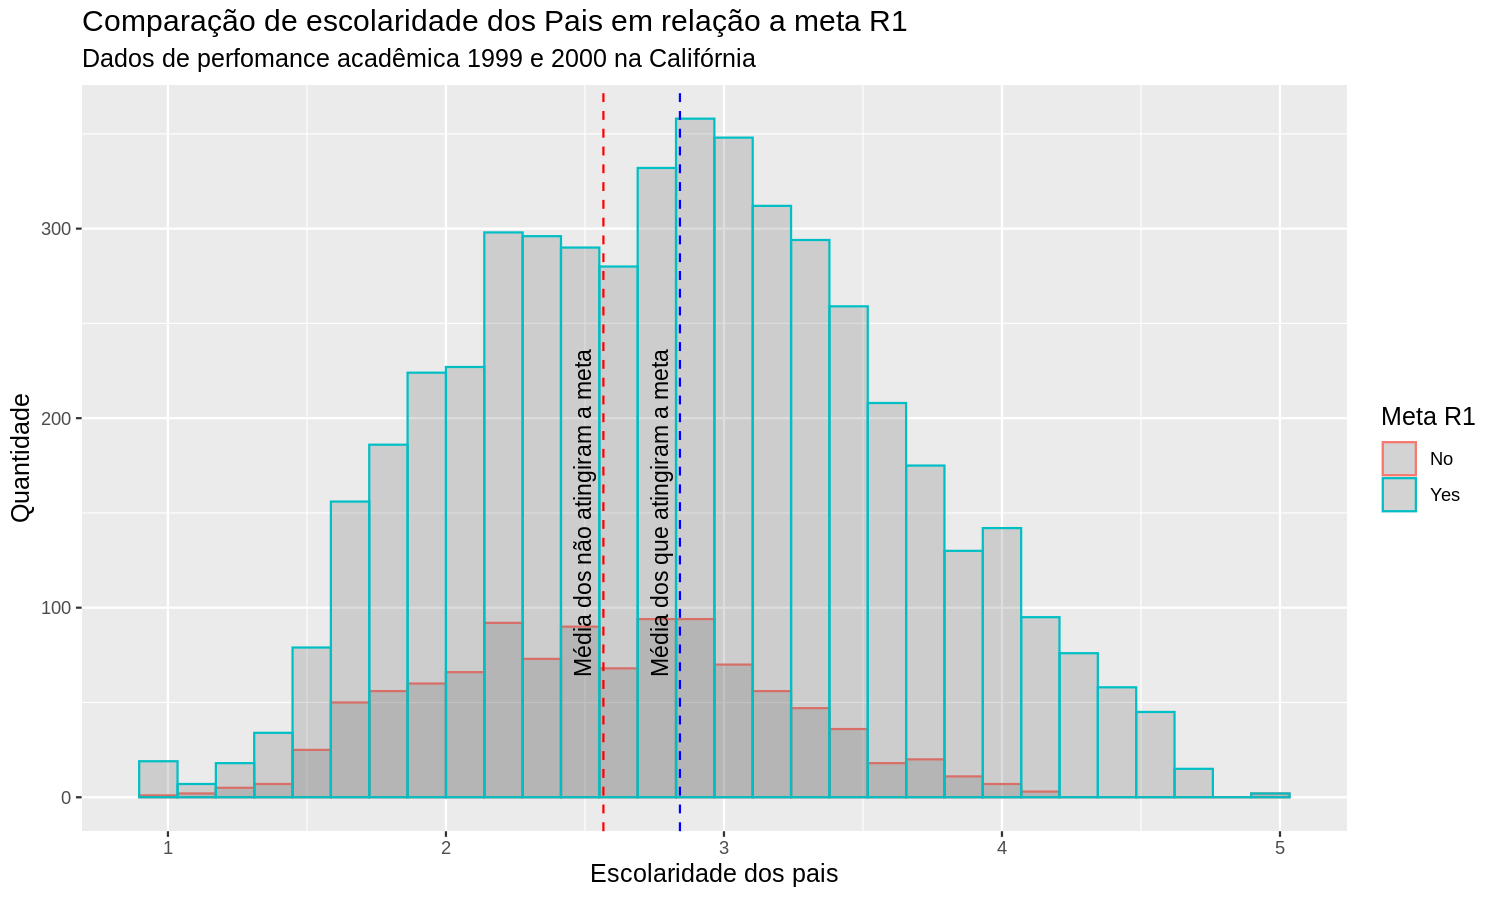

In [ ]:
# Criando a média da educação dos pais nas escolas que bateram e não bateram a
# Meta R1
med_edu_yes <- df %>% filter(df$meta_r1 == 'Yes')
med_edu_yes <- mean(med_edu_yes$edu,na.rm = T)
med_edu_no <- df %>% filter(df$meta_r1 == 'No')
med_edu_no <- mean(med_edu_no$edu,na.rm = T)

# Criando hitograma
bateram_meta <- df %>%
  ggplot(mapping = aes(x = df$edu,color=meta_r1)) +
    geom_histogram( alpha=0.2, position="identity") +
    geom_vline(xintercept =c(med_edu_yes,med_edu_no),
               color =c("blue","red"),
               linetype = "dashed") + # Colocando retas verticais
    labs(
    title = "Comparação de escolaridade dos Pais em relação a meta R1",
    subtitle = "Dados de perfomance acadêmica 1999 e 2000 na Califórnia",
    y = "Quantidade",
    x = "Escolaridade dos pais",
    color="Meta R1"
    ) +
    theme(title = element_text(size = 12))+
    annotate(
          "text",
          x = c(med_edu_yes-0.075,med_edu_no-0.075)  ,
          y=150,
          label=c("Média dos que atingiram a meta","Média dos não atingiram a meta"),
          angle=90
    )
print(bateram_meta)

No gráfico acima temos a relação entre média da escolaridade dos pais e atingir a meta R1, onde 1 significa Ensino médio incompleto e o 5 signica pais com Pós-Graduação concluida, a reta vertical da cor vermelha e azul, são respectivamente a média da media da escolaridade dos pais das escolas que não atingiram a meta e a azul os que atingiram a meta.

Diante disso, percebe-se que a média da escolaridade dos pais é maior para as escolas que atingiram a meta. De modo mais visual, temos pelo histograma que a quantidade de escola que não atingiram a meta e possuem média de escolaridade dos pais acima de 4 (Superior completo) é bem abaixo comparada a quantidade de escolas que atingiram a meta.

Vamos analisar agora a relação entre a educação dos pais e a meta R2.

Warning message:
“Use of `df$edu` is discouraged.
ℹ Use `edu` instead.”
`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.
Warning message:
“Removed 178 rows containing non-finite values (`stat_bin()`).”


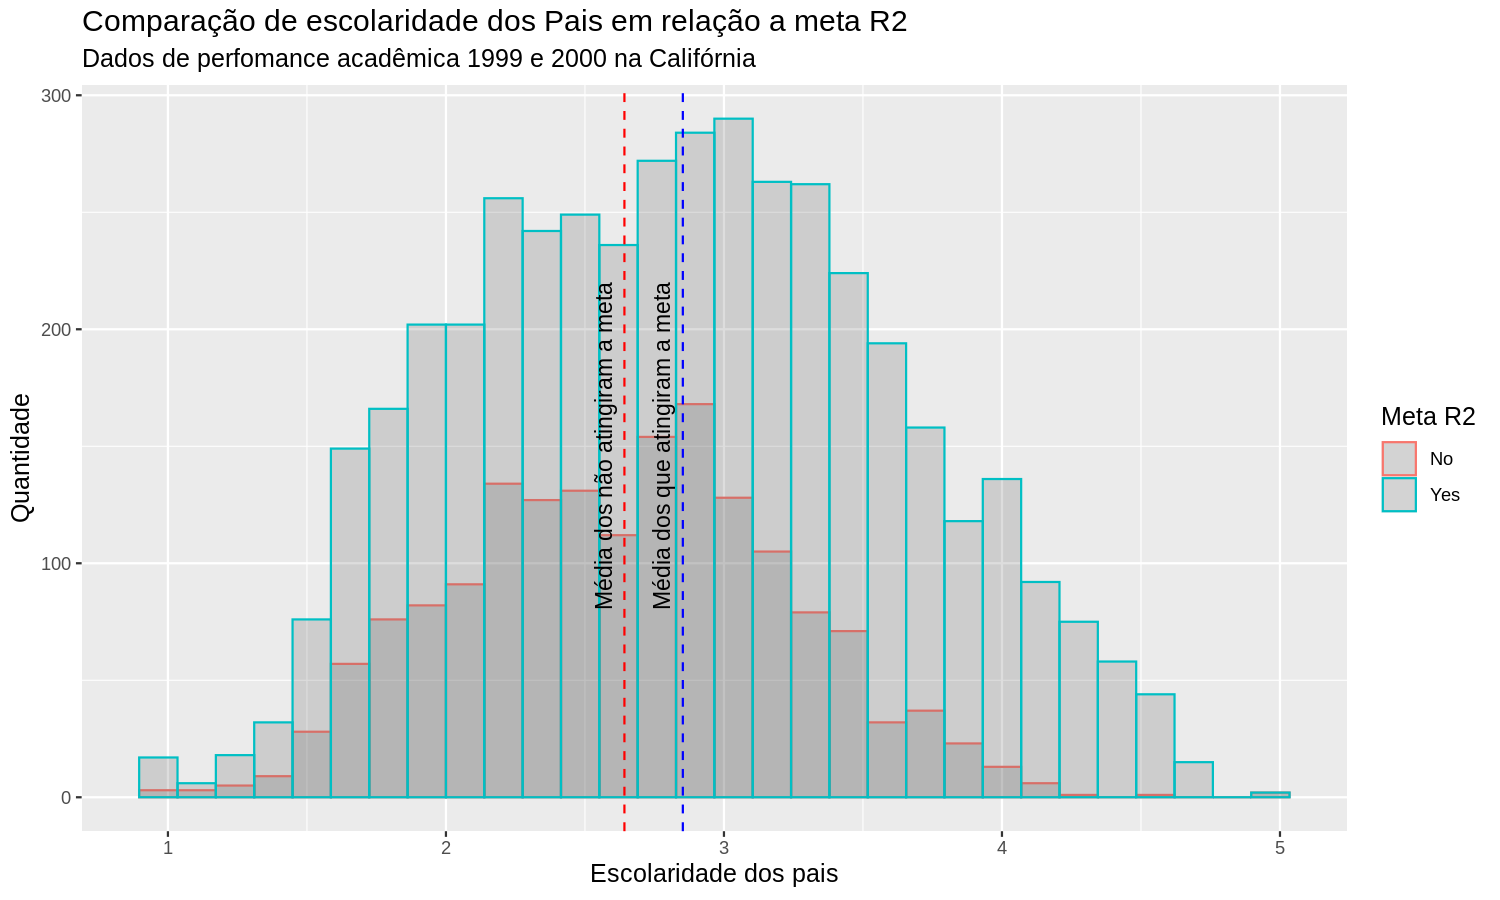

In [ ]:
# Criando a média da educação dos pais nas escolas que bateram e não bateram a
# eta R2
med_edu_yes <- df %>% filter(df$meta_r2 == 'Yes')
med_edu_yes <- mean(med_edu_yes$edu,na.rm = T)
med_edu_no <- df %>% filter(df$meta_r2 == 'No')
med_edu_no <- mean(med_edu_no$edu,na.rm = T)

# Criando hitograma
bateram_meta <- df %>%
  ggplot(mapping = aes(x = df$edu,color=meta_r2)) +
    geom_histogram( alpha=0.2, position="identity") +
    geom_vline(xintercept =c(med_edu_yes,med_edu_no),
               color =c("blue","red"),
                linetype = "dashed")+ # Colocando retas verticais
    labs(
    title = "Comparação de escolaridade dos Pais em relação a meta R2",
    subtitle = "Dados de perfomance acadêmica 1999 e 2000 na Califórnia",
    y = "Quantidade",
    x = "Escolaridade dos pais",
    color="Meta R2"
    ) +
    theme(title = element_text(size = 12)) +
        annotate(
          "text",
          x = c(med_edu_yes-0.075,med_edu_no-0.075)  ,
          y=150,
          label=c("Média dos que atingiram a meta","Média dos não atingiram a meta"),
          angle=90
    )
print(bateram_meta)

Com a meta R2, percebemos o mesmo padrão do gráfico anterior, média de escolaridade menor para escolas que não atingirão a meta e pouca quantidade de escola com média de escolaridade acima de 4(Ensino superior completo).

Por fim, vamos avaliar a meta RS.

Warning message:
“Use of `df$edu` is discouraged.
ℹ Use `edu` instead.”
`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.
Warning message:
“Removed 178 rows containing non-finite values (`stat_bin()`).”


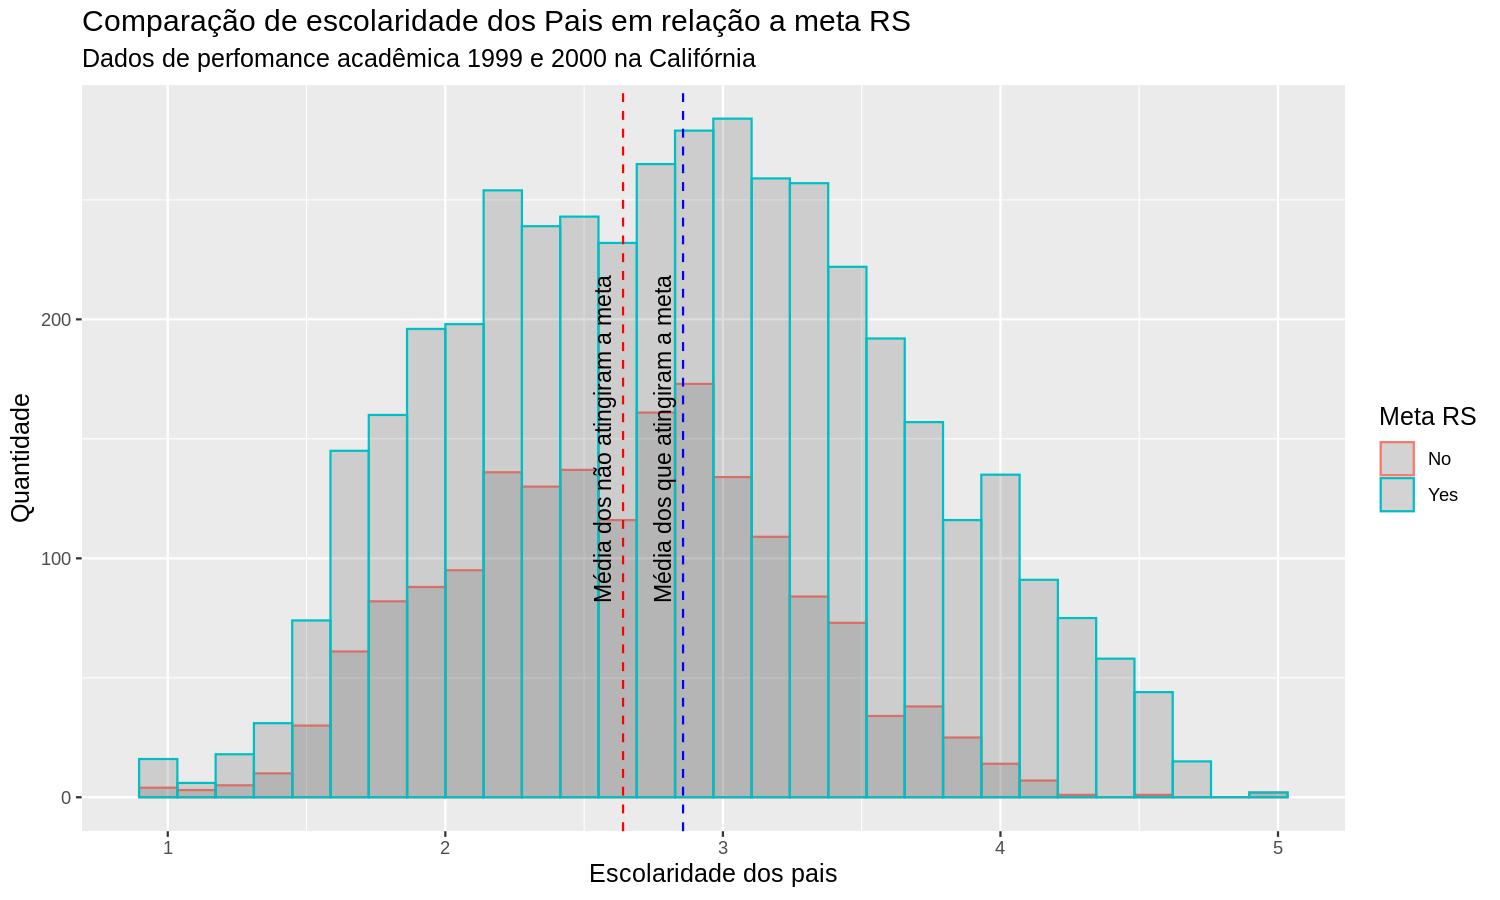

In [ ]:
# Criando a média da educação dos pais nas escolas que bateram e não bateram a
# Meta RS
med_edu_yes <- df %>% filter(df$meta_rs == 'Yes')
med_edu_yes <- mean(med_edu_yes$edu,na.rm = T)
med_edu_no <- df %>% filter(df$meta_rs == 'No')
med_edu_no <- mean(med_edu_no$edu,na.rm = T)

# Criando hitograma
bateram_meta <- df %>%
  ggplot(mapping = aes(x = df$edu,color=meta_rs)) +
    geom_histogram( alpha=0.2, position="identity") +
    geom_vline(xintercept =c(med_edu_yes,med_edu_no),
                            color =c("blue","red"),
                            linetype = "dashed")+ # Colocando retas verticais
    labs(
    title = "Comparação de escolaridade dos Pais em relação a meta RS",
    subtitle = "Dados de perfomance acadêmica 1999 e 2000 na Califórnia",
    y = "Quantidade",
    x = "Escolaridade dos pais",
    color="Meta RS"
    ) +
    theme(title = element_text(size = 12)) +
        annotate(
          "text",
          x = c(med_edu_yes-0.075,med_edu_no-0.075)  ,
          y=150,
          label=c("Média dos que atingiram a meta","Média dos não atingiram a meta"),
          angle=90
    )
print(bateram_meta)

Novamente percebemos os mesmo padrões estalecido nos dois últimos gráficos. Assim temos que o grau de escolaridade possui certa influência positiva no resultado de bater a meta. Porém a escolaridade possui relação sócio econômica? Vejamos no gráfico abaixo.

Warning message:
“Removed 178 rows containing non-finite values (`stat_smooth()`).”
Warning message:
“Removed 178 rows containing missing values (`geom_point()`).”
Warning message:
“Removed 23 rows containing missing values (`geom_smooth()`).”


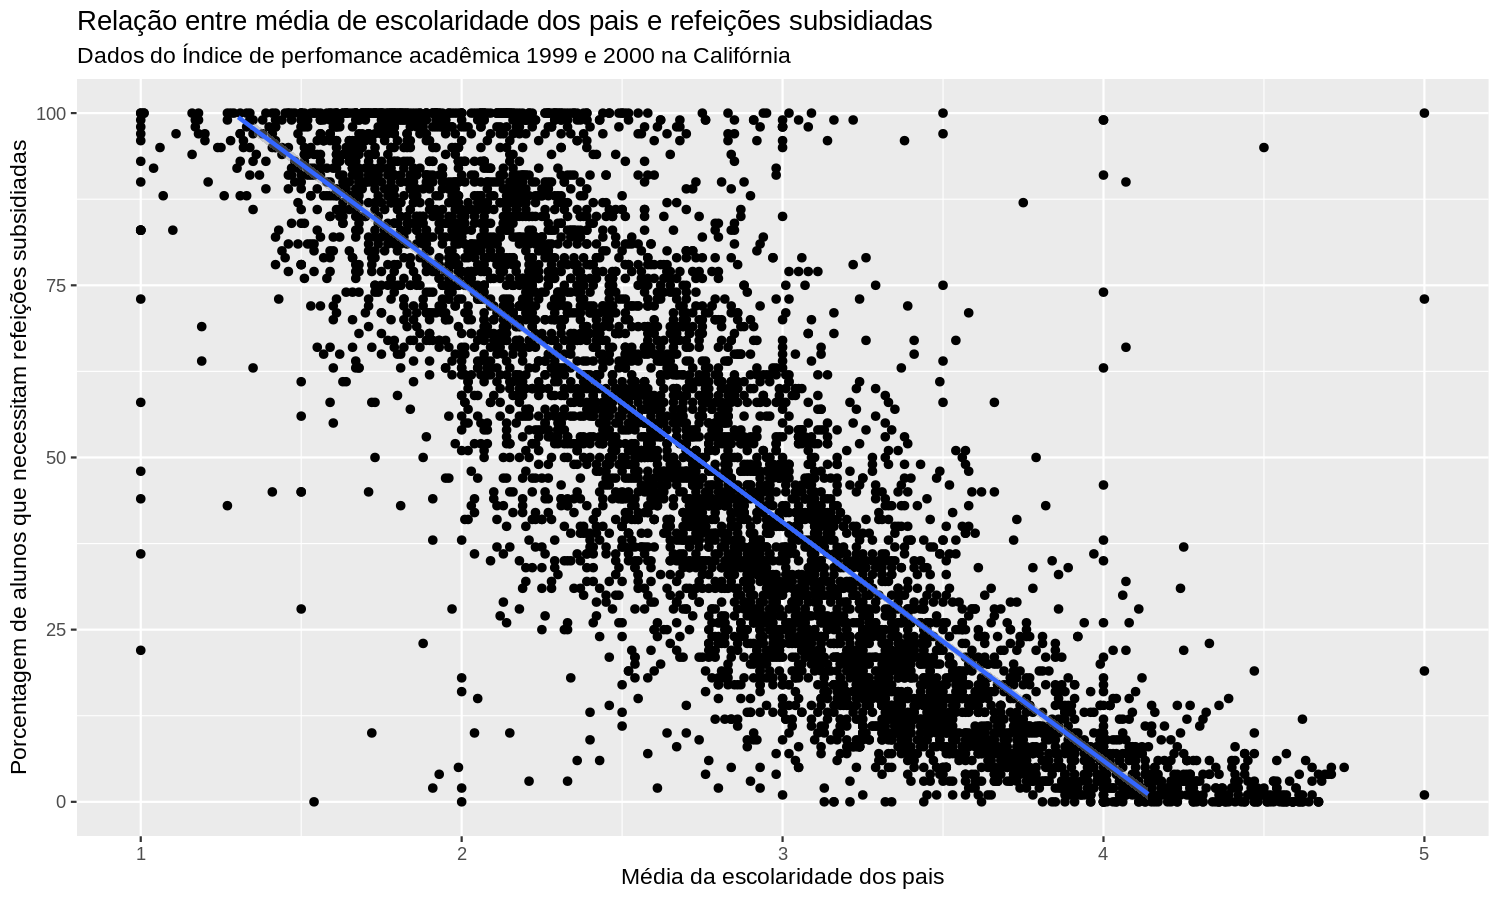

In [ ]:
df %>% ggplot(mapping = aes(x=edu,refs)) +
  geom_point() +
  geom_smooth(method = "lm", formula = y ~ x) +
  labs(
  title = "Relação entre média de escolaridade dos pais e refeições subsidiadas",
  subtitle = "Dados do Índice de perfomance acadêmica 1999 e 2000 na Califórnia",
  x = "Média da escolaridade dos pais",
  y = "Porcentagem de alunos que necessitam refeições subsidiadas"
  ) +
  ylim(0, 100)


Com a finalidade de se comprovar que quanto maior o grau de escolaridade maior é o a renda, fizemos a relação entre média dos estudos dos pais e porcentagem de alunos com refeição subsidiada.

Percebe-se que quanto maior é a média da escolaridade menor é a quantidade de alunos com necessidade de ter alimentação subsidiada, corroborando a hipótese anterior.

<h3>Conclusão da seção</h3>

---

Com isso, análise revela uma correlação interessante entre a escolaridade dos pais e a quantidade de alunos com alimentação subsidiada. Indica que pais com maior escolaridade tendem a ter uma situação financeira mais estável.

Além disso, observa-se uma relação positiva entre a escolaridade dos pais e o alcance das metas estabelecidas, sugerindo que um ambiente familiar com maior nível educacional pode influenciar positivamente o desempenho acadêmico dos alunos. Esses achados ressaltam a importância do apoio e envolvimento dos pais na educação de seus filhos, destacando o potencial impacto positivo de medidas que promovam a educação familiar e o acesso equitativo à educação.

---

## 2.3 Refeição Subsidiada

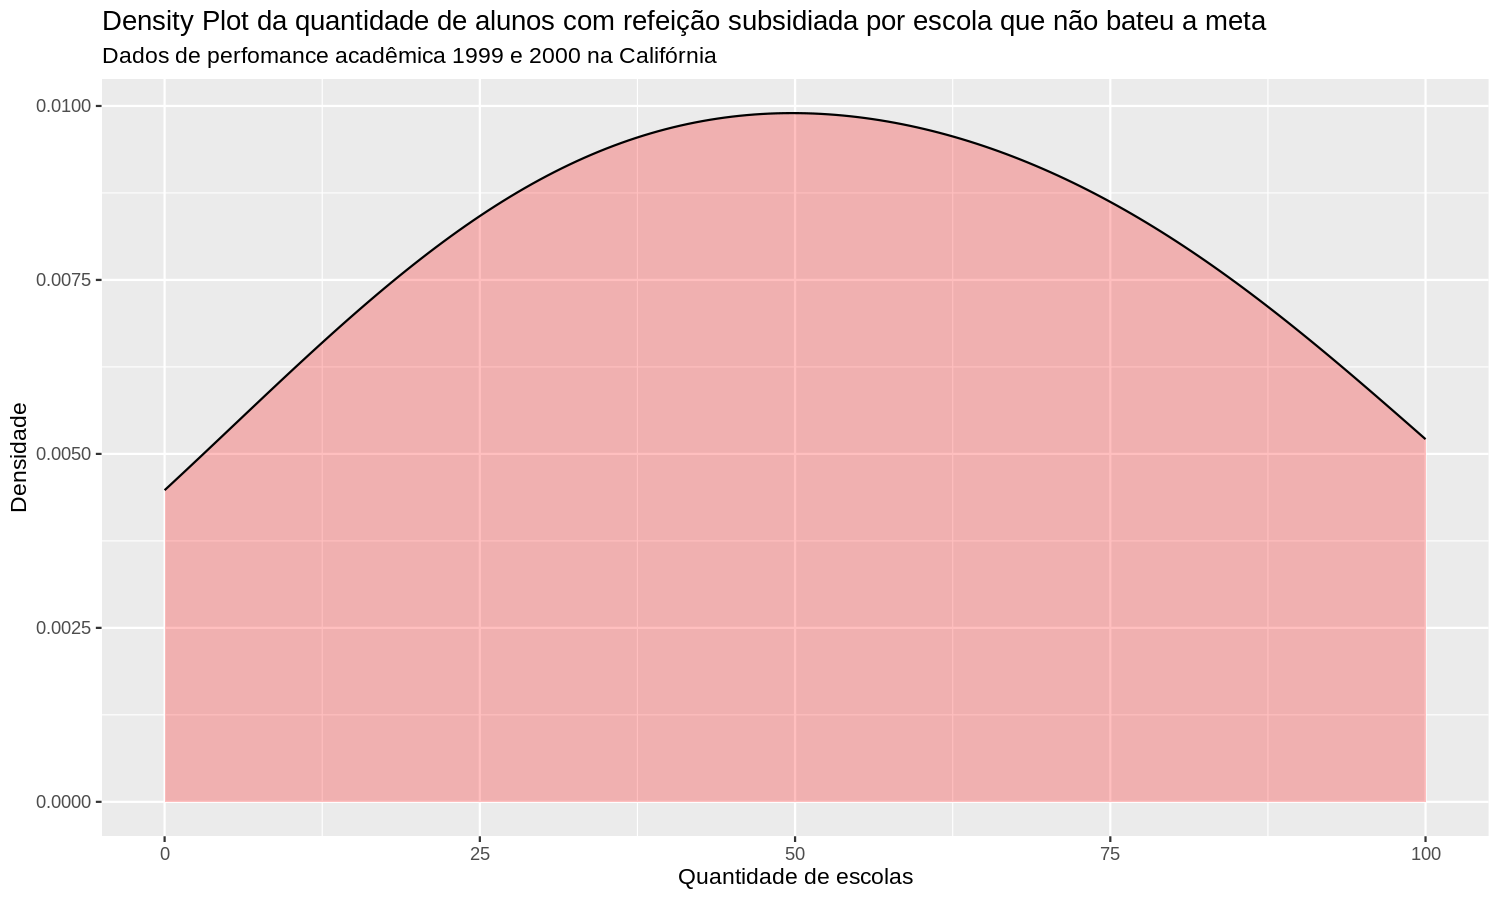

In [ ]:
#Quantidade de alunos com refeição subsidiada em escolas que não atingiram a meta
df_no_metars <-  dplyr::filter(df, meta_rs == "No")
bw <- 25

ggplot(
    data = df_no_metars,
    aes(x = refs)
    ) +
    geom_density(bw=bw, kernel = "gaussian", alpha = .25, fill = "red") +
    labs(
        title = "Density Plot da quantidade de alunos com refeição subsidiada por escola que não bateu a meta",
        subtitle = "Dados de perfomance acadêmica 1999 e 2000 na Califórnia",
        x = "Quantidade de escolas",
        y = "Densidade"
    )

O gráfico acima mostra a densidade dos alunos que possuem refeição subsidiada em que a escola não bateu a meta. Percebe-se uma concentração por volta de 50% de alunos com refeição subsidiada.

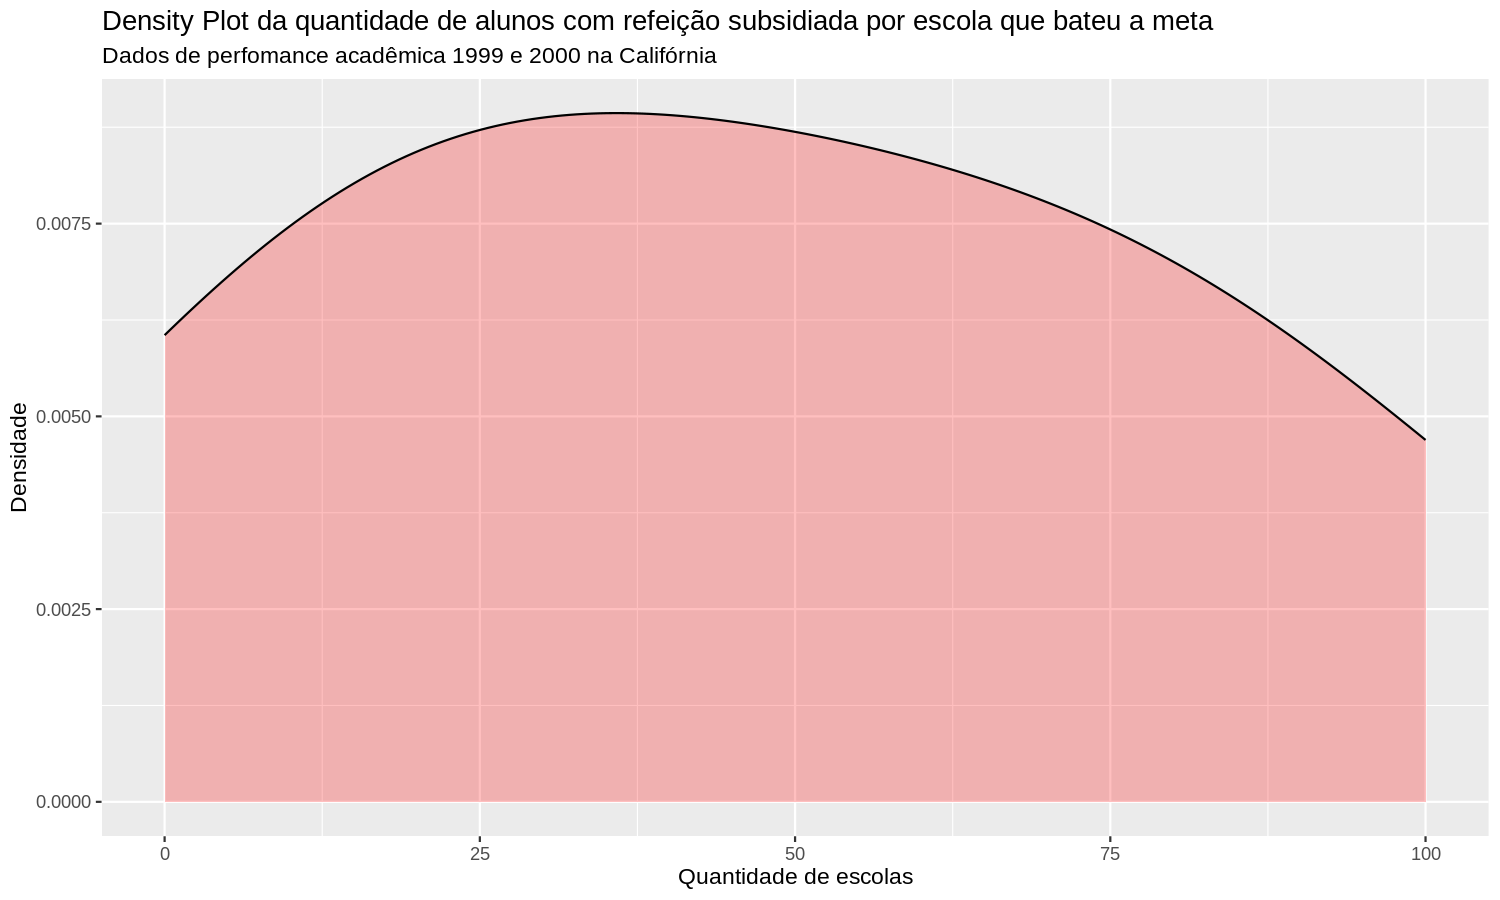

In [ ]:
#Quantidade de alunos com refeição subsidiada em escolas que atingiram a meta
df_no_metars <-  dplyr::filter(df, meta_rs == "Yes")
bw <- 25

ggplot(
    data = df_no_metars,
    aes(x = refs)
    ) +
    geom_density(bw=bw, kernel = "gaussian", alpha = .25, fill = "red") +
    labs(
        title = "Density Plot da quantidade de alunos com refeição subsidiada por escola que bateu a meta",
        subtitle = "Dados de perfomance acadêmica 1999 e 2000 na Califórnia",
        x = "Quantidade de escolas",
        y = "Densidade"
    )

No gráfico acima, temos o gráfico densidade dos alunos que possuem refeição subsidiada, porém este gráfico está filtrado pelas escolas que bateram a meta.

Se é visivel uma distribução mais suave e tendêndo mais para os 30%, dando indícios que as escolas que bateram a meta possuem menos alunos com auxília alimentação.

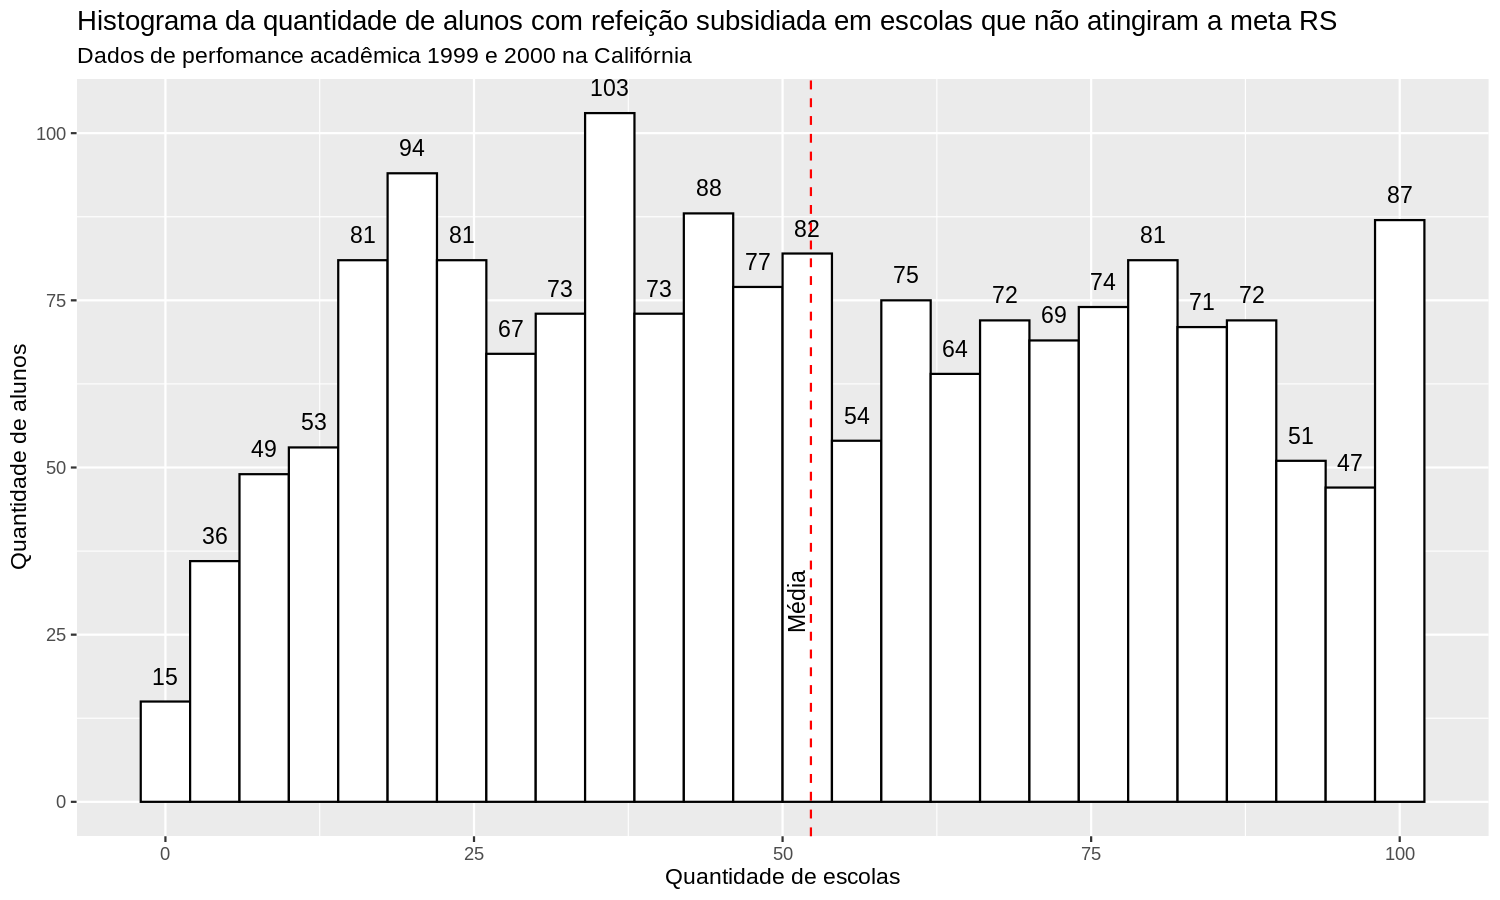

In [ ]:
#Quantidade de alunos com refeição subsidiada em escolas que não atingiram a meta
df_no_metars <-  dplyr::filter(df, meta_rs == "No")

bw <- 4
media <- mean(df_no_metars$refs)

ggplot(data = df_no_metars, aes(x = refs)) +
    # geom_histogram(bins = 15) +
    geom_histogram(binwidth = bw, fill = "#FFFFFF", colour = "#000000") +
    stat_bin(
        binwidth = bw,
        geom = "text",
        aes(label = after_stat(count)),
        vjust = -1
    )+
      geom_vline(xintercept = media, color ="red", linetype = "dashed")+
    labs(
        title = "Histograma da quantidade de alunos com refeição subsidiada em escolas que não atingiram a meta RS",
        subtitle = "Dados de perfomance acadêmica 1999 e 2000 na Califórnia",
        x = "Quantidade de escolas",
        y = "Quantidade de alunos"
    ) +
    annotate("text",
        x = media - 1.2,
        y=30,
        label="Média",
        angle=90)

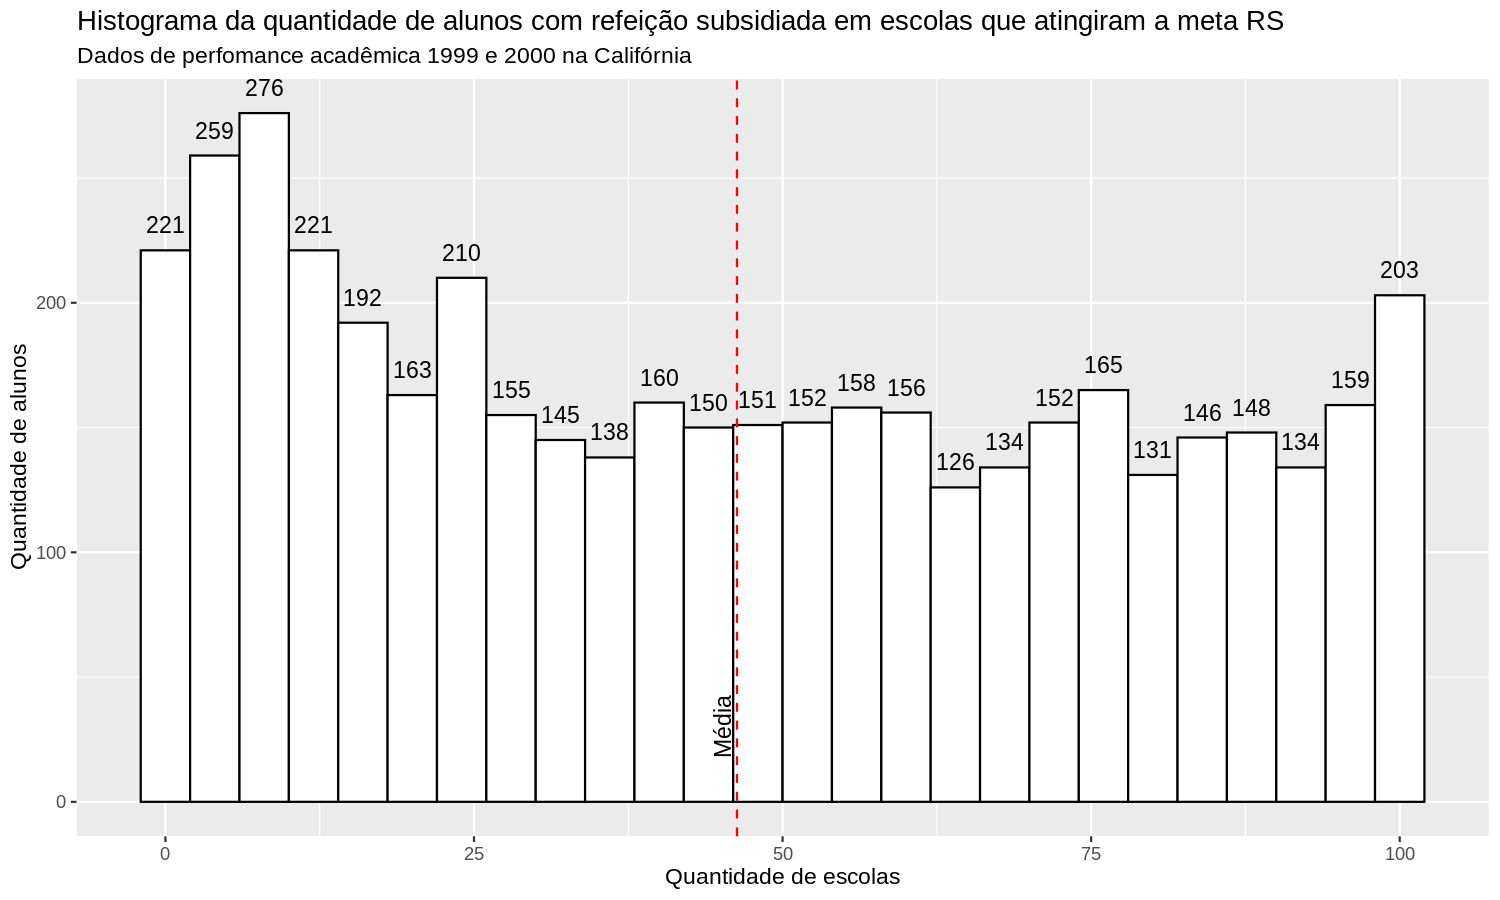

In [ ]:
#Quantidade de alunos com refeição subsidiada em escolas que não atingiram a meta
df_no_metars <-  dplyr::filter(df, meta_rs == "Yes")

bw <- 4
media <- mean(df_no_metars$refs)

ggplot(data = df_no_metars, aes(x = refs)) +
    # geom_histogram(bins = 15) +
    geom_histogram(binwidth = bw, fill = "#FFFFFF", colour = "#000000") +
    stat_bin(
        binwidth = bw,
        geom = "text",
        aes(label = after_stat(count)),
        vjust = -1
    )+
      geom_vline(xintercept = media, color ="red", linetype = "dashed")+
    labs(
        title = "Histograma da quantidade de alunos com refeição subsidiada em escolas que atingiram a meta RS",
        subtitle = "Dados de perfomance acadêmica 1999 e 2000 na Califórnia",
        x = "Quantidade de escolas",
        y = "Quantidade de alunos"
    ) +
    annotate("text",
        x = media - 1.2,
        y=30,
        label="Média",
        angle=90)

Já com o histograma se torma mais visível a concentração dos alunos.

No primeiro histograma(Meta não foi batida) tem-se que a uma concentração maior por volta dos 50%, sendo a maior frequência próximo aos 30%.

Porém no segundo histograma(Meta foi batida) é observado uma boa concentração por volta de 0 a 25%, tendo a maior frequência de ocorrência por volta do 10%. Assim é notório uma menor ocorrência de alunos com refeição subsidiada em escolas que atingiram a meta.

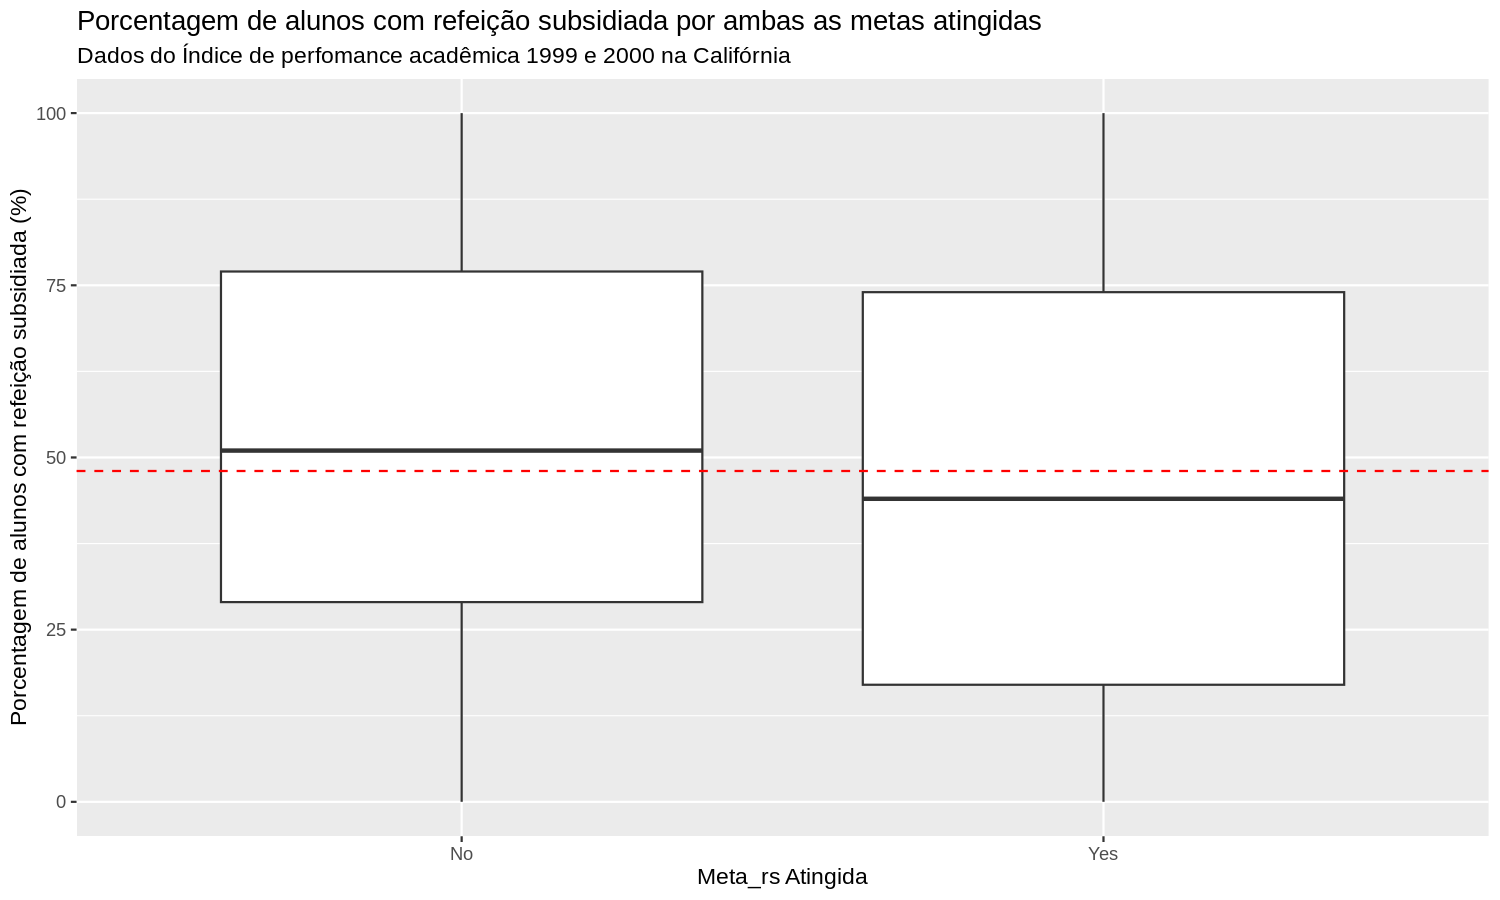

In [ ]:
media_ref <- mean(df$refs)
ggplot(data = df,mapping =  aes(x = meta_rs, y = refs)) +
    geom_boxplot() +
    geom_hline(yintercept = media_ref, color = "red", linetype = "dashed") +
    labs(
        title = "Porcentagem de alunos com refeição subsidiada por ambas as metas atingidas",
        subtitle = "Dados do Índice de perfomance acadêmica 1999 e 2000 na Califórnia",
        x = "Meta_rs Atingida",
        y = "Porcentagem de alunos com refeição subsidiada (%)"
    )

A maioria das escolas que atingiram ambas as metas, são compostas por uma porcentagem menor de alunos com refeição subsidiada.

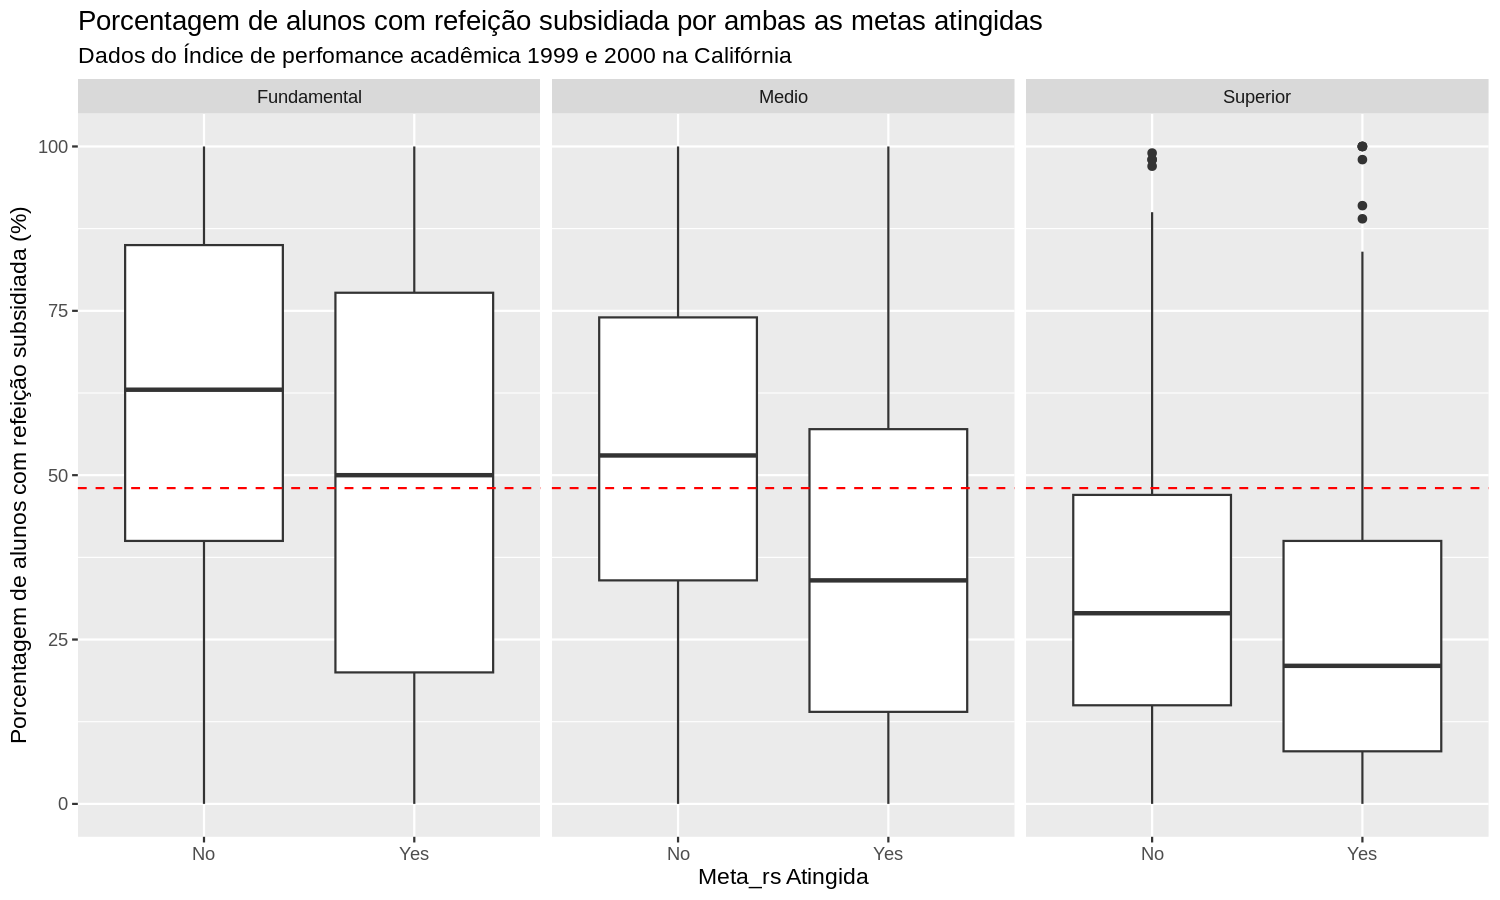

In [ ]:
ggplot(data = df, aes(x = meta_rs, y = refs)) +
    geom_boxplot() +
    geom_hline(yintercept = media_ref, color = "red", linetype = "dashed") +
    facet_wrap(~tipo) +
    labs(
        title = "Porcentagem de alunos com refeição subsidiada por ambas as metas atingidas",
        subtitle = "Dados do Índice de perfomance acadêmica 1999 e 2000 na Califórnia",
        x = "Meta_rs Atingida",
        y = "Porcentagem de alunos com refeição subsidiada (%)"
    )

Quando analisamos os dados separados por nível de ensino, a conclusão é a mesma: a maioria das escolas que atingiram ambas as metas, são compostas por uma porcentagem menor de alunos com refeição subsidiada.

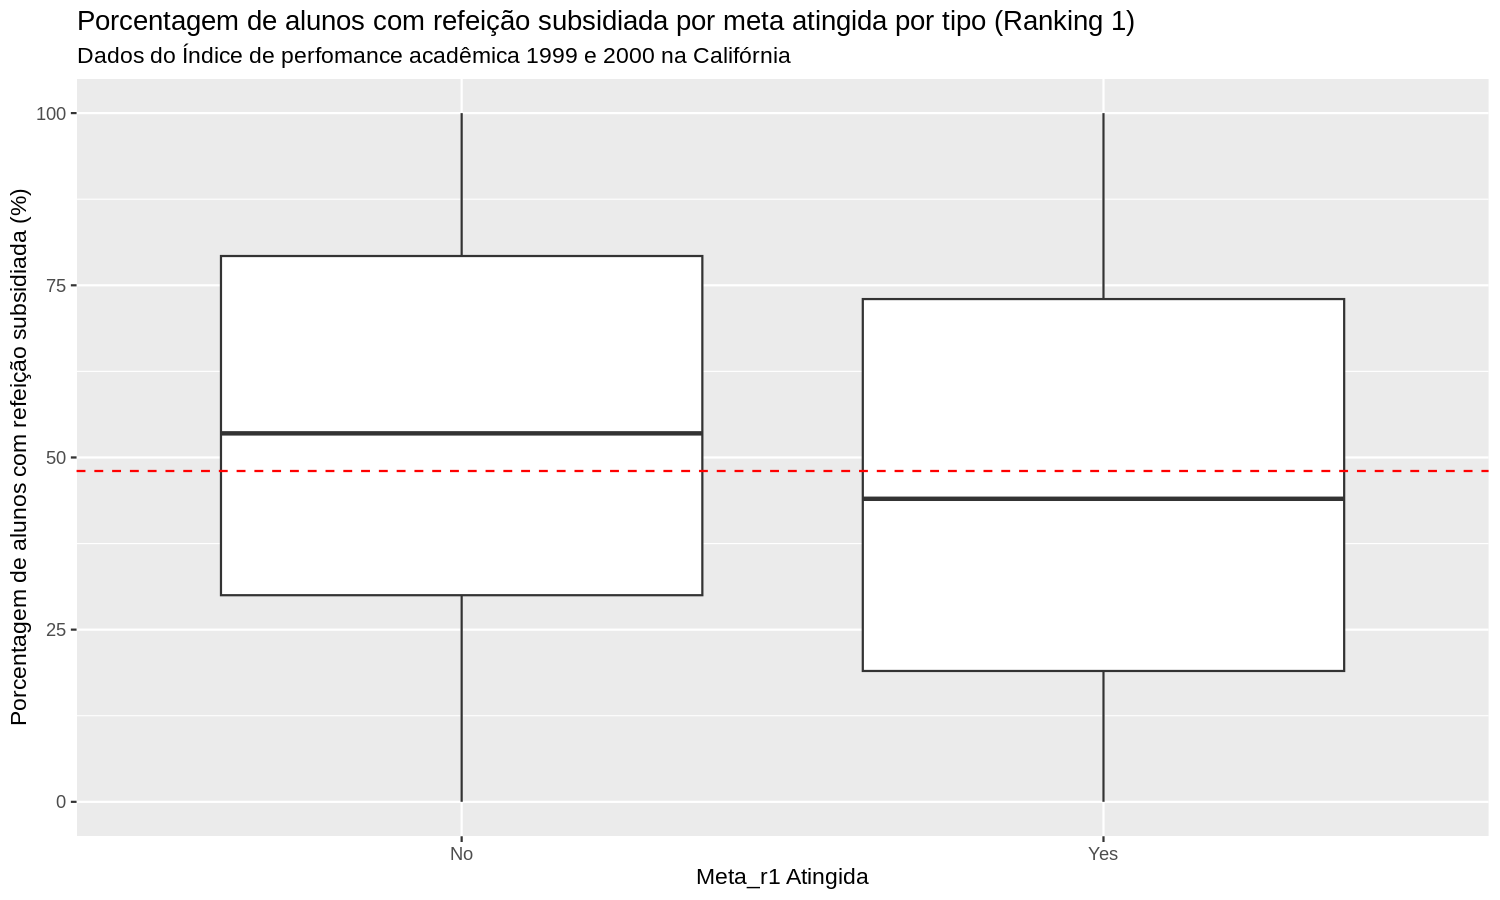

In [ ]:
ggplot(data = df, aes(x = meta_r1, y = refs)) +
    geom_boxplot() +
    geom_hline(yintercept = media_ref, color = "red", linetype = "dashed") +
    labs(
        title = "Porcentagem de alunos com refeição subsidiada por meta atingida por tipo (Ranking 1)",
        subtitle = "Dados do Índice de perfomance acadêmica 1999 e 2000 na Califórnia",
        x = "Meta_r1 Atingida",
        y = "Porcentagem de alunos com refeição subsidiada (%)"
    )

A maioria das escolas que atingiram a meta do Ranking 1, são compostas por uma porcentagem menor de alunos com refeição subsidiada.

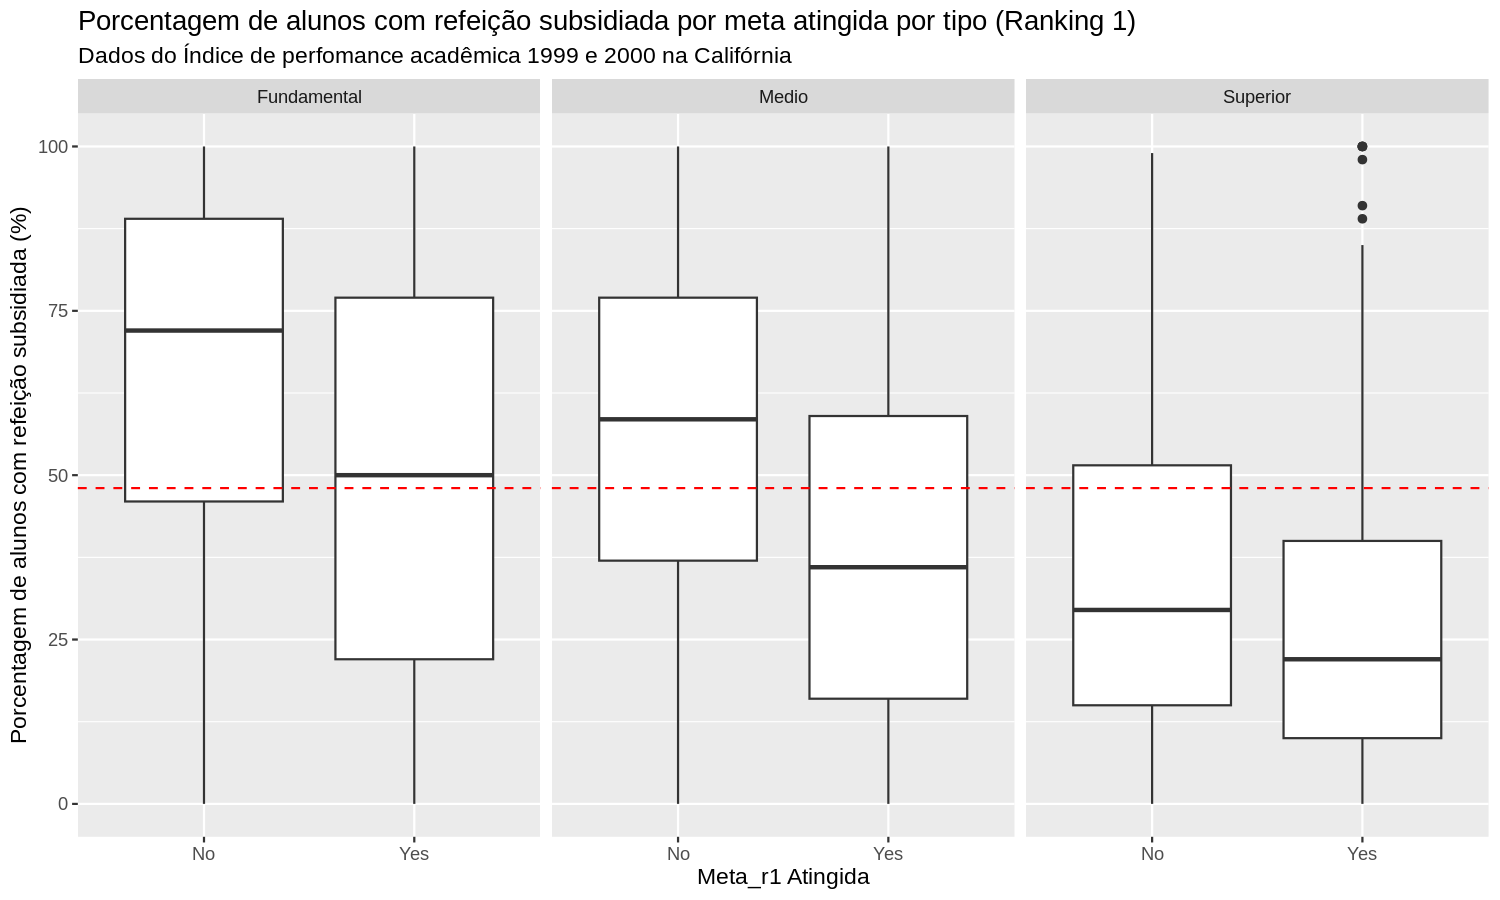

In [ ]:
ggplot(data = df, aes(x = meta_r1, y = refs)) +
    geom_boxplot() +
    facet_wrap(~tipo) +
    geom_hline(yintercept = media_ref, color = "red", linetype = "dashed") +
    labs(
        title = "Porcentagem de alunos com refeição subsidiada por meta atingida por tipo (Ranking 1)",
        subtitle = "Dados do Índice de perfomance acadêmica 1999 e 2000 na Califórnia",
        x = "Meta_r1 Atingida",
        y = "Porcentagem de alunos com refeição subsidiada (%)"
    )

Quando analisamos os dados separados por nível de ensino, a conclusão é a mesma: a maioria das escolas que atingiram a meta do Ranking 1, são compostas por uma porcentagem menor de alunos com refeição subsidiada.

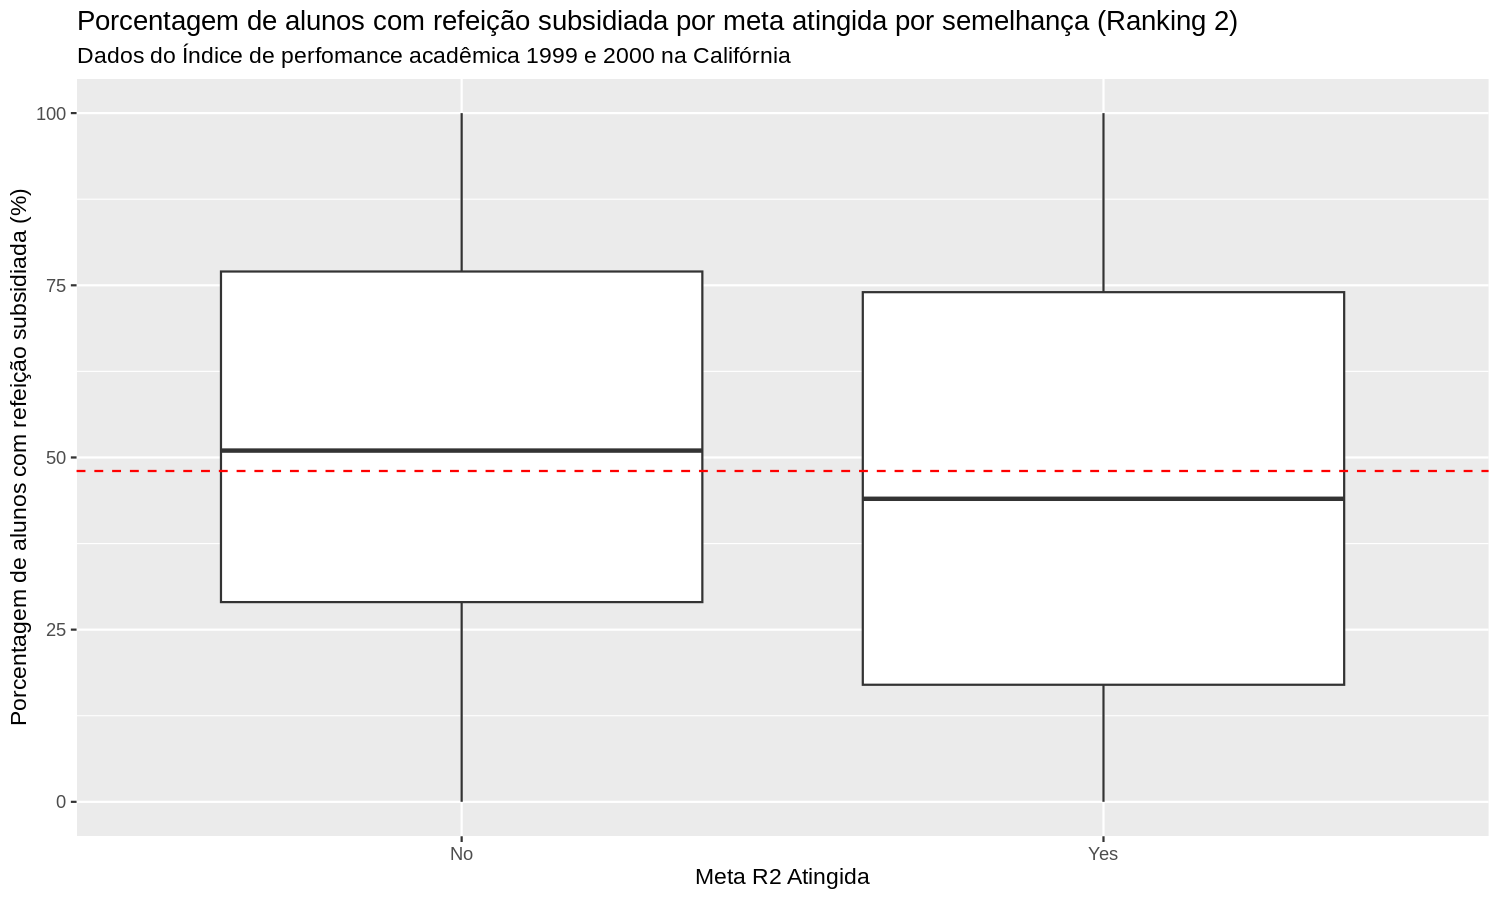

In [ ]:
ggplot(data = df, aes(x = meta_r2, y = refs)) +
    geom_boxplot() +
    geom_hline(yintercept = media_ref, color = "red", linetype = "dashed") +
    labs(
        title = "Porcentagem de alunos com refeição subsidiada por meta atingida por semelhança (Ranking 2)",
        subtitle = "Dados do Índice de perfomance acadêmica 1999 e 2000 na Califórnia",
        x = "Meta R2 Atingida",
        y = "Porcentagem de alunos com refeição subsidiada (%)"
    )

A maioria das escolas que atingiram a meta do Ranking 2, são compostas por uma porcentagem menor de alunos com refeição subsidiada.

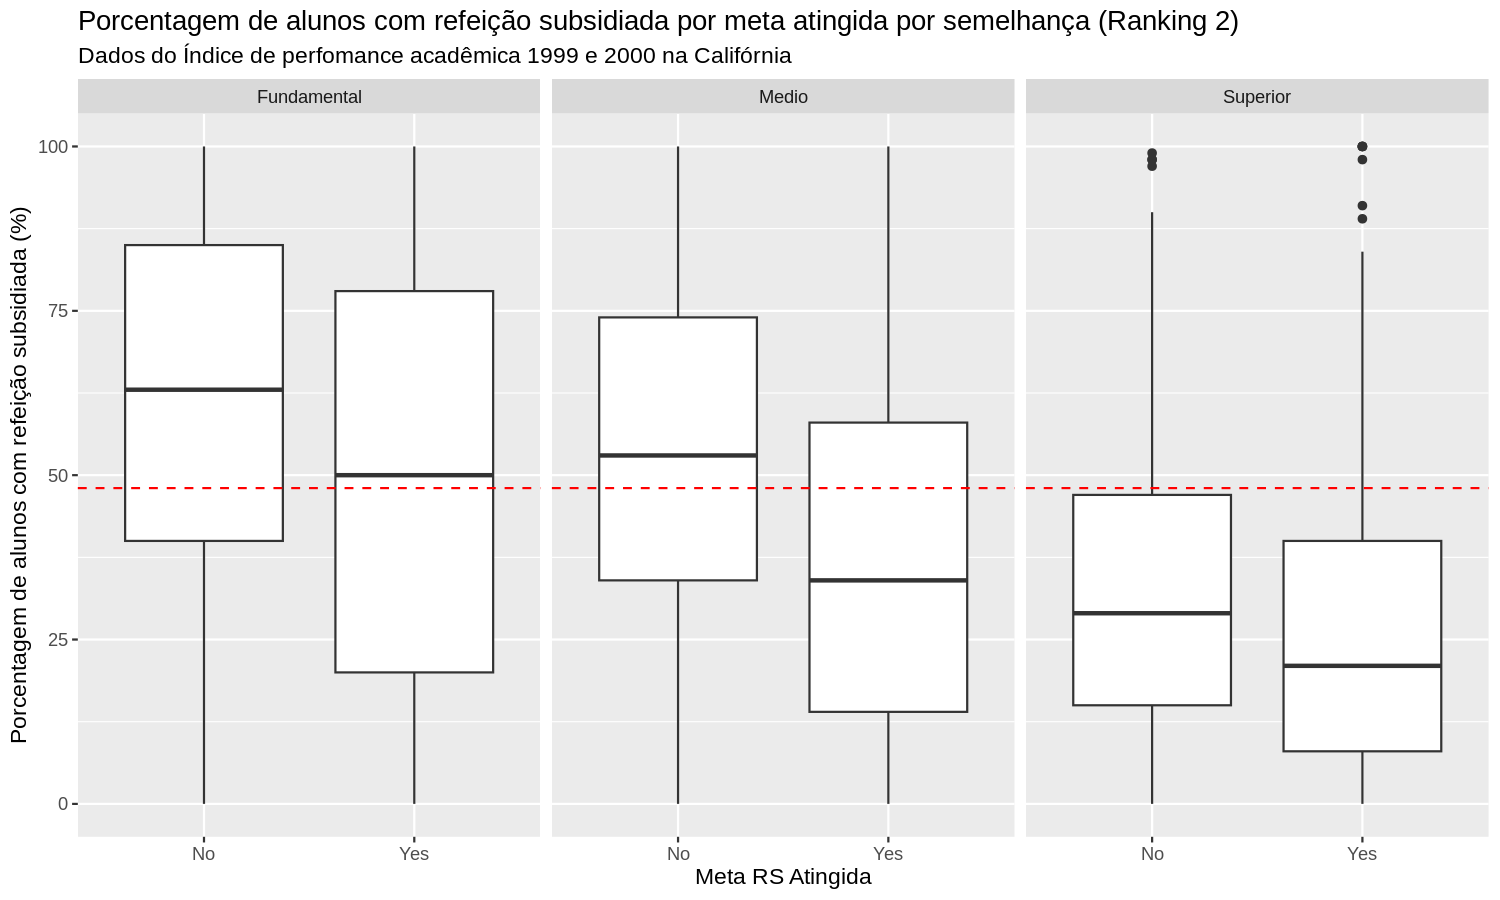

In [ ]:
ggplot(data = df, aes(x = meta_r2, y = refs)) +
    geom_boxplot() +
    facet_wrap(~tipo) +
    geom_hline(yintercept = media_ref, color = "red", linetype = "dashed") +
    labs(
        title = "Porcentagem de alunos com refeição subsidiada por meta atingida por semelhança (Ranking 2)",
        subtitle = "Dados do Índice de perfomance acadêmica 1999 e 2000 na Califórnia",
        x = "Meta RS Atingida",
        y = "Porcentagem de alunos com refeição subsidiada (%)"
    )

<h3> Conclusão da seção </h3>

---


Quando analisamos os dados separados por nível de ensino, a conclusão é a mesma: a maioria das escolas que atingiram a meta do Ranking 2, são compostas por uma porcentagem menor de alunos com refeição subsidiada.

Logo, supondo que refeição subsidiada pela escola indica baixa condição financeira dos alunos, vemos que a realidade socioeconômica individual afeta diretamente o desempenho das escolas.


---




## 2.4 Proficiência em Inglês

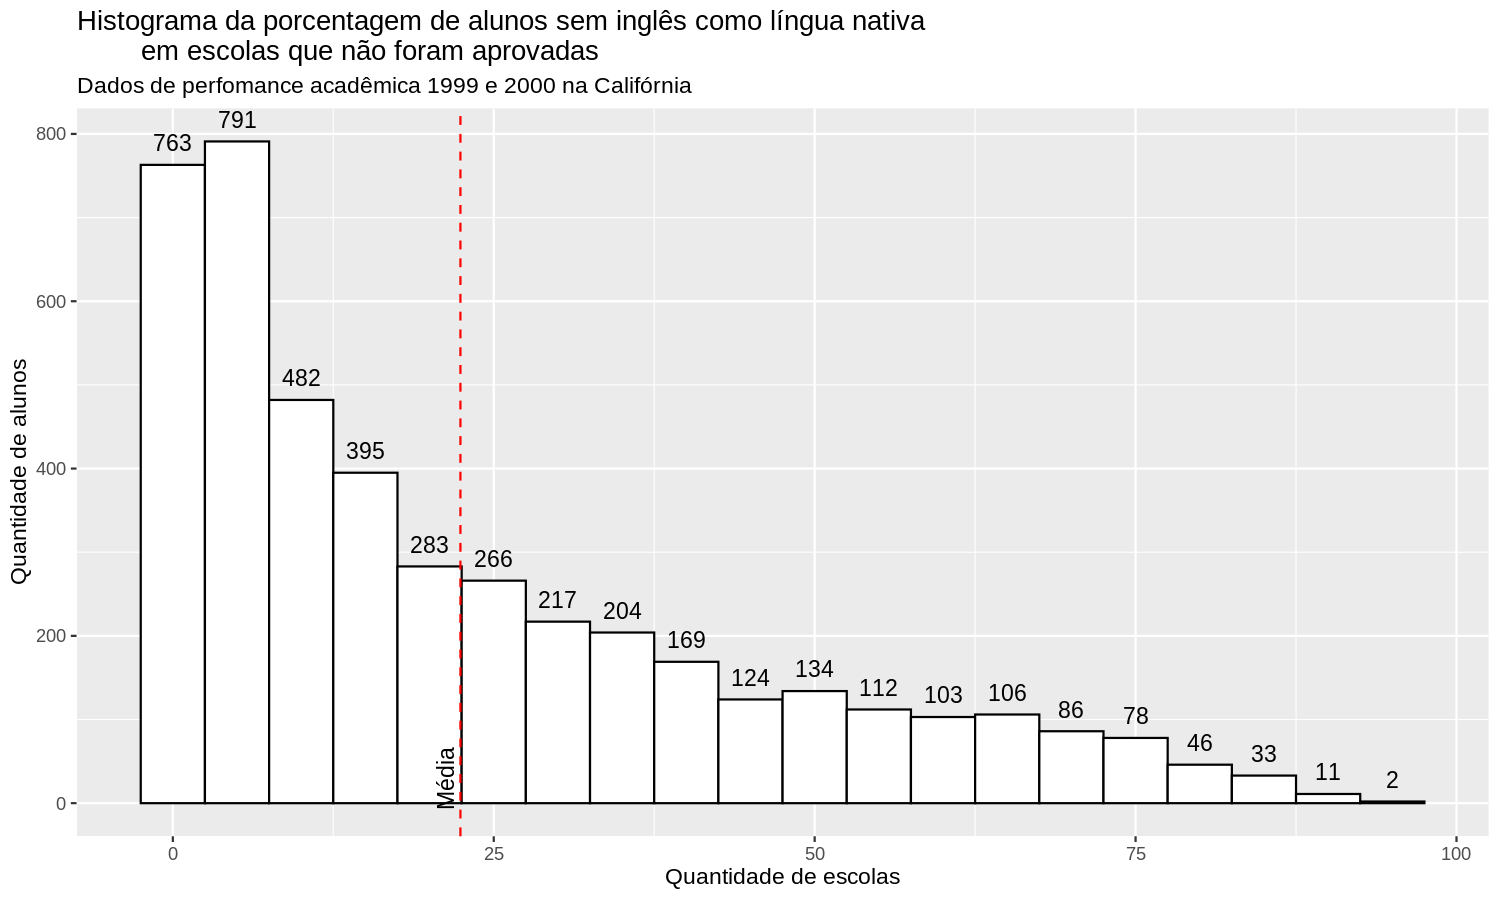

In [ ]:
#Porcentagem de alunos sem ingles como lingua nativa em escolas que não atingiram a meta

bw <- 5
media <- mean(df_no_metars$npi)

ggplot(data = df_no_metars, aes(x = npi)) +
    # geom_histogram(bins = 15) +
    geom_histogram(binwidth = bw, fill = "#FFFFFF", colour = "#000000") +
    stat_bin(
        binwidth = bw,
        geom = "text",
        aes(label = after_stat(count)),
        vjust = -0.8
    )+
      geom_vline(xintercept = media, color ="red", linetype = "dashed")+
    labs(
        title = "Histograma da porcentagem de alunos sem inglês como língua nativa
        em escolas que não foram aprovadas",
        subtitle = "Dados de perfomance acadêmica 1999 e 2000 na Califórnia",
        x = "Quantidade de escolas",
        y = "Quantidade de alunos"
    ) +
    annotate("text",
        x = media - 1.2,
        y=30,
        label="Média",
        angle=90)

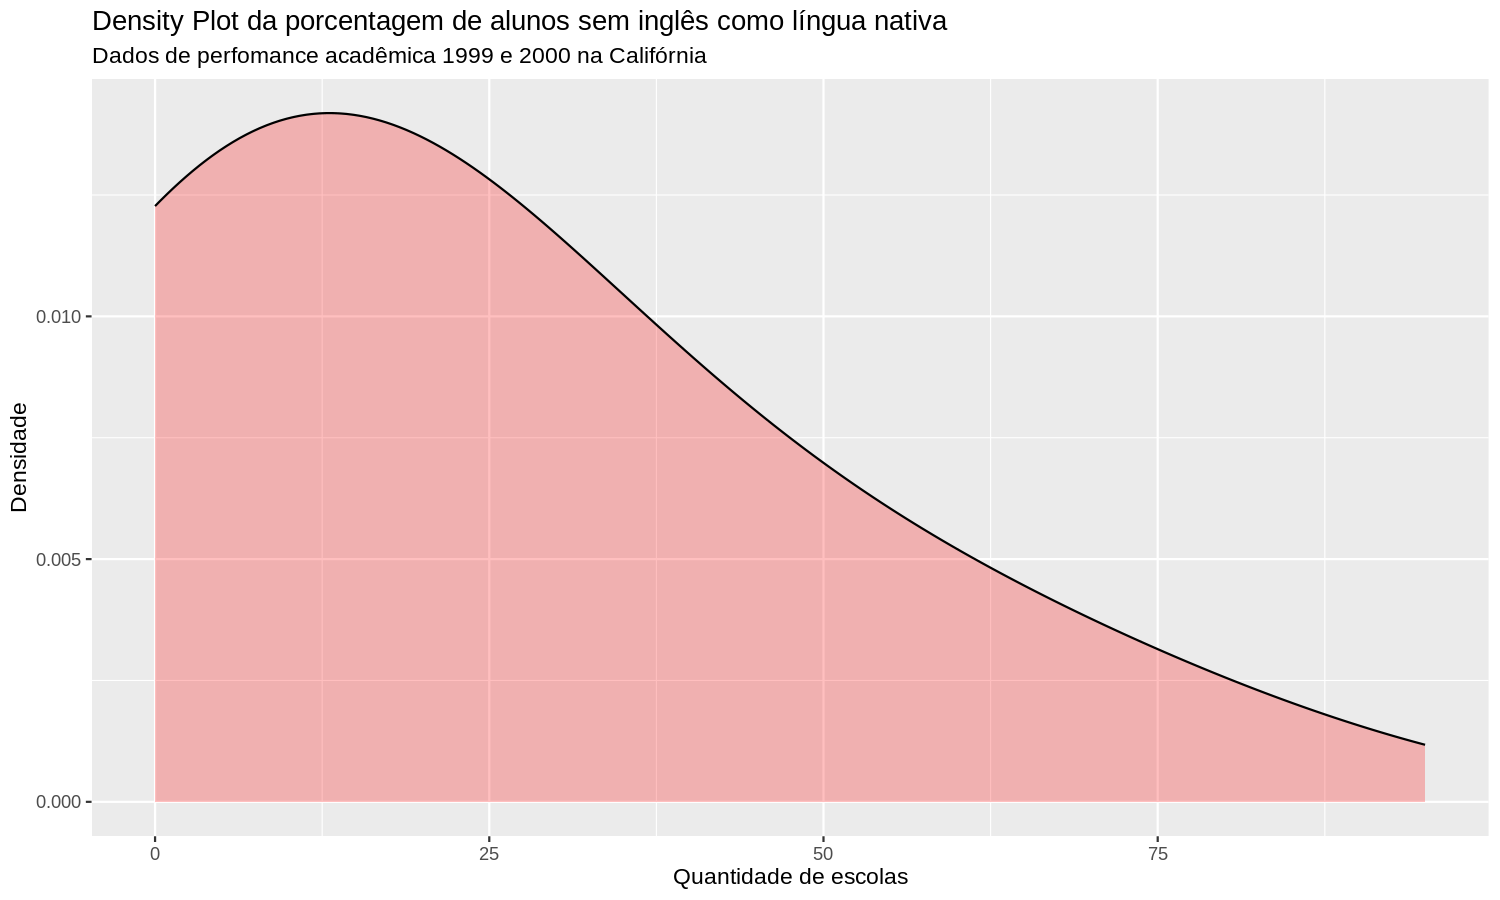

In [ ]:
bw <- 20

ggplot(
    data = df_no_metars,
    aes(x = npi)
    ) +
    geom_density(bw=bw, kernel = "gaussian", alpha = .25, fill = "red") +
    labs(
        title = "Density Plot da porcentagem de alunos sem inglês como língua nativa",
        subtitle = "Dados de perfomance acadêmica 1999 e 2000 na Califórnia",
        x = "Quantidade de escolas",
        y = "Densidade"
    )

Com base no histograma e no gráfico de densidade acima, conseguimos analisar que em média cerca de 20% dos alunos em boa parte dos casos não possuem proficiencia em inglês.

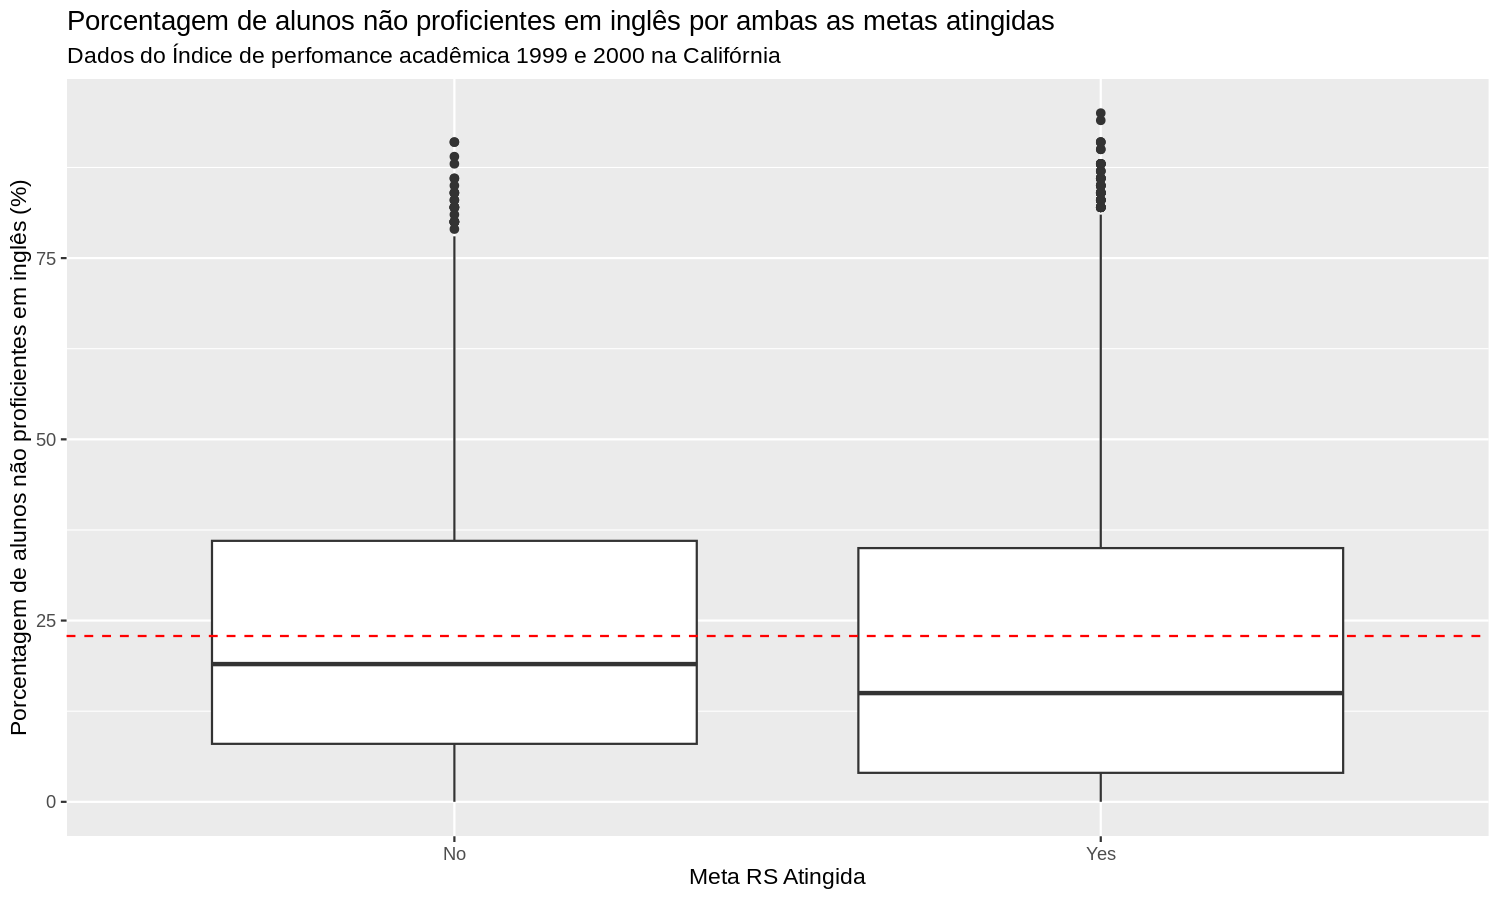

In [ ]:
media_npi <- mean(df$npi)
ggplot(data = df, aes(x = meta_rs, y = npi)) +
    geom_boxplot() +
    geom_hline(yintercept = media_npi, color = "red", linetype = "dashed") +
    labs(
        title = "Porcentagem de alunos não proficientes em inglês por ambas as metas atingidas",
        subtitle = "Dados do Índice de perfomance acadêmica 1999 e 2000 na Califórnia",
        x = "Meta RS Atingida",
        y = "Porcentagem de alunos não proficientes em inglês (%)"
    )

A maioria das escolas que atingiram ambas as metas, são compostas por uma porcentagem menor de alunos que não possuem proficiência em inglês.

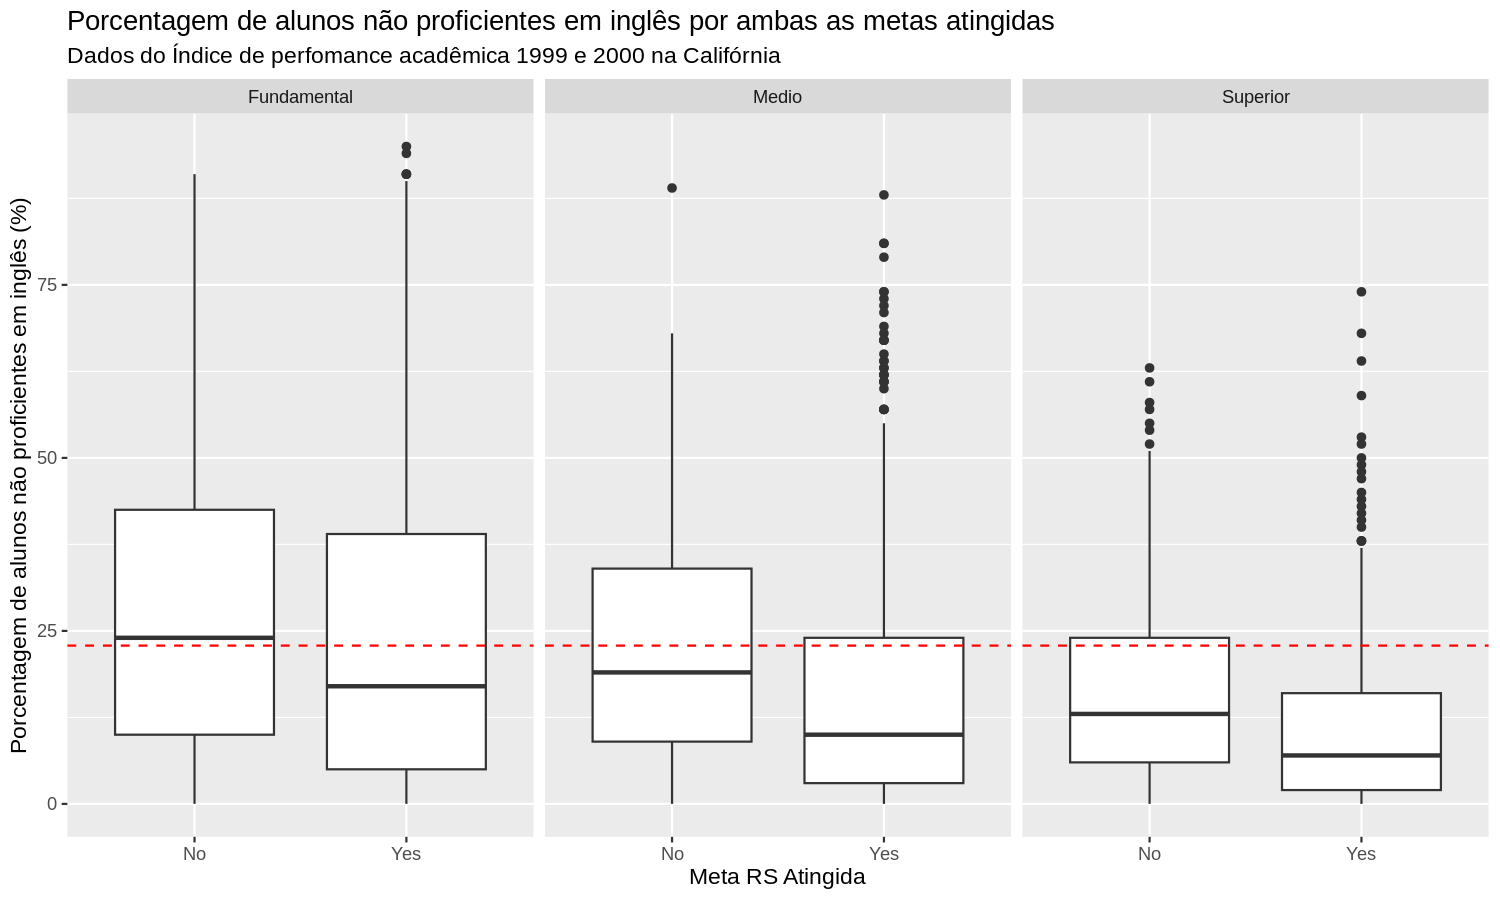

In [ ]:
ggplot(data = df, aes(x = meta_rs, y = npi)) +
    geom_boxplot() +
    geom_hline(yintercept = media_npi, color = "red", linetype = "dashed") +
    facet_wrap(~tipo) +
    labs(
        title = "Porcentagem de alunos não proficientes em inglês por ambas as metas atingidas",
        subtitle = "Dados do Índice de perfomance acadêmica 1999 e 2000 na Califórnia",
        x = "Meta RS Atingida",
        y = "Porcentagem de alunos não proficientes em inglês (%)"
    )

Quando analisamos os dados separados por nível de ensino, a conclusão é a mesma: a maioria das escolas que atingiram ambas as metas, são compostas por uma porcentagem menor de alunos que não possuem proficiência em inglês.

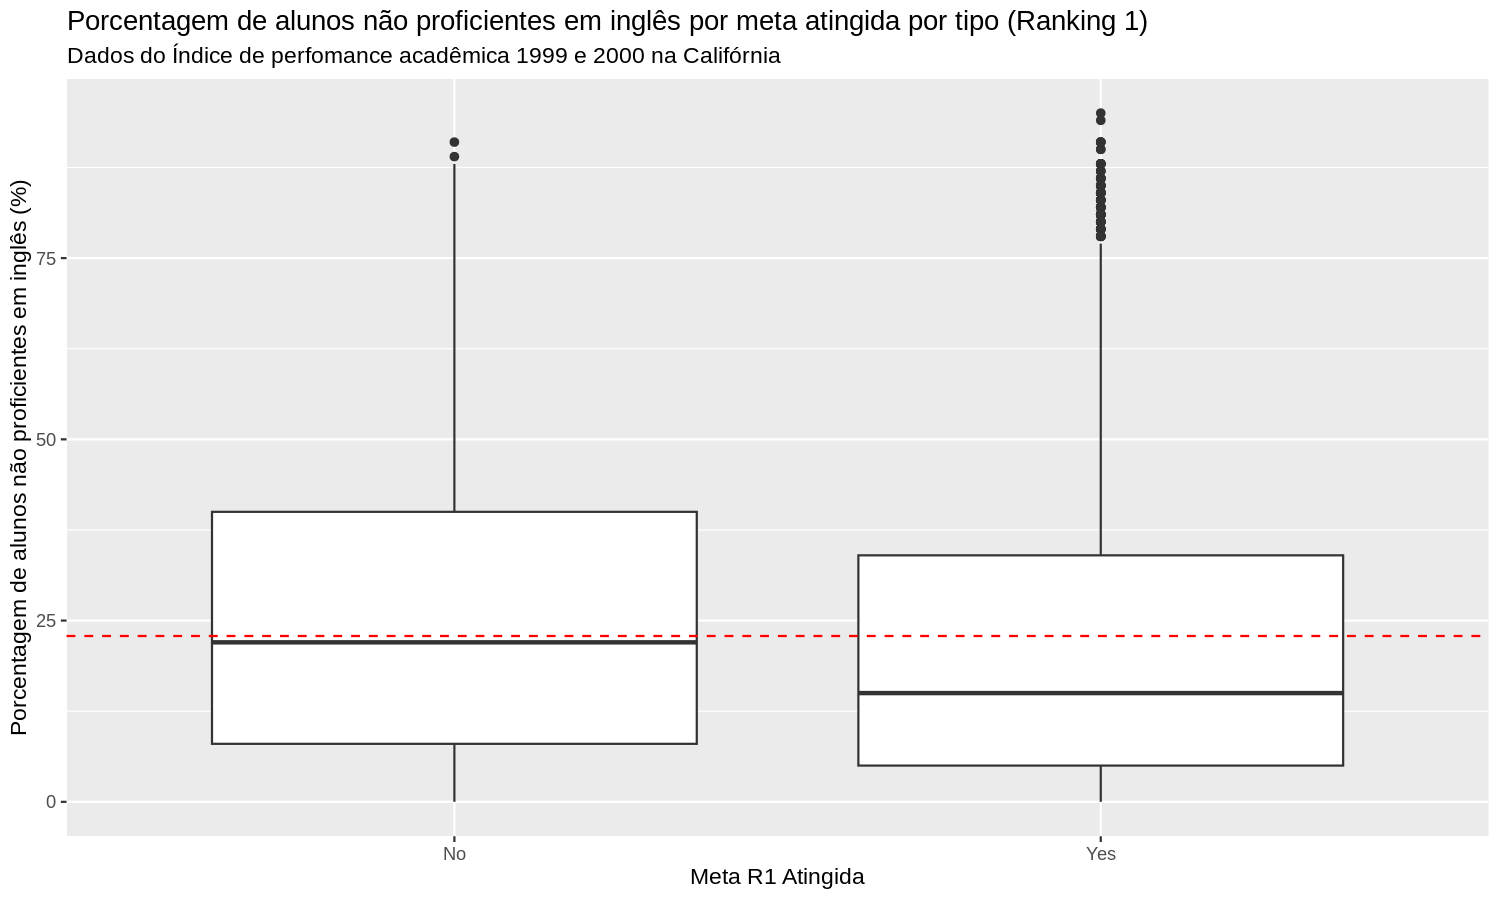

In [ ]:
ggplot(data = df, aes(x = meta_r1, y = npi)) +
    geom_boxplot() +
    geom_hline(yintercept = media_npi, color = "red", linetype = "dashed") +
    labs(
        title = "Porcentagem de alunos não proficientes em inglês por meta atingida por tipo (Ranking 1)",
        subtitle = "Dados do Índice de perfomance acadêmica 1999 e 2000 na Califórnia",
        x = "Meta R1 Atingida",
        y = "Porcentagem de alunos não proficientes em inglês (%)"
    )

A maioria das escolas que atingiram a meta do Ranking 1, são compostas por uma porcentagem menor de alunos que não possuem proficiência em inglês.

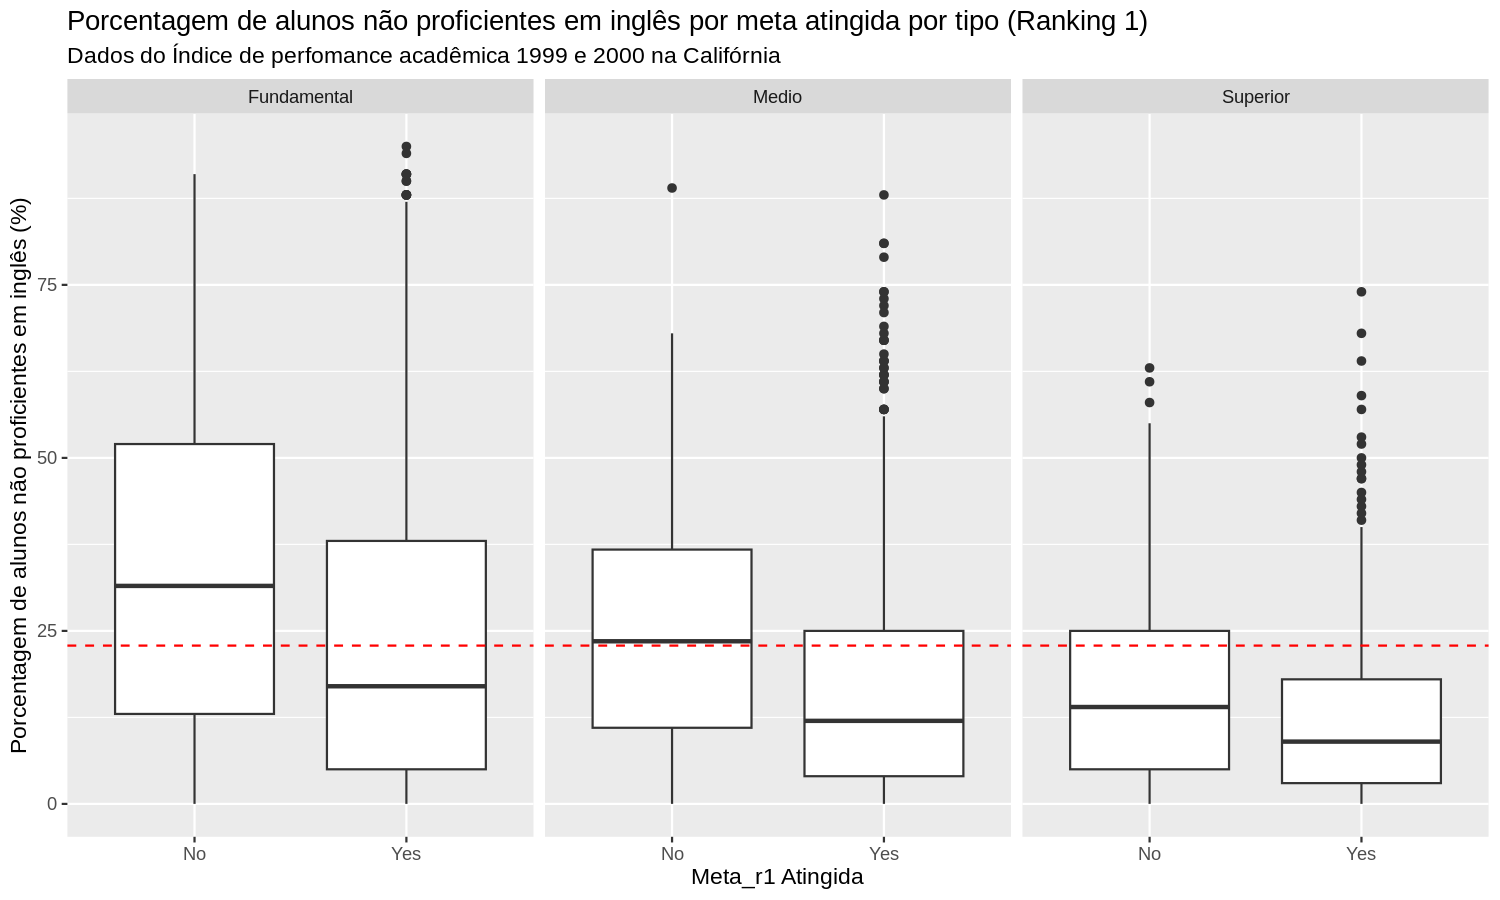

In [ ]:
ggplot(data = df, aes(x = meta_r1, y = npi)) +
    geom_boxplot() +
    geom_hline(yintercept = media_npi, color = "red", linetype = "dashed") +
    facet_wrap(~tipo) +
    labs(
        title = "Porcentagem de alunos não proficientes em inglês por meta atingida por tipo (Ranking 1)",
        subtitle = "Dados do Índice de perfomance acadêmica 1999 e 2000 na Califórnia",
        x = "Meta_r1 Atingida",
        y = "Porcentagem de alunos não proficientes em inglês (%)"
    )

Quando analisamos os dados separados por nível de ensino, a conclusão é a mesma: a maioria das escolas que atingiram a meta do Ranking 1, são compostas por uma porcentagem menor de alunos que não possuem proficiência em inglês.

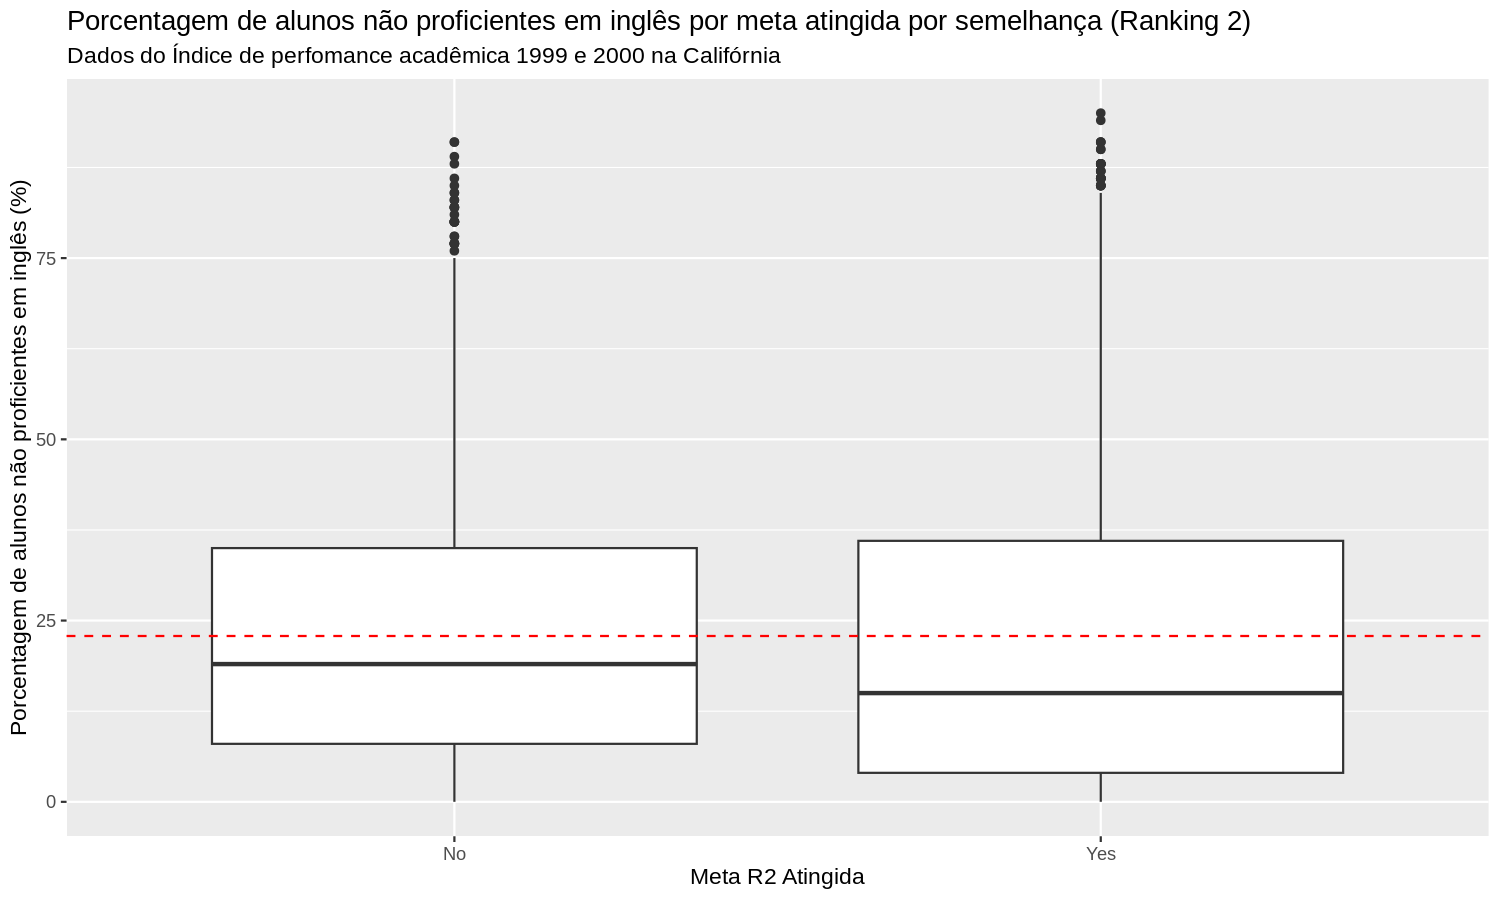

In [ ]:
ggplot(data = df, aes(x = meta_r2, y = npi)) +
    geom_boxplot() +
    geom_hline(yintercept = media_npi, color = "red", linetype = "dashed") +
    labs(
        title = "Porcentagem de alunos não proficientes em inglês por meta atingida por semelhança (Ranking 2)",
        subtitle = "Dados do Índice de perfomance acadêmica 1999 e 2000 na Califórnia",
        x = "Meta R2 Atingida",
        y = "Porcentagem de alunos não proficientes em inglês (%)"
    )

A maioria das escolas que atingiram a meta do Ranking 2, são compostas por uma porcentagem menor de alunos que não possuem proficiência em inglês.

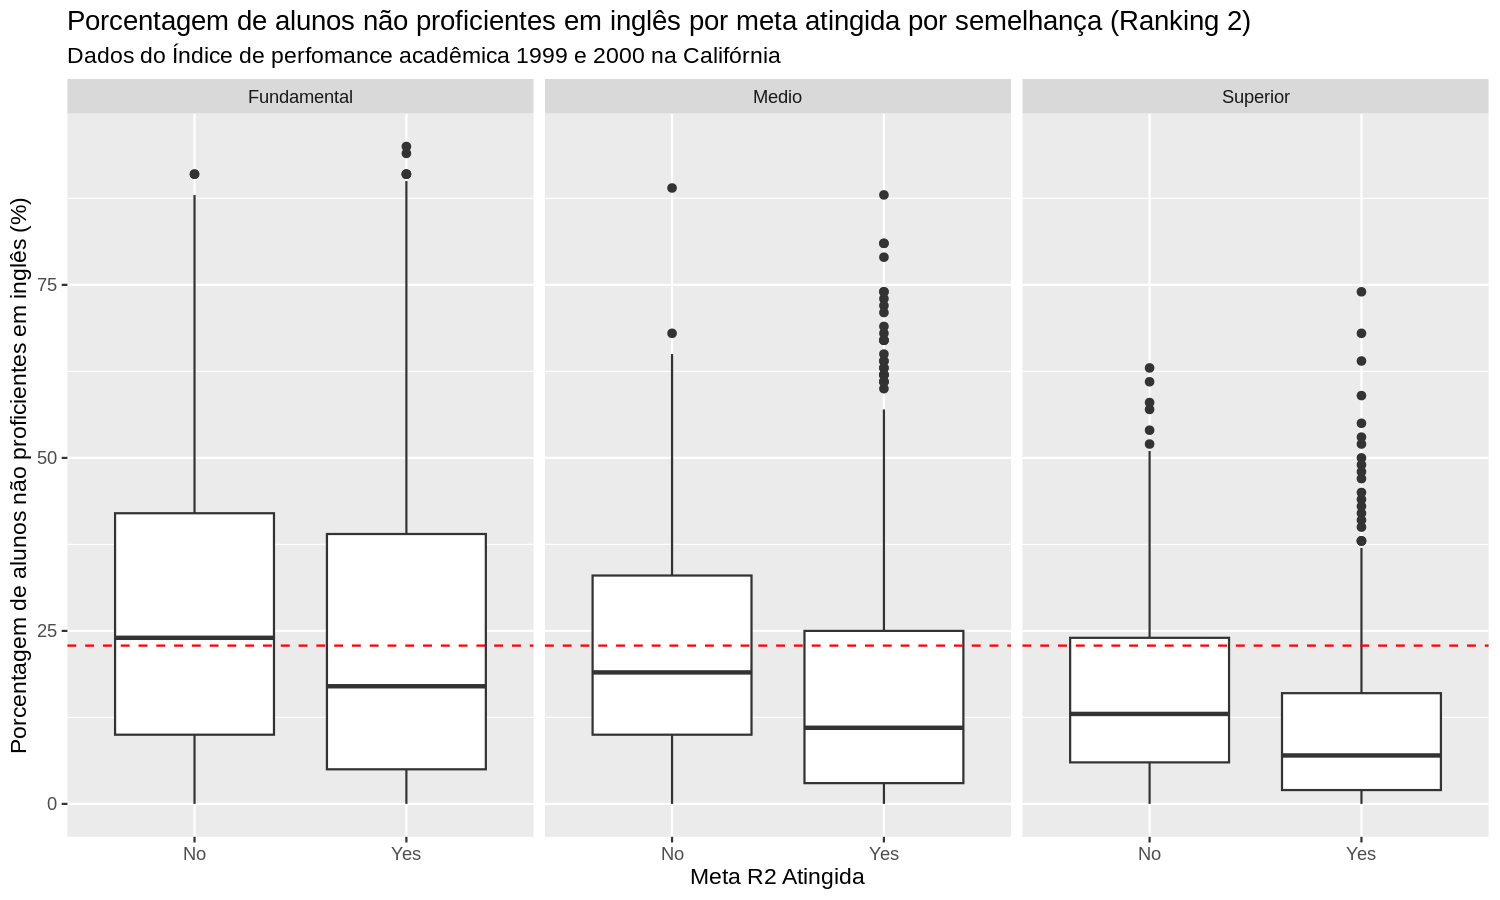

In [ ]:
ggplot(data = df, aes(x = meta_r2, y = npi)) +
    geom_boxplot() +
    geom_hline(yintercept = media_npi, color = "red", linetype = "dashed") +
    facet_wrap(~tipo) +
    labs(
        title = "Porcentagem de alunos não proficientes em inglês por meta atingida por semelhança (Ranking 2)",
        subtitle = "Dados do Índice de perfomance acadêmica 1999 e 2000 na Califórnia",
        x = "Meta R2 Atingida",
        y = "Porcentagem de alunos não proficientes em inglês (%)"
    )

Quando analisamos os dados separados por nível de ensino, a conclusão é a mesma: a maioria das escolas que atingiram a meta do Ranking 2, são compostas por uma porcentagem menor de alunos que não possuem proficiência em inglês.

Warning message:
“Removed 178 rows containing non-finite values (`stat_smooth()`).”
Warning message:
“Removed 178 rows containing missing values (`geom_point()`).”


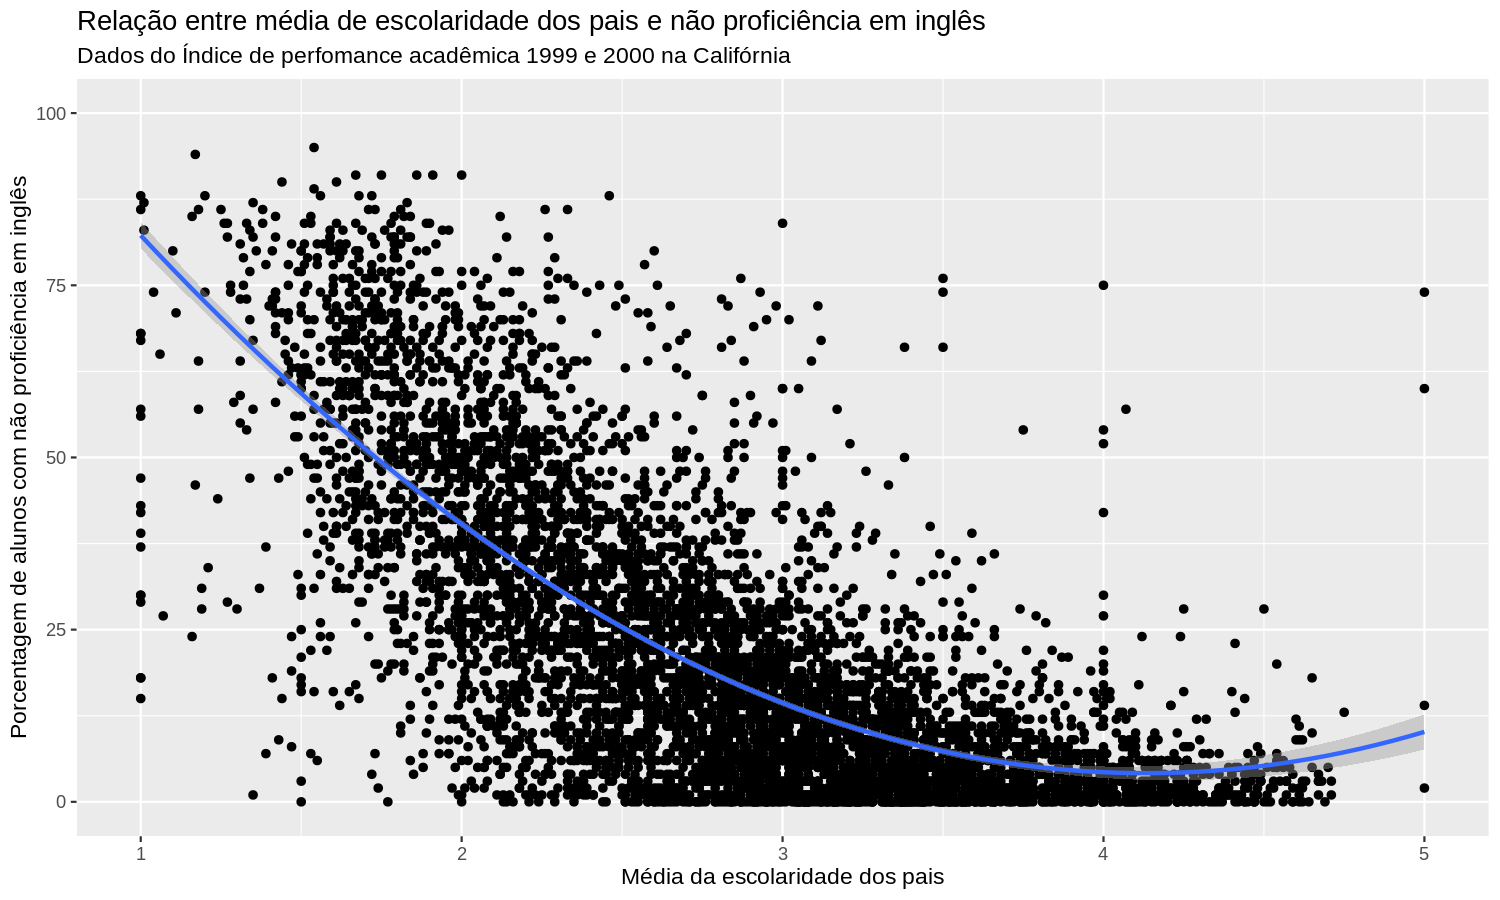

In [ ]:
df %>% ggplot(mapping = aes(x=edu,npi)) +
  geom_point() +
  geom_smooth(method = "lm", formula = y ~ poly(x,2)) +
  labs(
  title = "Relação entre média de escolaridade dos pais e não proficiência em inglês",
  subtitle = "Dados do Índice de perfomance acadêmica 1999 e 2000 na Califórnia",
  x = "Média da escolaridade dos pais",
  y = "Porcentagem de alunos com não proficiência em inglês"
  ) +
  ylim(0, 100)

<h3>Conclusão da seção</h3>


---

Vemos que o fator **Não Proficiência em Inglês(npi)** é um dos fatores socioeconômicos mais indicativos. Primeiramente, note que tal fator indica, muito provavelmente, imigrações para tais regiões. Notamos que tanto as metas *R1* quanto *R2* tem uma quantidade acima da média de alunos com não proficência em inglês, consequentemente, a Meta geral (meta_rs) também mantém o comportamento.

Percebemos também, que quanto maior a Porcentagem  de Não Proficiência em Inglês,menor o nível de escolaridade dos pais.

Por fim, a análise da quantidade de pai

---



## 2.5 Por Região

In [ ]:
# Analisando cidades acima da média em relação a educação dos pais
# Estudo tem como base o fato estudado anteriormente de quanto maior o estudo
# dos pais menos é a necessidade de alimentação subsidiada
agrupamento_por_distrito <- df %>% group_by(dst_nm) %>% summarise(Media = mean(edu,na.rm = T),Refeicoes = mean(refs,na.rm = T))
media_edu <- mean(agrupamento_por_distrito$Media,na.rm = T)
media_refs <- mean(agrupamento_por_distrito$Refeicoes,na.rm = T)
# Separando as cidade que possuem refeição subsidiada e educação acima ou abaixo da média
cidade_acima_da_media_em_educacao <- agrupamento_por_distrito %>% filter(agrupamento_por_distrito$Media > media_edu)
cidade_abaixo_da_media_em_educacao <- agrupamento_por_distrito %>% filter(agrupamento_por_distrito$Media < media_edu)
cidade_acima_da_media_em_refeicao_subsidiada <- agrupamento_por_distrito %>% filter(agrupamento_por_distrito$Refeicoes > media_refs)
cidade_abaixo_da_media_em_refeicao_subsidiada <- agrupamento_por_distrito %>% filter(agrupamento_por_distrito$Refeicoes < media_refs)

quantidade_linhas_acima_m <- df %>% filter(dst_nm %in% cidade_acima_da_media_em_educacao$dst_nm)
quantidade_linhas_abaixo_m <- df %>% filter(dst_nm %in% cidade_abaixo_da_media_em_educacao$dst_nm)

print(paste("Quantidade de distritos com educação dos pais acima da média: ",nrow(cidade_acima_da_media_em_educacao)))
print(paste("Quantidade de distritos com educação dos pais abaixo da média: ",nrow(cidade_abaixo_da_media_em_educacao)))
print(paste("Quantidade de escolas nos distritos com educação dos pais acima da média: ",nrow(quantidade_linhas_acima_m)))
print(paste("Quantidade de escolas nos distritos com educação dos pais abaixo da média: ",nrow(quantidade_linhas_abaixo_m)))


[1] "Quantidade de distritos com educação dos pais acima da média:  377"
[1] "Quantidade de distritos com educação dos pais abaixo da média:  379"
[1] "Quantidade de escolas nos distritos com educação dos pais acima da média:  2602"
[1] "Quantidade de escolas nos distritos com educação dos pais abaixo da média:  3588"


Nos dados acima separamos os distritos com as maiores médias de educação dos pais e também com base nas refeições subsiadas pelo governo, visando separar os distritos que possuem um maior desempenho financeiro.

Nota-se que apesar da quantidade de distritos acima e abaixo da média serem muito próximos, a quantidade de escolas com pais com educação abaixo da média é muito maior do que a quantidade de pais com educação acima da média.


In [ ]:
# Contando a quantidade proporcional de escola que bateram a meta e
# e possuem alta taxa de refeição subsidiada
atingiram_a_meta <- df %>% filter(dst_nm %in% cidade_acima_da_media_em_refeicao_subsidiada$dst_nm)

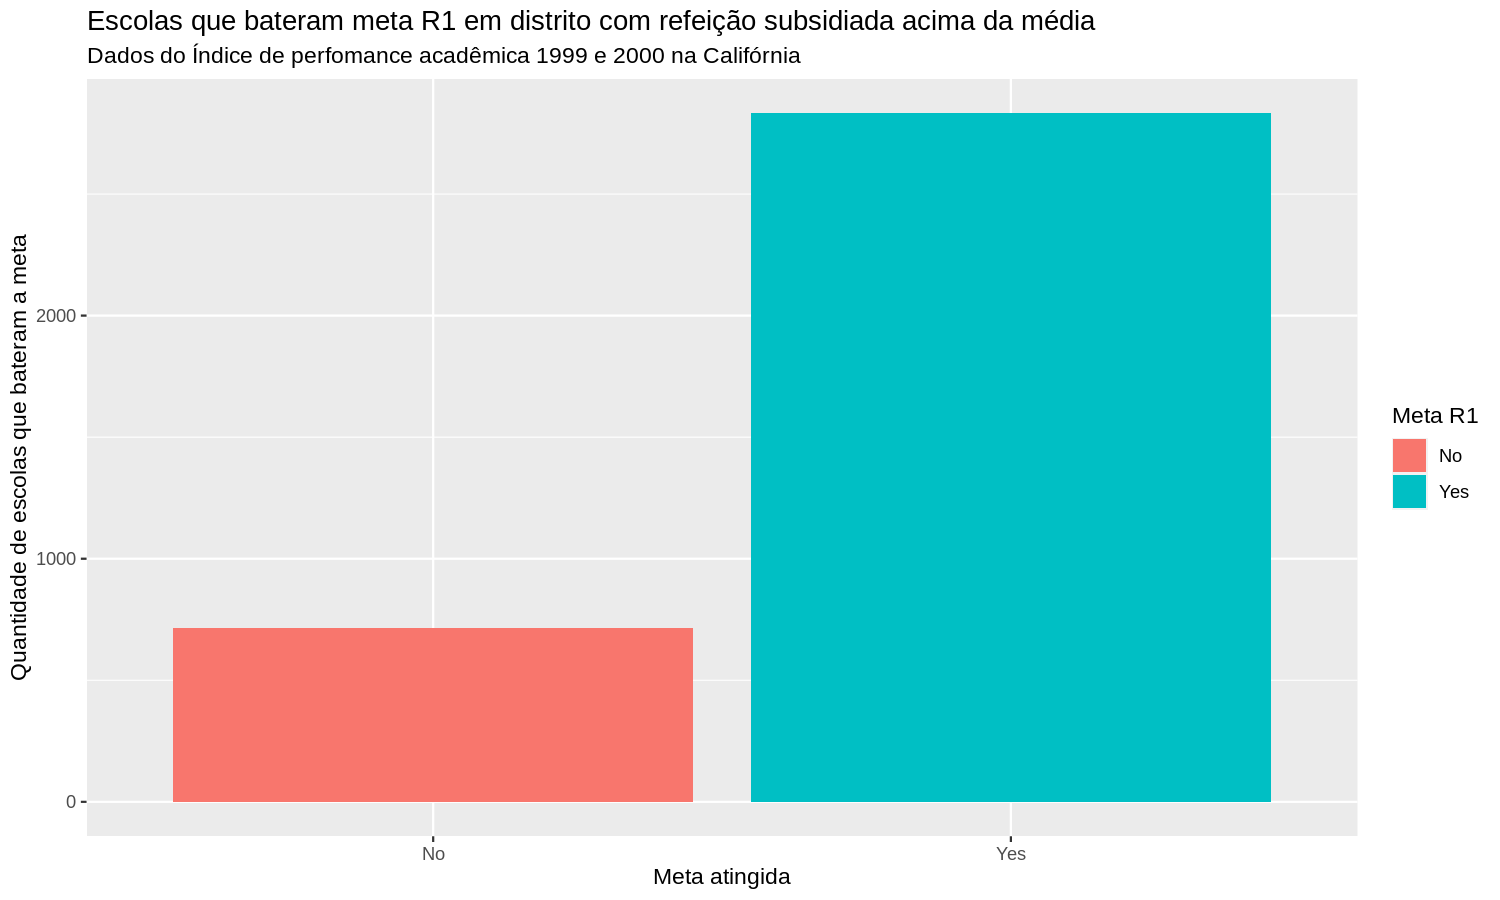

In [ ]:
# Analisando distritos com maiores números de alunos com refeições subsidiadas
df %>% filter(dst_nm %in% cidade_acima_da_media_em_refeicao_subsidiada$dst_nm) %>%
  ggplot(mapping = aes( x = meta_r1,fill = meta_r1)) +
    geom_bar() +
    labs(
    title = "Escolas que bateram meta R1 em distrito com refeição subsidiada acima da média",
    subtitle = "Dados do Índice de perfomance acadêmica 1999 e 2000 na Califórnia",
    x = "Meta atingida",
    y = "Quantidade de escolas que bateram a meta",
    fill = "Meta R1"
    )

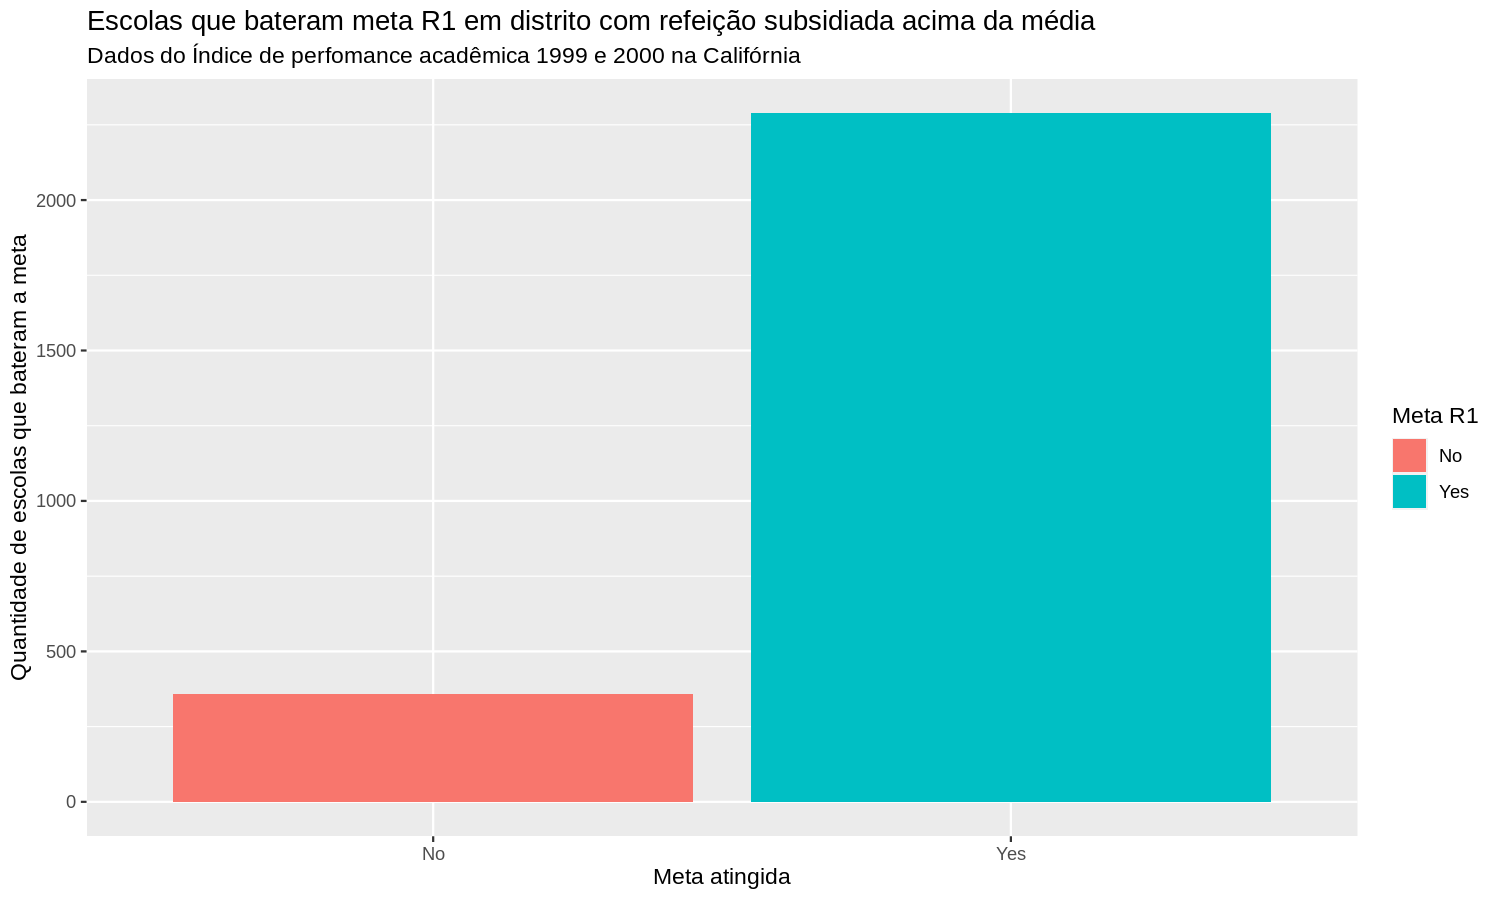

In [ ]:
# Analisando distritos com menores números de alunos com refeições subsidiadas
df %>% filter(dst_nm %in% cidade_abaixo_da_media_em_refeicao_subsidiada$dst_nm) %>%
  ggplot(mapping = aes( x = meta_r1,fill = meta_r1)) +
    geom_bar() +
    labs(
    title = "Escolas que bateram meta R1 em distrito com refeição subsidiada acima da média",
    subtitle = "Dados do Índice de perfomance acadêmica 1999 e 2000 na Califórnia",
    x = "Meta atingida",
    y = "Quantidade de escolas que bateram a meta",
    fill = "Meta R1"
    )

In [ ]:
# Quantidade de escolas em distritos com educação subsidiada acima e baixo da média
quantidade_escolas_acima_da_media <- nrow(df %>%
  filter(dst_nm %in% cidade_acima_da_media_em_refeicao_subsidiada$dst_nm))
quantidade_escolas_baixo_da_media <- nrow(df %>%
  filter(dst_nm %in% cidade_abaixo_da_media_em_refeicao_subsidiada$dst_nm))

# Quantidade de escolas em distritos que tem refeição subsidiada acima da média e bateu e não bateu a meta R1
quantidade_escolas_acima_da_media_yes <- nrow(df %>%
  filter(dst_nm %in% cidade_acima_da_media_em_refeicao_subsidiada$dst_nm &
     meta_r1 == "Yes"))
quantidade_escolas_acima_da_media_no <- nrow(df %>%
  filter(dst_nm %in% cidade_acima_da_media_em_refeicao_subsidiada$dst_nm &
     meta_r1 == "No"))

# Quantidade de escolas em distritos que tem refeição subsidiada abaixo da média e bateu e não bateu a meta R1
quantidade_escolas_baixo_da_media_yes <- nrow(df %>%
  filter(dst_nm %in% cidade_abaixo_da_media_em_refeicao_subsidiada$dst_nm &
     meta_r1 == "Yes"))
quantidade_escolas_baixo_da_media_no <- nrow(df %>%
  filter(dst_nm %in% cidade_abaixo_da_media_em_refeicao_subsidiada$dst_nm &
     meta_r1 == "No"))
# Efeturando calculos
porcentagem_escolas_acima_media_e_bateu_metar1 <- quantidade_escolas_acima_da_media_yes/quantidade_escolas_acima_da_media
porcentagem_escolas_acima_media_e_nao_bateu_metar1 <- 1 - porcentagem_escolas_acima_media_e_bateu_metar1
porcentagem_escolas_abaixo_media_e_bateu_metar1 <- quantidade_escolas_baixo_da_media_yes/quantidade_escolas_baixo_da_media
porcentagem_escolas_abaixo_media_e_nao_bateu_metar1 <- 1 - porcentagem_escolas_abaixo_media_e_bateu_metar1
# Printando informações
print(paste("Porcentagem escolas com refeição subsidida acima media e bateu a Meta R1",round(porcentagem_escolas_acima_media_e_bateu_metar1*100,2),'%'))
print(paste("Porcentagem escolas com refeição subsidida acima media e não bateu a Meta R1",round(porcentagem_escolas_acima_media_e_nao_bateu_metar1,3),'%'))
print(paste("Porcentagem escolas com refeição subsidida abaixo media e bateu a Meta R1",round(porcentagem_escolas_abaixo_media_e_bateu_metar1,2),'%'))
print(paste("Porcentagem escolas com refeição subsidida abaixo media e não bateu a Meta R1",round(porcentagem_escolas_abaixo_media_e_nao_bateu_metar1,2),'%'))

[1] "Porcentagem escolas com refeição subsidida acima media e bateu a Meta R1 79.85 %"
[1] "Porcentagem escolas com refeição subsidida acima media e não bateu a Meta R1 0.202 %"
[1] "Porcentagem escolas com refeição subsidida abaixo media e bateu a Meta R1 0.87 %"
[1] "Porcentagem escolas com refeição subsidida abaixo media e não bateu a Meta R1 0.13 %"


Acima temos que a escolas em distritos que possuem grau de uma refeição subsidiada abaixo da média possui maior porcentagem porcentagem em bater a Meta R1. Enquantos as escolas que possuem maior grau de alunos com subsidios teve um desepenho de 7.15% menor.

Agora vamos efeturar a mesma análise para a Meta R2

In [ ]:
# Quantidade de escolas em distritos com educação subsidiada acima e baixo da média
quantidade_escolas_acima_da_media <- nrow(df %>%
  filter(dst_nm %in% cidade_acima_da_media_em_refeicao_subsidiada$dst_nm))
quantidade_escolas_baixo_da_media <- nrow(df %>%
  filter(dst_nm %in% cidade_abaixo_da_media_em_refeicao_subsidiada$dst_nm))

# Quantidade de escolas em distritos que tem refeição subsidiada acima da média e bateu e não bateu a meta R1
quantidade_escolas_acima_da_media_yes <- nrow(df %>%
  filter(dst_nm %in% cidade_acima_da_media_em_refeicao_subsidiada$dst_nm &
     meta_r2 == "Yes"))

# Quantidade de escolas em distritos que tem refeição subsidiada abaixo da média e bateu e não bateu a meta R1
quantidade_escolas_baixo_da_media_yes <- nrow(df %>%
  filter(dst_nm %in% cidade_abaixo_da_media_em_refeicao_subsidiada$dst_nm &
     meta_r2 == "Yes"))

# Efeturando calculos
porcentagem_escolas_acima_media_e_bateu_metar1 <- quantidade_escolas_acima_da_media_yes/quantidade_escolas_acima_da_media
porcentagem_escolas_acima_media_e_nao_bateu_metar1 <- 1 - porcentagem_escolas_acima_media_e_bateu_metar1
porcentagem_escolas_abaixo_media_e_bateu_metar1 <- quantidade_escolas_baixo_da_media_yes/quantidade_escolas_baixo_da_media
porcentagem_escolas_abaixo_media_e_nao_bateu_metar1 <- 1 - porcentagem_escolas_abaixo_media_e_bateu_metar1

# Printando informações
print(paste("Porcentagem escolas com refeição subsidida acima media e bateu a Meta R2",round(porcentagem_escolas_acima_media_e_bateu_metar1*100,2),'%'))
print(paste("Porcentagem escolas com refeição subsidida acima media e não bateu a Meta R2",round(porcentagem_escolas_acima_media_e_nao_bateu_metar1,3),'%'))
print(paste("Porcentagem escolas com refeição subsidida abaixo media e bateu a Meta R2",round(porcentagem_escolas_abaixo_media_e_bateu_metar1,2),'%'))
print(paste("Porcentagem escolas com refeição subsidida abaixo media e não bateu a Meta R2",round(porcentagem_escolas_abaixo_media_e_nao_bateu_metar1,2),'%'))


[1] "Porcentagem escolas com refeição subsidida acima media e bateu a Meta R2 68.01 %"
[1] "Porcentagem escolas com refeição subsidida acima media e não bateu a Meta R2 0.32 %"
[1] "Porcentagem escolas com refeição subsidida abaixo media e bateu a Meta R2 0.78 %"
[1] "Porcentagem escolas com refeição subsidida abaixo media e não bateu a Meta R2 0.22 %"


Analisando em relação a Meta R2 a diferença em porcentagem foi maior ainda, atingindo 10% de diferença, onde as escolas com uma menor taxa de alunos com refeição subsidiada se destacou.

Por fim vamos analisar a relação com a meta RS.

In [ ]:
# Quantidade de escolas em distritos com educação subsidiada acima e baixo da média
quantidade_escolas_acima_da_media <- nrow(df %>%
  filter(dst_nm %in% cidade_acima_da_media_em_refeicao_subsidiada$dst_nm))
quantidade_escolas_baixo_da_media <- nrow(df %>%
  filter(dst_nm %in% cidade_abaixo_da_media_em_refeicao_subsidiada$dst_nm))

# Quantidade de escolas em distritos que tem refeição subsidiada acima da média e bateu e não bateu a meta R1
quantidade_escolas_acima_da_media_yes <- nrow(df %>%
  filter(dst_nm %in% cidade_acima_da_media_em_refeicao_subsidiada$dst_nm &
     meta_rs == "Yes"))

# Quantidade de escolas em distritos que tem refeição subsidiada abaixo da média e bateu e não bateu a meta R1
quantidade_escolas_baixo_da_media_yes <- nrow(df %>%
  filter(dst_nm %in% cidade_abaixo_da_media_em_refeicao_subsidiada$dst_nm &
     meta_rs == "Yes"))

# Efeturando calculos
porcentagem_escolas_acima_media_e_bateu_metar1 <- quantidade_escolas_acima_da_media_yes/quantidade_escolas_acima_da_media
porcentagem_escolas_acima_media_e_nao_bateu_metar1 <- 1 - porcentagem_escolas_acima_media_e_bateu_metar1
porcentagem_escolas_abaixo_media_e_bateu_metar1 <- quantidade_escolas_baixo_da_media_yes/quantidade_escolas_baixo_da_media
porcentagem_escolas_abaixo_media_e_nao_bateu_metar1 <- 1 - porcentagem_escolas_abaixo_media_e_bateu_metar1

# Printando informações
print(paste("Porcentagem escolas com refeição subsidida acima media e bateu a Meta R2",round(porcentagem_escolas_acima_media_e_bateu_metar1*100,2),'%'))
print(paste("Porcentagem escolas com refeição subsidida acima media e não bateu a Meta R2",round(porcentagem_escolas_acima_media_e_nao_bateu_metar1,3),'%'))
print(paste("Porcentagem escolas com refeição subsidida abaixo media e bateu a Meta R2",round(porcentagem_escolas_abaixo_media_e_bateu_metar1,2),'%'))
print(paste("Porcentagem escolas com refeição subsidida abaixo media e não bateu a Meta R2",round(porcentagem_escolas_abaixo_media_e_nao_bateu_metar1,2),'%'))


[1] "Porcentagem escolas com refeição subsidida acima media e bateu a Meta R2 66.66 %"
[1] "Porcentagem escolas com refeição subsidida acima media e não bateu a Meta R2 0.333 %"
[1] "Porcentagem escolas com refeição subsidida abaixo media e bateu a Meta R2 0.77 %"
[1] "Porcentagem escolas com refeição subsidida abaixo media e não bateu a Meta R2 0.23 %"


Novamente percebe-se que a quantidade de alunos com refeição subsidiada abaixo da média teve um melhor desempenho em bater a mate.

<h3>Conclusão da seção </h3>

---

Diante disso, nossas análises revelaram que regiões com mais alunos dependentes de refeições subsidiadas enfrentam dificuldades em alcançar metas educacionais. Isso sugere desafios socioeconômicos mais amplos, como pobreza e desigualdade, afetando o progresso acadêmico.

A dependência dessas refeições pode indicar vulnerabilidade socioeconômica, refletindo problemas estruturais que prejudicam o desempenho escolar. Políticas de apoio são essenciais, mas podem não abordar totalmente as necessidades educacionais desses alunos.

Uma abordagem integrada, unindo suporte nutricional com intervenções educacionais e socioemocionais, pode ser crucial para superar esses desafios e promover o sucesso educacional equitativo.

---

# **3.1** Conclusão

Primeiramente, a dependência de refeições subsidiadas pelos alunos indica desafios socioeconômicos mais amplos, como pobreza e desigualdade, que impactam negativamente o progresso acadêmico. Essa vulnerabilidade socioeconômica reflete problemas estruturais que exigem uma abordagem integrada, unindo suporte nutricional com intervenções educacionais e socioemocionais, para promover o sucesso educacional equitativo.

Além disso, a correlação positiva entre a escolaridade dos pais e o desempenho acadêmico dos alunos destaca a importância do contexto familiar na educação. Pais com maior escolaridade tendem a ter uma situação financeira mais estável, o que influencia positivamente o progresso educacional de seus filhos. Essa constatação ressalta a relevância do apoio e envolvimento dos pais na promoção do sucesso acadêmico.

Ao analisar os dados por nível de ensino, é evidente que a realidade socioeconômica individual dos alunos afeta diretamente o desempenho das escolas. A proporção de alunos com refeição subsidiada é menor em escolas que atingiram a meta, indicando a influência da condição financeira dos alunos no desempenho escolar.

Outro fator significativo é a não proficiência em inglês, que está associada a imigrações para determinadas regiões. Essa variável também está correlacionada com a escolaridade dos pais, indicando que regiões com maior porcentagem de não proficiência em inglês tendem a ter pais com menor nível educacional.

Em resumo, os dados sugerem que o sucesso educacional está intrinsecamente ligado a uma série de fatores socioeconômicos e familiares. Para promover um ambiente escolar inclusivo e equitativo, é essencial adotar abordagens integradas que considerem esses diversos aspectos e busquem superar os desafios enfrentados pelos alunos em situação de vulnerabilidade.